<a href="https://colab.research.google.com/github/Ivy1093367/Boyandgirl_predict/blob/main/v1.0_0403_combine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 環境設定&資料集匯入**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
corpus_root = 'drive/My Drive/Colab Notebooks/datasets/'

In [3]:
train_df = pd.read_csv(corpus_root+'boygirltrain.csv')
test_df = pd.read_csv(corpus_root+'boygirltest.csv')

In [4]:
train_df

id  gender star_sign phone_os  height  weight  sleepiness     iq  \
0      1       2       處女座    Apple   154.0    43.0         NaN    NaN   
1      2       2       處女座    Apple   156.0    47.0         NaN  130.0   
2      3       1       射手座      NaN   170.0    61.0         NaN   90.0   
3      4       1       射手座    Apple   170.0    62.0         4.0  100.0   
4      5       2       射手座  Android   158.0    67.0         NaN  128.0   
..   ...     ...       ...      ...     ...     ...         ...    ...   
418  419       1       處女座  Android   166.0    66.0         4.0   90.0   
419  420       1       牡羊座  Android   176.0    65.0         4.0   87.0   
420  421       1       NaN    Apple   174.0    72.0         2.0    NaN   
421  422       2       天蠍座      NaN   167.0    50.0         3.0  180.0   
422  423       1       雙魚座  Android   173.0    68.0         3.0   66.0   

     fb_friends   yt                     self_intro  
0         583.0    0                      Beautiful  
1           NaN  3.5  Enjoying being who I'm notsss  
2         540.0  NaN         Practice Makes perfect  
3           NaN    5                Straightforward  
4         320.0  1.2                       Humorous  
..          ...  ...                            ...  
418      1000.0    1      I hope i am a super hero.  
419      1300.0    2                            NaN  
420      2000.0    9                            NaN  
421       483.0   10                            NaN  
422       300.0   10                   super 666666  

[423 rows x 11 columns]

In [5]:
test_df

id  gender star_sign phone_os  height  weight  sleepiness     iq  \
0      1       0       天蠍座    Apple   200.0   100.0         1.0   87.0   
1      2       0       金牛座    Apple   175.0    80.0         3.0    NaN   
2      3       0       雙子座    Apple   155.0    45.0         3.0  150.0   
3      4       0       處女座    Apple   173.0    85.0         4.0    NaN   
4      5       0       射手座  Android   164.0    57.0         4.0  130.0   
..   ...     ...       ...      ...     ...     ...         ...    ...   
421  422       0       金牛座    Apple   160.0    70.0         4.0    NaN   
422  423       0       天蠍座  Android   162.0    54.0         3.0  180.0   
423  424       0       天蠍座    Apple   173.0    66.0         NaN  135.0   
424  425       0       NaN      NaN   165.0    53.0         NaN  110.0   
425  426       0       天秤座      NaN   182.0     NaN         4.0  100.0   

     fb_friends     yt                  self_intro  
0          87.0   87.0                        GOod  
1        2000.0    NaN                   Easygoing  
2           NaN    9.0                         NaN  
3           NaN   15.0                         NaN  
4         505.0    2.0                   I'm smart  
..          ...    ...                         ...  
421       500.0    5.0                I am a girl.  
422       462.0    5.0                         NaN  
423       102.0   11.1  I like to play basketball.  
424       507.0  416.0                        Good  
425        50.0    1.0          Long live Czechia!  

[426 rows x 11 columns]

In [6]:
train_df.isnull().sum()

id              0
gender          0
star_sign      86
phone_os       78
height         74
weight         85
sleepiness     91
iq             79
fb_friends     77
yt             90
self_intro    104
dtype: int64

# **2.資料前處理**






<h2>2.1 缺失比例查看

In [7]:
def check_missing_proportions(df, name="Data"):
    print(f"\n {name} 缺失比例：")
    missing_ratio = df.isnull().mean()  # 每個變數的缺失比例
    overall_missing_ratio = df.isnull().mean().mean()  # 整體缺失比例
    print(missing_ratio)
    print(f"\n整體缺失比例: {overall_missing_ratio:.2%}")

check_missing_proportions(train_df, "訓練集")
check_missing_proportions(test_df, "測試集")


 訓練集 缺失比例：
id            0.000000
gender        0.000000
star_sign     0.203310
phone_os      0.184397
height        0.174941
weight        0.200946
sleepiness    0.215130
iq            0.186761
fb_friends    0.182033
yt            0.212766
self_intro    0.245863
dtype: float64

整體缺失比例: 16.42%

 測試集 缺失比例：
id            0.000000
gender        0.000000
star_sign     0.190141
phone_os      0.225352
height        0.159624
weight        0.225352
sleepiness    0.169014
iq            0.215962
fb_friends    0.206573
yt            0.183099
self_intro    0.218310
dtype: float64

整體缺失比例: 16.30%


<h2>2.2 刪除欄位

In [8]:
id_train_backup = train_df['id'].copy()
id_test_backup = test_df['id'].copy()
test_df["gender"]= np.nan
geder_train_backup = train_df['gender'].copy()
geder_test_backup = test_df['gender'].copy()

train_df.drop(columns=["star_sign"], inplace=True)
test_df.drop(columns=["star_sign"], inplace=True)

train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)

train_df.drop(columns=["gender"], inplace=True)
test_df.drop(columns=["gender"], inplace=True)
# 備份 self_intro
self_train_backup = train_df['self_intro'].copy()
self_test_backup = test_df['self_intro'].copy()
# 然後從 df 中暫時移除
train_df = train_df.drop(columns=['self_intro'])
test_df = test_df.drop(columns=['self_intro'])

<h2>2.3 處理特殊值



In [9]:
cat_cols = ["phone_os", "sleepiness"]

In [10]:
import numpy as np
missing_values = ['', 'N/A', 'missing', '#NUM!','nan']

# 將非標準缺失值轉為 NaN
train_df = train_df.replace(missing_values, np.nan)

train_df['yt'] = pd.to_numeric(train_df['yt'], errors='coerce')  # 非法值轉成 NaN
test_df['yt'] = pd.to_numeric(test_df['yt'], errors='coerce')  # 非法值轉成 NaN

In [11]:
train_df.isnull().sum()

phone_os      78
height        74
weight        85
sleepiness    91
iq            79
fb_friends    77
yt            91
dtype: int64

In [12]:
print(train_df['phone_os'].unique())

['Apple' nan 'Android' 'Windows Phone' 'JohnCena']


In [13]:
print(test_df['phone_os'].value_counts())

phone_os
Apple            207
Android          121
Windows phone      1
Linux              1
Name: count, dtype: int64


In [14]:
import numpy as np
import pandas as pd
import re

# 假設 train_df, test_df 已經存在

# 預處理 + 動態編碼
def preprocess_and_encode(train_df, test_df):
    # 合併 train 和 test 保證編碼一致
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # 基本清理
    def clean_os(x):
        if isinstance(x, str):
            x = re.sub(r'[^\w]', '', x)  # 移除非字母數字的符號
            x = x.strip().lower()        # 去空白 + 小寫
            return x
        return np.nan

    combined_df['phone_os'] = combined_df['phone_os'].apply(clean_os)

    # 動態建構 label encoder
    label_dict = {}
    label_counter = 0

    def get_label(x):
        nonlocal label_counter
        if pd.isna(x):
            return np.nan
        if x not in label_dict:
            label_dict[x] = label_counter
            label_counter += 1
        return label_dict[x]

    combined_df['phone_os_encoded'] = combined_df['phone_os'].apply(get_label)

    # 分回 train, test
    train_df['phone_os'] = combined_df.loc[:len(train_df) - 1, 'phone_os_encoded'].values
    test_df['phone_os'] = combined_df.loc[len(train_df):, 'phone_os_encoded'].values

    print("編碼對應表：", label_dict)
    return train_df, test_df, label_dict

# 使用
train_df, test_df, label_dict = preprocess_and_encode(train_df, test_df)

# 驗證
print(train_df.head())
print(test_df.head())


編碼對應表： {'apple': 0, 'android': 1, 'windowsphone': 2, 'johncena': 3, 'linux': 4}
   phone_os  height  weight  sleepiness     iq  fb_friends   yt
0       0.0   154.0    43.0         NaN    NaN       583.0  0.0
1       0.0   156.0    47.0         NaN  130.0         NaN  3.5
2       NaN   170.0    61.0         NaN   90.0       540.0  NaN
3       0.0   170.0    62.0         4.0  100.0         NaN  5.0
4       1.0   158.0    67.0         NaN  128.0       320.0  1.2
   phone_os  height  weight  sleepiness     iq  fb_friends    yt
0       0.0   200.0   100.0         1.0   87.0        87.0  87.0
1       0.0   175.0    80.0         3.0    NaN      2000.0   NaN
2       0.0   155.0    45.0         3.0  150.0         NaN   9.0
3       0.0   173.0    85.0         4.0    NaN         NaN  15.0
4       1.0   164.0    57.0         4.0  130.0       505.0   2.0


In [15]:
train_df

phone_os  height  weight  sleepiness     iq  fb_friends    yt
0         0.0   154.0    43.0         NaN    NaN       583.0   0.0
1         0.0   156.0    47.0         NaN  130.0         NaN   3.5
2         NaN   170.0    61.0         NaN   90.0       540.0   NaN
3         0.0   170.0    62.0         4.0  100.0         NaN   5.0
4         1.0   158.0    67.0         NaN  128.0       320.0   1.2
..        ...     ...     ...         ...    ...         ...   ...
418       1.0   166.0    66.0         4.0   90.0      1000.0   1.0
419       1.0   176.0    65.0         4.0   87.0      1300.0   2.0
420       0.0   174.0    72.0         2.0    NaN      2000.0   9.0
421       NaN   167.0    50.0         3.0  180.0       483.0  10.0
422       1.0   173.0    68.0         3.0   66.0       300.0  10.0

[423 rows x 7 columns]

In [16]:
test_df

phone_os  height  weight  sleepiness     iq  fb_friends     yt
0         0.0   200.0   100.0         1.0   87.0        87.0   87.0
1         0.0   175.0    80.0         3.0    NaN      2000.0    NaN
2         0.0   155.0    45.0         3.0  150.0         NaN    9.0
3         0.0   173.0    85.0         4.0    NaN         NaN   15.0
4         1.0   164.0    57.0         4.0  130.0       505.0    2.0
..        ...     ...     ...         ...    ...         ...    ...
421       0.0   160.0    70.0         4.0    NaN       500.0    5.0
422       1.0   162.0    54.0         3.0  180.0       462.0    5.0
423       0.0   173.0    66.0         NaN  135.0       102.0   11.1
424       NaN   165.0    53.0         NaN  110.0       507.0  416.0
425       NaN   182.0     NaN         4.0  100.0        50.0    1.0

[426 rows x 7 columns]

<Axes: >

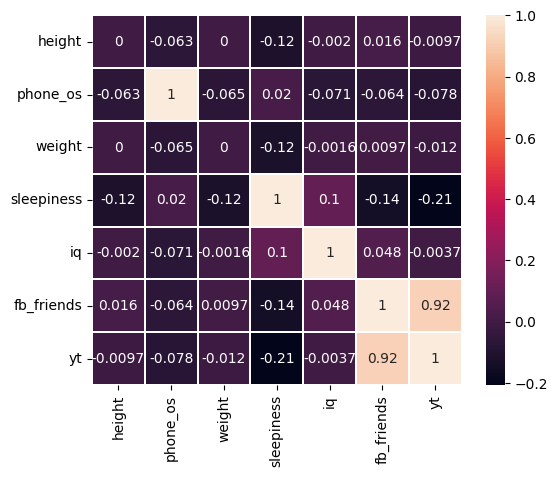

In [17]:
import seaborn as sns
sns.heatmap(train_df[[ 'height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)

<h2>2.4 檢查fb的資料分布

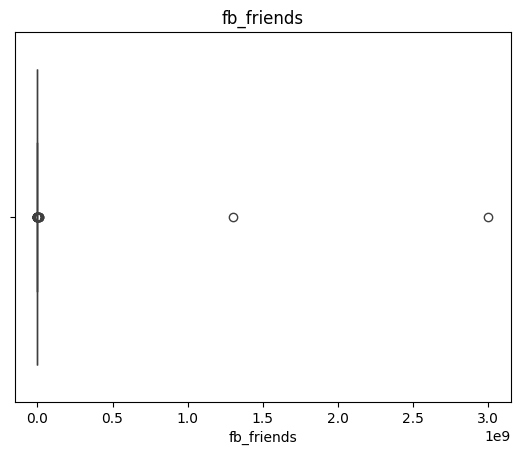

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['fb_friends'])
plt.title("fb_friends")
plt.show()

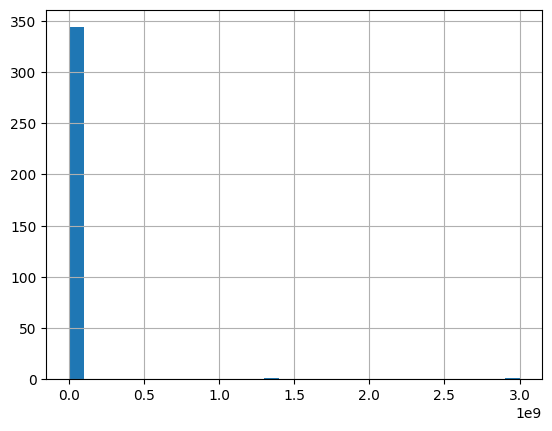

In [19]:
train_df['fb_friends'].hist(bins=30)
plt.show()

In [20]:
#清理 fb_friends 欄位的異常值
train_df.loc[train_df['fb_friends'] < 0, 'fb_friends'] *= -1
test_df.loc[test_df['fb_friends'] < 0, 'fb_friends'] *= -1

In [21]:
# 壓縮 > 5,000的資料
def process_fb_friends_mobile_traffic(df, upper_limit=3000):
    df = df.copy()
    df['is_outlier_fb_friends'] = df['fb_friends'] >= upper_limit
    df['fb_friends'] = df['fb_friends'].clip(upper=upper_limit)
    return df

train_df = process_fb_friends_mobile_traffic(train_df)
test_df = process_fb_friends_mobile_traffic(test_df)

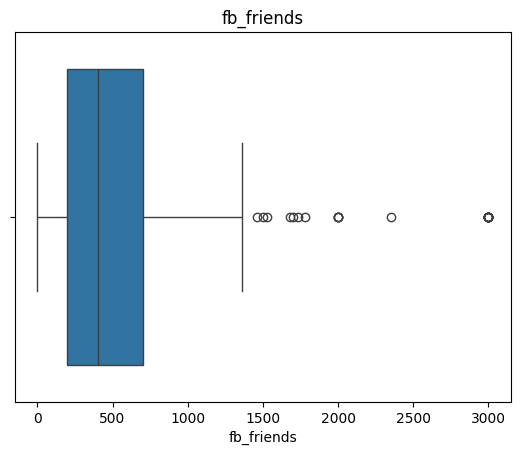

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.boxplot(x=train_df['fb_friends'])
plt.title("fb_friends")
plt.show()

In [23]:
train_df.isnull().sum()

phone_os                 78
height                   74
weight                   85
sleepiness               91
iq                       79
fb_friends               77
yt                       91
is_outlier_fb_friends     0
dtype: int64

<h2>2.5 檢查yt資料分布

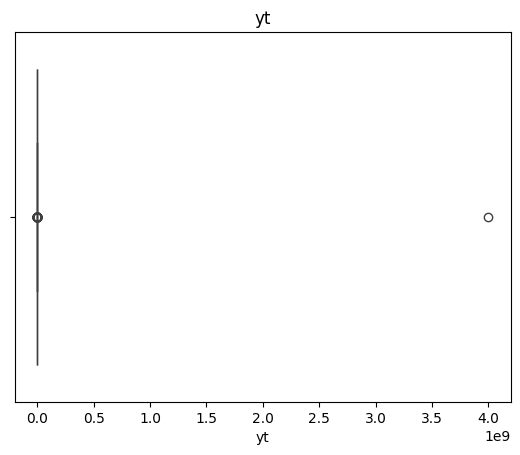

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['yt'])
plt.title("yt")
plt.show()

In [25]:
# 清理 yt 欄位的異常值
train_df.loc[train_df['yt'] < 0, 'yt'] *= -1
test_df.loc[test_df['yt'] < 0, 'yt'] *= -1

In [26]:
# 做clip 處理資料差距
def process_yt_mobile_traffic(df, upper_limit=500):
    df = df.copy()
    df['is_outlier_yt'] = df['yt'] >= upper_limit
    df['yt'] = df['yt'].clip(upper=upper_limit)
    return df

train_df = process_yt_mobile_traffic(train_df)
test_df = process_yt_mobile_traffic(test_df)

In [27]:
train_df.isnull().sum()

phone_os                 78
height                   74
weight                   85
sleepiness               91
iq                       79
fb_friends               77
yt                       91
is_outlier_fb_friends     0
is_outlier_yt             0
dtype: int64

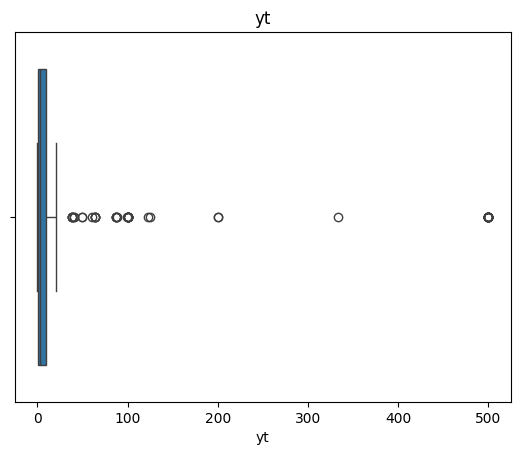

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['yt'])
plt.title("yt")
plt.show()

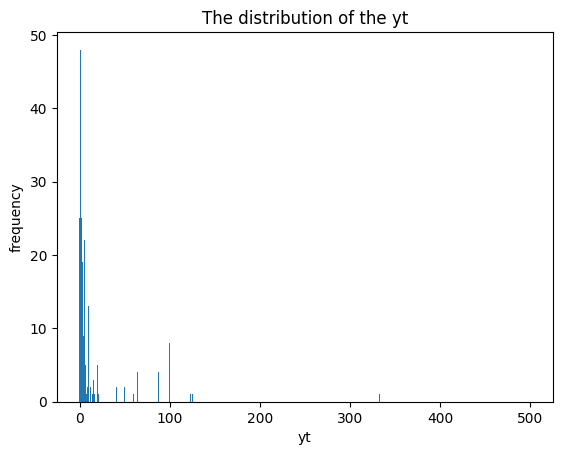

In [29]:
sleepiness_values = train_df['yt'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = train_df['yt'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('yt')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the yt')
plt.show()

<h2>2.6檢查height分布




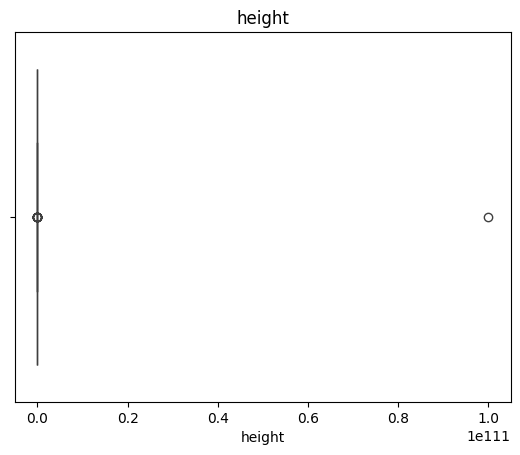

In [30]:
sns.boxplot(x=train_df['height'])
plt.title("height")
plt.show()

In [31]:
train_df.loc[train_df['height'] < 130, 'height'] = 140
test_df.loc[test_df['height'] < 130, 'height'] = 140

In [32]:
def process_height_mobile_traffic(df, upper_limit=200):
    df = df.copy()
    df['is_outlier_height'] = df['height'] >= upper_limit
    df['height'] = df['height'].clip(upper=upper_limit)
    return df

train_df = process_height_mobile_traffic(train_df)
test_df = process_height_mobile_traffic(test_df)

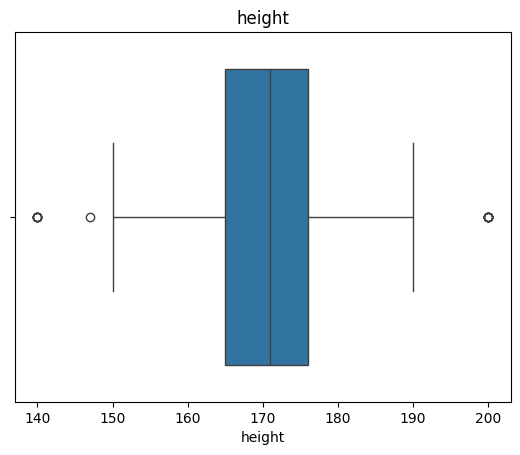

In [33]:
sns.boxplot(x=train_df['height'])
plt.title("height")
plt.show()

In [34]:
train_df.isnull().sum()

phone_os                 78
height                   74
weight                   85
sleepiness               91
iq                       79
fb_friends               77
yt                       91
is_outlier_fb_friends     0
is_outlier_yt             0
is_outlier_height         0
dtype: int64

<h2>2.7檢查weight分布

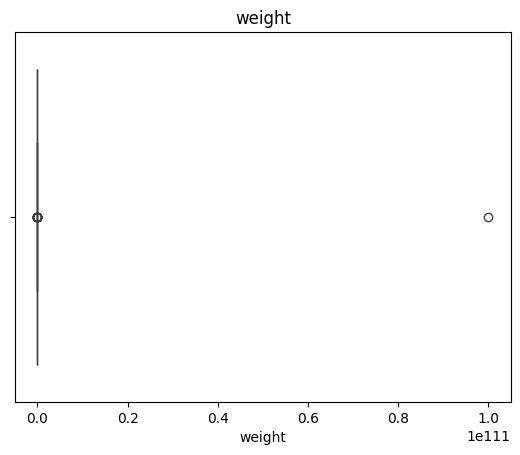

In [35]:
sns.boxplot(x=train_df['weight'])
plt.title("weight")
plt.show()

In [36]:
train_df.loc[(train_df['weight'] < 30), 'weight'] = 40
test_df.loc[(test_df['weight'] < 30), 'weight'] = 40

In [37]:
def process_weight_mobile_traffic(df, upper_limit=130):
    df = df.copy()
    df['is_outlier_weight'] = df['weight'] >= upper_limit
    df['weight'] = df['weight'].clip(upper=upper_limit)
    return df

train_df = process_weight_mobile_traffic(train_df)
test_df = process_weight_mobile_traffic(test_df)

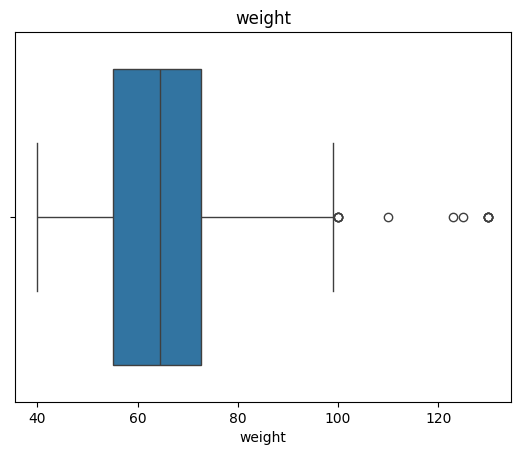

In [38]:
sns.boxplot(x=train_df['weight'])
plt.title("weight")
plt.show()

In [39]:
train_df.isnull().sum()

phone_os                 78
height                   74
weight                   85
sleepiness               91
iq                       79
fb_friends               77
yt                       91
is_outlier_fb_friends     0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
dtype: int64

<h2>2.8檢查IQ分布

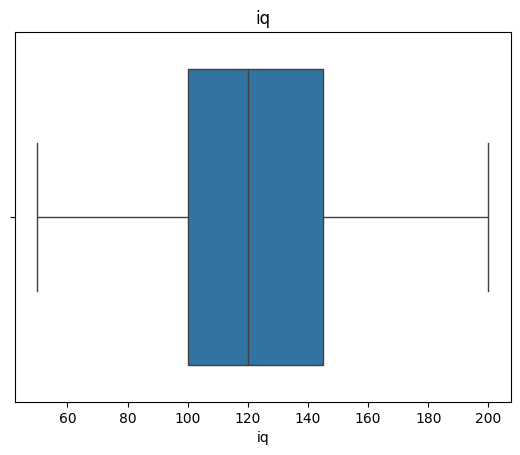

In [40]:
sns.boxplot(x=train_df['iq'])
plt.title("iq")
plt.show()

<h2>2.9檢查sleepiness分布

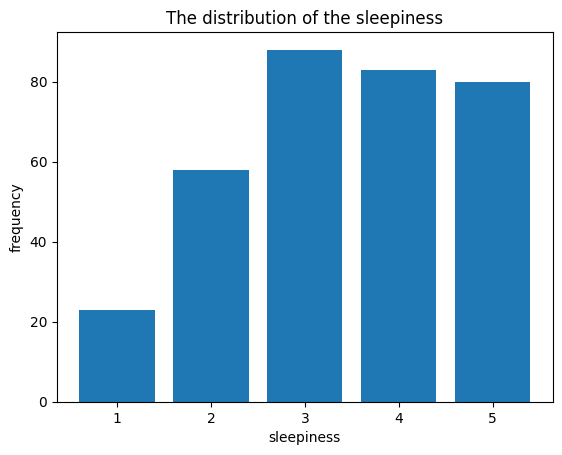

In [41]:
sleepiness_values = train_df['sleepiness'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = train_df['sleepiness'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('sleepiness')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the sleepiness')
plt.show()

<h2>2.10 標記train離群值欄位

In [42]:
def mark_outliers_iqr(df, columns, k=1.5):
    df_marked = df.copy()

    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - k * IQR
            upper = Q3 + k * IQR

            df_marked[f'is_outlier_{col}'] = ~df[col].between(lower, upper)
            outlier_count = df_marked[f'is_outlier_{col}'].sum()
            print(f" {col}: 已標記 {outlier_count} 筆離群值（不在 [{round(lower,2)}, {round(upper,2)}] 內）")

    return df_marked

In [43]:
# 要標記的欄位
target_columns = ['height', 'weight', 'iq', 'fb_friends', 'yt']

# 執行標記
train_df = mark_outliers_iqr(train_df, columns=target_columns)

 height: 已標記 88 筆離群值（不在 [148.5, 192.5] 內）
 weight: 已標記 97 筆離群值（不在 [28.38, 99.38] 內）
 iq: 已標記 79 筆離群值（不在 [32.5, 212.5] 內）
 fb_friends: 已標記 105 筆離群值（不在 [-550.0, 1450.0] 內）
 yt: 已標記 146 筆離群值（不在 [-12.5, 23.5] 內）


<h2>2.11 標記test離群值

In [44]:
def mark_outliers_by_reference(df_target, df_reference, columns, k=1.5):
    df_marked = df_target.copy()

    for col in columns:
        if pd.api.types.is_numeric_dtype(df_reference[col]):
            Q1 = df_reference[col].quantile(0.25)
            Q3 = df_reference[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - k * IQR
            upper = Q3 + k * IQR

            df_marked[f'is_outlier_{col}'] = ~df_target[col].between(lower, upper)
            outlier_count = df_marked[f'is_outlier_{col}'].sum()
            print(f"【{col}】在 test 中標記 {outlier_count} 筆離群值（不在 [{round(lower,2)}, {round(upper,2)}] 內）")

    return df_marked


In [45]:
test_df = mark_outliers_by_reference(test_df, train_df, columns=target_columns)

【height】在 test 中標記 82 筆離群值（不在 [148.5, 192.5] 內）
【weight】在 test 中標記 105 筆離群值（不在 [28.38, 99.38] 內）
【iq】在 test 中標記 92 筆離群值（不在 [32.5, 212.5] 內）
【fb_friends】在 test 中標記 105 筆離群值（不在 [-550.0, 1450.0] 內）
【yt】在 test 中標記 200 筆離群值（不在 [-12.5, 23.5] 內）


In [46]:
# 假設你用 train_df 的欄位順序當標準
column_order = train_df.columns.tolist()

# 讓 test_df 排成一樣的欄位順序
test_df = test_df.loc[:, column_order]

In [47]:
# 自動抓出含有 'is_outlier' 的欄位
outlier_cols = [col for col in train_df.columns if 'is_outlier' in col]

# 對這些欄位做 label encoding（其實 bool 直接轉 int 就行）
for col in outlier_cols:
    train_df[col] = train_df[col].astype(int)
    test_df[col] = test_df[col].astype(int)

# **3. 缺失值處理**


In [48]:
train_df.isnull().sum()

phone_os                 78
height                   74
weight                   85
sleepiness               91
iq                       79
fb_friends               77
yt                       91
is_outlier_fb_friends     0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
dtype: int64

<Axes: >

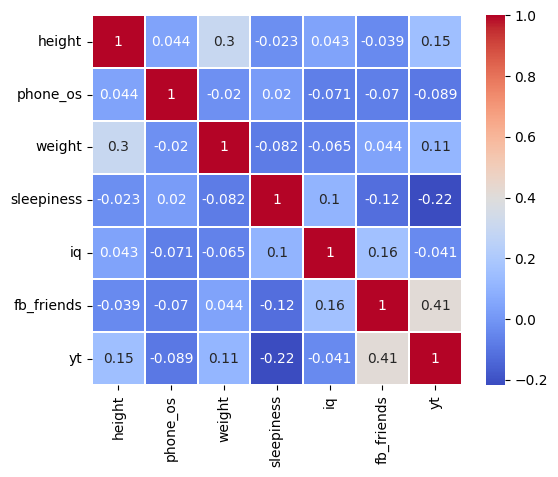

In [49]:
import seaborn as sns

# 數值欄位相關性
#負擔（負擔相關）：表示兩個變數的逆轉變化（例如性別增加，身高減少）。
#正數（正相關）：表示兩個變化數同向變化（例如身高增加，體重增加）。
sns.heatmap(train_df[['height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0,cmap="coolwarm" , square=True,linecolor='white', annot=True)

<Axes: >

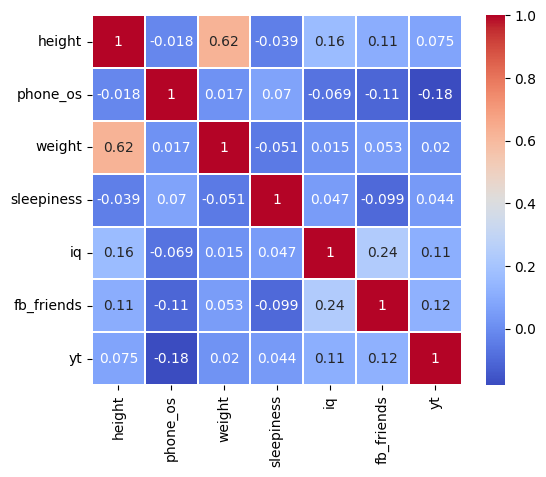

In [50]:
# 數值欄位相關性
#負擔（負擔相關）：表示兩個變數的逆轉變化（例如性別增加，身高減少）。
#正數（正相關）：表示兩個變化數同向變化（例如身高增加，體重增加）。
sns.heatmap(test_df[['height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0,cmap="coolwarm" , square=True,linecolor='white', annot=True)

# 3.1插補模型function

In [51]:
def plot_imputation_distribution(df_before, df_after, target_col, title=None):
    plt.figure(figsize=(10,5))

    # After (補值後)
    sns.kdeplot(df_after[target_col], label='After imputation', fill=True)

    # Before (補值前，只用非缺失)
    sns.kdeplot(df_before[target_col].dropna(), label='Original (non-missing)', linestyle='--')

    if title is None:
        title = f"{target_col} Distribution Before vs After Imputation"

    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_topn_distribution_comparison(df_before, df_after, target, top_n=5):
    # Ensure numeric data
    df_before[target] = pd.to_numeric(df_before[target], errors='coerce').fillna(6)
    df_after[target] = pd.to_numeric(df_after[target], errors='coerce').fillna(6)

    # 補值前分佈
    pre_series = df_before[target].value_counts(normalize=True, dropna=False)
    pre_top = pre_series.iloc[:top_n]
    pre_others = pre_series.iloc[top_n:].sum()
    if isinstance(pre_others, (int, float, np.number)) and pre_others > 0:
        pre_top = pd.concat([pre_top, pd.Series([pre_others], index=['其他'])])

    # 補值後分佈
    post_series = df_after[target].value_counts(normalize=True, dropna=True)
    post_top = post_series.iloc[:top_n]
    post_others = post_series.iloc[top_n:].sum()
    if isinstance(post_others, (int, float, np.number)) and post_others > 0:
        post_top = pd.concat([post_top, pd.Series([post_others], index=['其他'])])

    # 合併成 dataframe
    compare_df = pd.DataFrame({
        '補值前': pre_top,
        '補值後': post_top
    }).fillna(0)

    # 畫圖
    compare_df.plot(kind='bar', figsize=(8, 5))
    plt.title(f'{target} 補值前後類別分佈 (Top {top_n})')
    plt.ylabel('比例')
    plt.xlabel('類別')
    plt.legend()
    plt.tight_layout()
    plt.show()

**DT+KNN**

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer

def dt_impute_classifier(train_df, test_df, target_col, predictor_cols, model_params=None):
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: KNN 補 predictors
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: train
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col].astype(int)

    if model_params is None:
        model_params = {'max_depth': 5, 'random_state': 42}
    model = DecisionTreeClassifier(**model_params)
    model.fit(X_train, y_train)

    # Step 3: impute train target
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing).astype(int)

    # Step 4: impute test target
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[test_df_missing.index, target_col] = model.predict(X_test_missing).astype(int)

    # Step 5: 確保欄位型態 (重點)
    train_df[target_col] = train_df[target_col].astype(int)
    test_df[target_col] = test_df[target_col].astype(int)

    return train_df, test_df

**XG**

In [54]:
from xgboost import XGBRegressor

def xgboost_impute(train_df, test_df, target_col, predictor_cols, model_params=None):
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: 訓練資料 (不需要補 predictors)
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 2: 模型設定
    if model_params is None:
        model_params = {'random_state': 42, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
    model = XGBRegressor(**model_params)
    model.fit(X_train, y_train)

    # Step 3: 補 train target
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing)

    # Step 4: 補 test target
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df.loc[test_df_missing.index, predictor_cols]
        test_df.loc[test_df_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


**RandomForest+KNN**

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
import numpy as np

def rf_impute(train_df, test_df, target_col, predictor_cols, model_params=None):

    # Step 0: 建立 copy，不改原始的 train_df / test_df
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: predictor 缺失值用 KNN 補值 (只用在 copy)
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: 訓練資料處理（用補過的 copy）
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 3: 模型設定
    if model_params is None:
        model_params = {'n_estimators': 100, 'max_depth': 5, 'random_state': 42}
    model = RandomForestRegressor(**model_params)
    model.fit(X_train, y_train)

    # Step 4: 只預測 target 缺失，不動其他 predictor
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing)

    # Step 5: test_df 的 target 缺失值預測
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[test_df_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


**SVM+KNN**

In [56]:
from sklearn.svm import SVR
from sklearn.impute import KNNImputer

def svm_impute(train_df, test_df, target_col, predictor_cols, model_params=None):

    # Step 0: 建立副本，避免直接改到原始 train_df / test_df
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: KNN 只補在 copy 中
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: 訓練資料處理
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 3: 模型設定
    if model_params is None:
        model_params = {'C': 1.0, 'epsilon': 0.1}
    model = SVR(**model_params)
    model.fit(X_train, y_train)

    # Step 4: 插補 train_df target
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing)

    # Step 5: 插補 test_df target
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[X_test_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


**KNN+KNN**

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer

def knn_impute(train_df, test_df, target_col, predictor_cols, model_params=None):

    # Step 0: 建立 copy，避免改到原始 train_df / test_df
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: KNNImputer 暫時補 predictor 缺失
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: 用補好的 copy 去訓練
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 3: 模型設定
    if model_params is None:
        model_params = {'n_neighbors': 5}
    model = KNeighborsRegressor(**model_params)
    model.fit(X_train, y_train)

    # Step 4: 插補 train_df target
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing)

    # Step 5: 插補 test_df target
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[X_test_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


**MICE**

In [58]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def impute_mice_train(train_df, target_col, predictor_cols, mice_params=None):
    train_df = train_df.copy()

    if mice_params is None:
        mice_params = {
            'estimator': DecisionTreeRegressor(max_depth=5, random_state=42),
            'max_iter': 10,
            'random_state': 42
        }

    # Step 1: MICE fit + transform on train
    imputer_mice = IterativeImputer(**mice_params)
    cols_for_mice = predictor_cols + [target_col]
    train_df[cols_for_mice] = imputer_mice.fit_transform(train_df[cols_for_mice])

    return train_df, imputer_mice


def impute_mice_test(test_df, target_col, predictor_cols, imputer_mice):
    test_df = test_df.copy()

    # Step 2: 對 test 單獨做 mice transform
    cols_for_mice = predictor_cols + [target_col]
    test_for_mice = test_df[cols_for_mice].copy()

    # Step 3: transform (不更新 imputer)
    test_for_mice_imputed = imputer_mice.transform(test_for_mice)

    # Step 4: 回填 target
    test_df[target_col] = test_for_mice_imputed[:, -1]  # target 是最後一個 column

    return test_df


**MissForest**

In [59]:
pip install MissForest

In [60]:
import pandas as pd
import numpy as np
from missforest import MissForest


categorical = [col for col in train_df.columns if col.startswith('is_outlier_')]
continuous = [col for col in train_df.columns if col not in categorical]

# 將類別型欄位轉為整數型（避免 float64 問題）
for col in categorical:
    train_df[col] = train_df[col].astype('Int64')  # 使用可空整數型
    test_df[col] = test_df[col].astype('Int64')

# 將連續型欄位統一為 float64
for col in continuous:
    train_df[col] = train_df[col].astype('float64')
    test_df[col] = test_df[col].astype('float64')

# 初始化 MissForest
mf = MissForest(max_iter=10, categorical=categorical)

# 訓練集填補
if train_df.isnull().sum().sum() > 0:
    train_imputed = mf.fit_transform(train_df)
    train_df = pd.DataFrame(train_imputed, columns=train_df.columns)
    print("訓練集填補完成")
else:
    print("訓練集無缺失值")

# 測試集填補
if test_df.isnull().sum().sum() > 0:
    test_imputed = mf.transform(test_df)
    test_df = pd.DataFrame(test_imputed, columns=test_df.columns)
    print("測試集填補完成")
else:
    print("測試集無缺失值")

# 確保類別型欄位保持整數型
for col in categorical:
    train_df[col] = train_df[col].round().astype('Int64')
    test_df[col] = test_df[col].round().astype('Int64')

# 檢查結果
print("\n最終訓練集缺失值數量:", train_df.isnull().sum().sum())
print("最終測試集缺失值數量:", test_df.isnull().sum().sum())

/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
100%|██████████| 10/10 [00:10<00:00,  1.06s/it]
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estimator fitting proces

訓練集填補完成


100%|██████████| 10/10 [00:00<00:00, 21.54it/s]

測試集填補完成

最終訓練集缺失值數量: 0
最終測試集缺失值數量: 0


# 3.2 定義欄位

In [61]:
num_predictor_dict = {
    'fb_friends': ['iq', 'yt', 'phone_os','sleepiness'],
    'iq': ['phone_os', 'sleepiness', 'fb_friends'],
    'yt': ['fb_friends', 'sleepiness', 'height', 'weight'],
    'weight': ['height', 'yt',],
    'height': ['yt', 'weight']
}
cat_predictor_dict = {
    'phone_os': ['iq', 'fb_friends'],
    'sleepiness': ['yt', 'iq', 'fb_friends']
}

# **3.3 分區填補缺失值**

資料分布

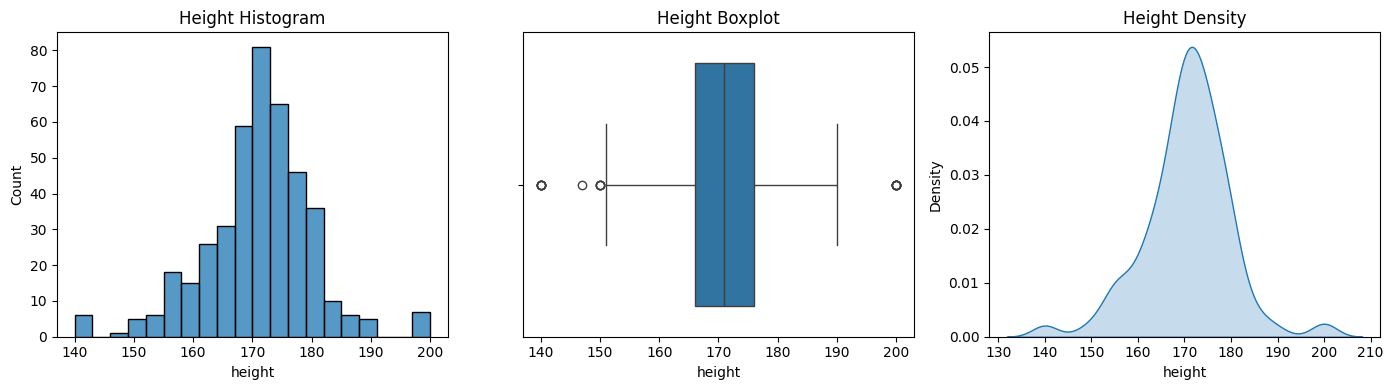

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['height'], bins=20, kde=False)
plt.title('Height Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['height'])
plt.title('Height Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['height'], fill=True)
plt.title('Height Density')

plt.tight_layout()
plt.show()


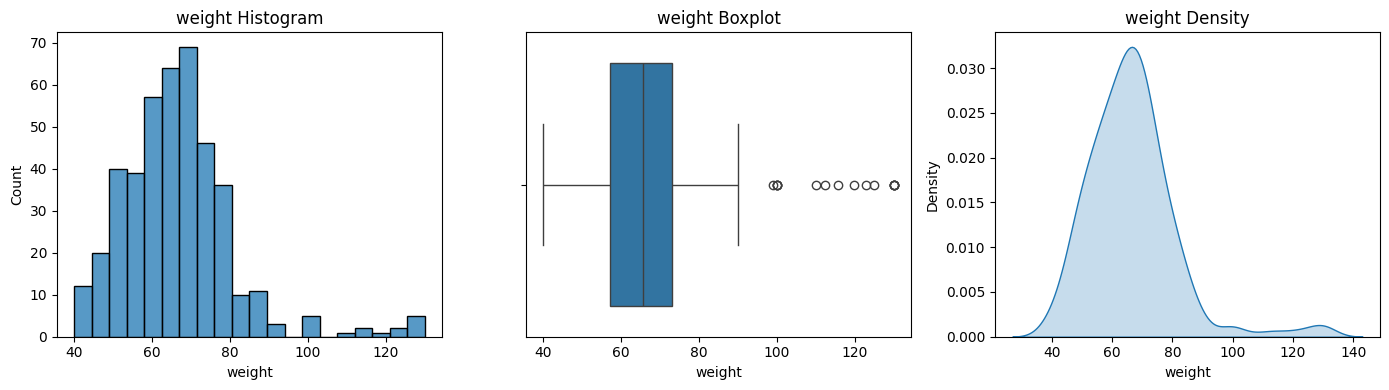

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['weight'], bins=20, kde=False)
plt.title('weight Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['weight'])
plt.title('weight Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['weight'], fill=True)
plt.title('weight Density')

plt.tight_layout()
plt.show()


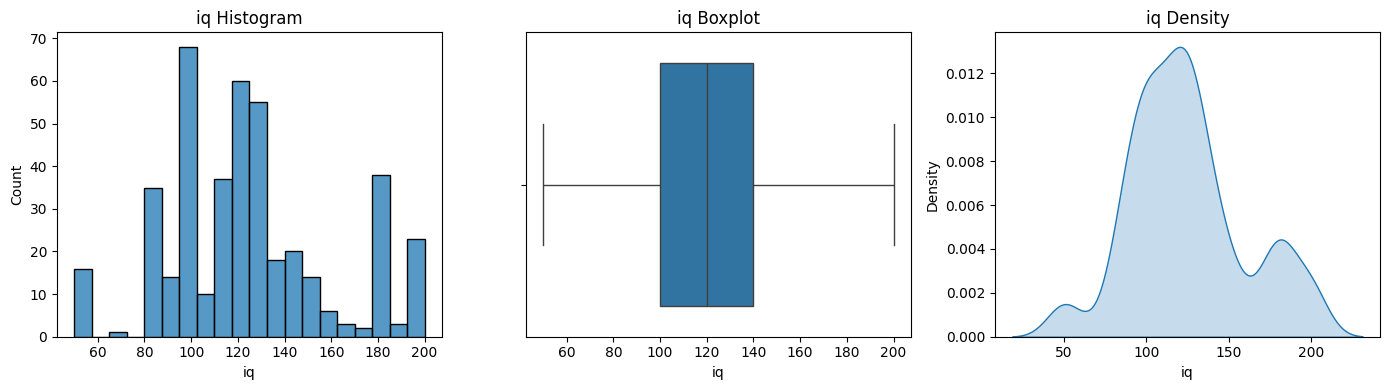

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['iq'], bins=20, kde=False)
plt.title('iq Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['iq'])
plt.title('iq Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['iq'], fill=True)
plt.title('iq Density')

plt.tight_layout()
plt.show()


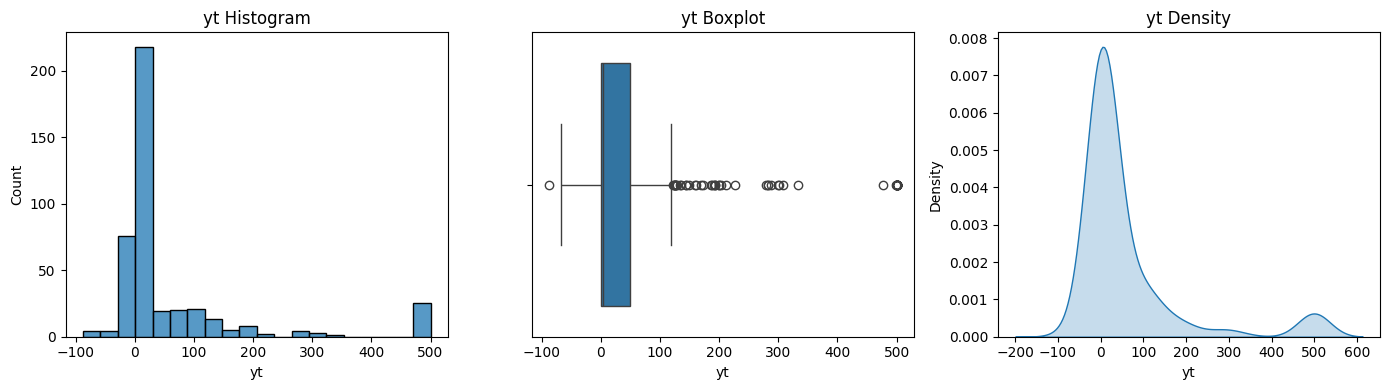

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['yt'], bins=20, kde=False)
plt.title('yt Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['yt'])
plt.title('yt Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['yt'], fill=True)
plt.title('yt Density')

plt.tight_layout()
plt.show()


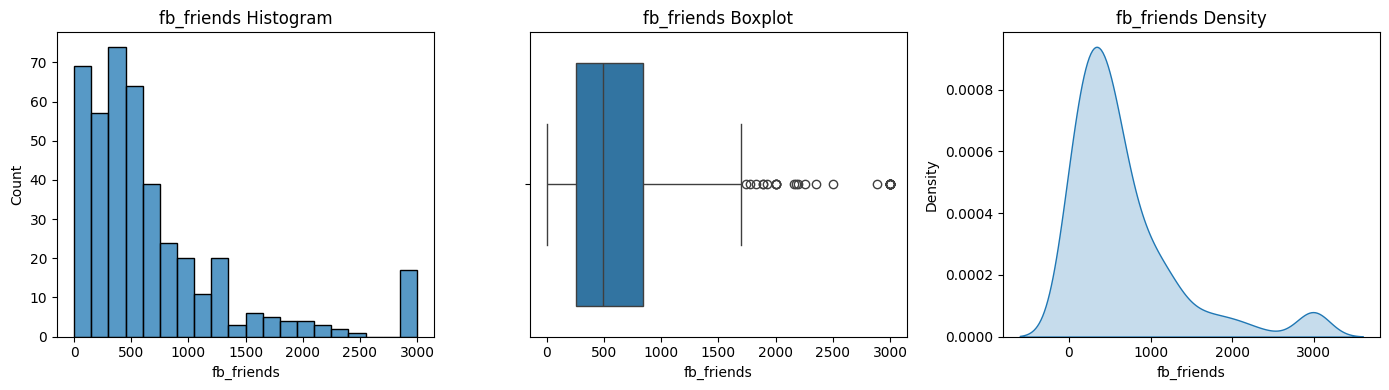

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['fb_friends'], bins=20, kde=False)
plt.title('fb_friends Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['fb_friends'])
plt.title('fb_friends Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['fb_friends'], fill=True)
plt.title('fb_friends Density')

plt.tight_layout()
plt.show()

height分割區域

In [67]:
# 查詢 height 和 weight 同時缺失的筆數
missing_count = train_df[train_df['height'].isnull() & train_df['weight'].isnull()].shape[0]

print(f"身高和體重同時缺失的有 {missing_count} 筆")

身高和體重同時缺失的有 0 筆


In [68]:
# 查詢 height 和 weight 同時缺失的筆數
missing_count = test_df[test_df['height'].isnull() & test_df['weight'].isnull()].shape[0]

print(f"身高和體重同時缺失的有 {missing_count} 筆")

身高和體重同時缺失的有 0 筆


height

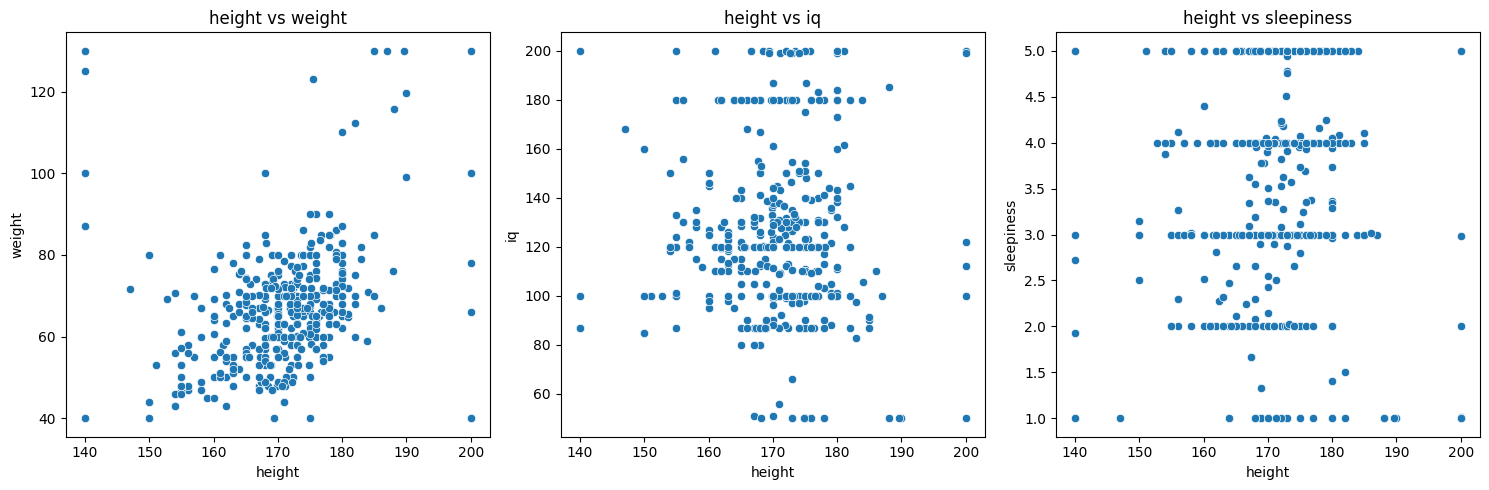

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# 建立 1 行 3 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='height', y='weight', data=train_df, ax=axes[0])
axes[0].set_title('height vs weight')

# 第二張圖
sns.scatterplot(x='height', y='iq', data=train_df, ax=axes[1])
axes[1].set_title('height vs iq')

# 第三張圖
sns.scatterplot(x='height', y='sleepiness', data=train_df, ax=axes[2])
axes[2].set_title('height vs sleepiness')

plt.tight_layout()  # 自動調整間距
plt.show()

Text(0.5, 1.0, 'height vs fb_friends')

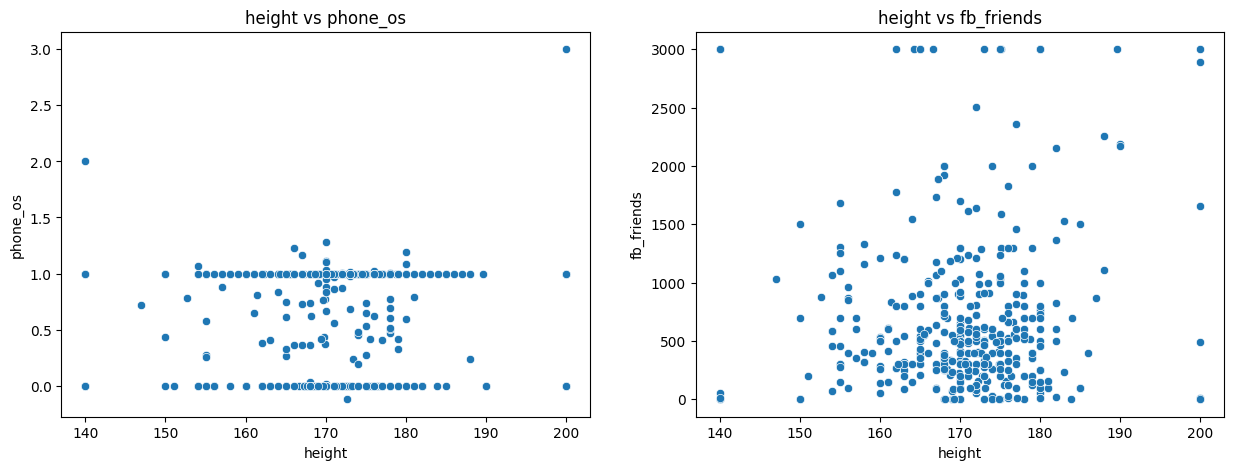

In [70]:
# 建立 1 行 3 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='height', y='phone_os', data=train_df, ax=axes[0])
axes[0].set_title('height vs phone_os')

# 第二張圖
sns.scatterplot(x='height', y='fb_friends', data=train_df, ax=axes[1])
axes[1].set_title('height vs fb_friends')


**補weight**

In [71]:
# height <= 140
median_low = train_df.loc[train_df['height'] <= 140, 'weight'].median()
train_df.loc[(train_df['height'] <= 140) & (train_df['weight'].isnull()), 'weight'] = median_low
test_df.loc[(test_df['height'] <= 140) & (test_df['weight'].isnull()), 'weight'] = median_low

# 140 < height <= 160
median_140_160 = train_df.loc[(train_df['height'] > 140) & (train_df['height'] <= 160), 'weight'].median()
train_df.loc[(train_df['height'] > 140) & (train_df['height'] <= 160) & (train_df['weight'].isnull()), 'weight'] = median_140_160
test_df.loc[(test_df['height'] > 140) & (test_df['height'] <= 160) & (test_df['weight'].isnull()), 'weight'] = median_140_160

# 160 < height < 170
median_male = train_df.loc[(train_df['height'] > 160) & (train_df['height'] < 170) , 'weight'].median()
train_df.loc[(train_df['height'] > 160) & (train_df['height'] < 170) & (train_df['weight'].isnull()), 'weight'] = median_male
test_df.loc[(test_df['height'] > 160) & (test_df['height'] < 170) & (test_df['weight'].isnull()), 'weight'] = median_male

# 170 <= height < 180
median_170_180 = train_df.loc[(train_df['height'] >= 170) & (train_df['height'] < 180), 'weight'].median()
train_df.loc[(train_df['height'] >= 170) & (train_df['height'] < 180) & (train_df['weight'].isnull()), 'weight'] = median_170_180
test_df.loc[(test_df['height'] >= 170) & (test_df['height'] < 180) & (test_df['weight'].isnull()), 'weight'] = median_170_180

# height >= 180
median_high = train_df.loc[train_df['height'] >= 180, 'weight'].median()
train_df.loc[(train_df['height'] >= 180) & (train_df['weight'].isnull()), 'weight'] = median_high
test_df.loc[(test_df['height'] >= 180) & (test_df['weight'].isnull()), 'weight'] = median_high


**補fb_friends**

In [72]:
# Step 1. 先計算該區間的中位數
median_140_160 = train_df.loc[(train_df['height'] >= 170) & (180 >= train_df['height']), 'fb_friends'].median()

# Step 2. 只補 fb_friends 缺失 且 height 在 140 ~ 160 的資料
train_df.loc[(train_df['height'] >= 170) & (180 >= train_df['height']) & (train_df['fb_friends'].isnull()), 'fb_friends'] = median_140_160
test_df.loc[(train_df['height'] >= 170) & (180 >= train_df['height']) & (test_df['fb_friends'].isnull()), 'fb_friends'] = median_140_160

weight分割

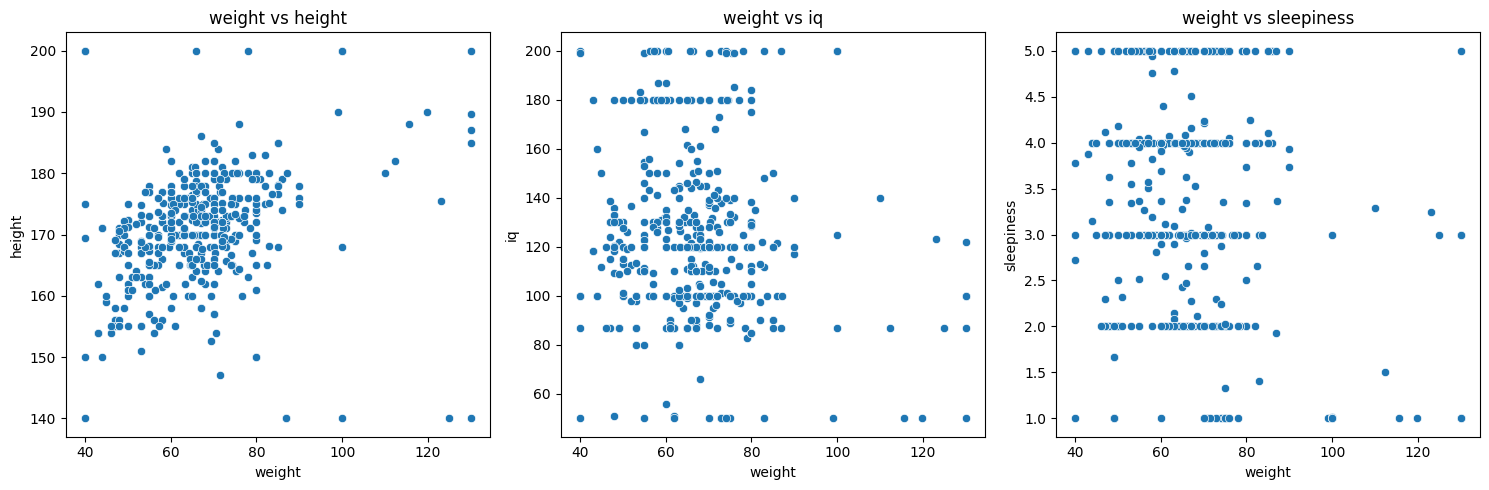

In [73]:
# 建立 1 行 3 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='weight', y='height', data=train_df, ax=axes[0])
axes[0].set_title('weight vs height')

# 第二張圖
sns.scatterplot(x='weight', y='iq', data=train_df, ax=axes[1])
axes[1].set_title('weight vs iq')

# 第三張圖
sns.scatterplot(x='weight', y='sleepiness', data=train_df, ax=axes[2])
axes[2].set_title('weight vs sleepiness')

plt.tight_layout()  # 自動調整間距
plt.show()

Text(0.5, 1.0, 'weight vs fb_friends')

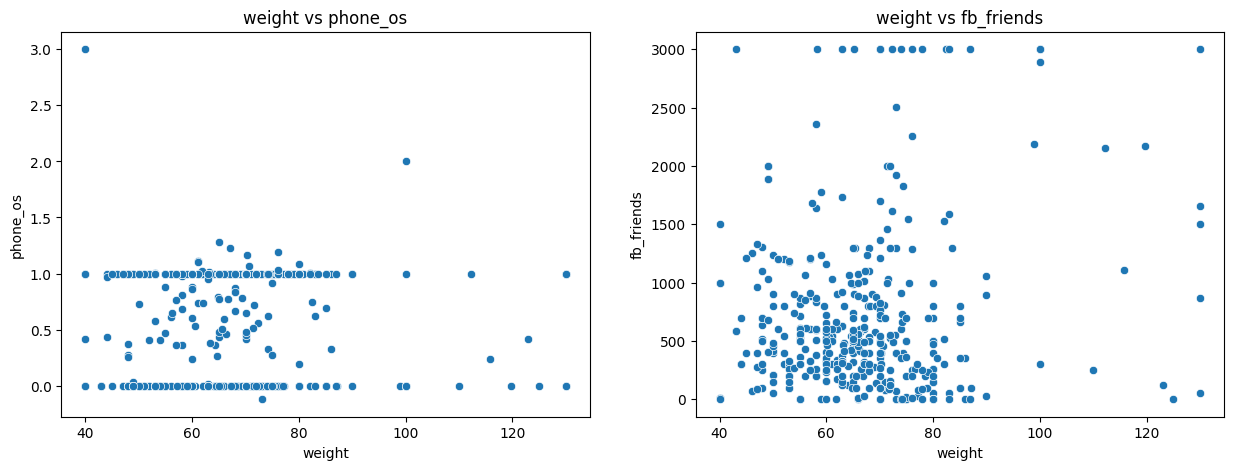

In [74]:
# 建立 1 行 3 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='weight', y='phone_os', data=train_df, ax=axes[0])
axes[0].set_title('weight vs phone_os')

# 第二張圖
sns.scatterplot(x='weight', y='fb_friends', data=train_df, ax=axes[1])
axes[1].set_title('weight vs fb_friends')


**補height**

In [75]:
# 計算 40 >= weight 的 height 中位數
median_low = train_df.loc[40 >= train_df['weight'], 'height'].median()

# 只補 weight =< 40 & height 缺失 的資料
train_df.loc[(40 >= train_df['weight']) & (train_df['height'].isnull()), 'height'] = median_low
test_df.loc[(40 >= train_df['weight']) & (test_df['height'].isnull()), 'height'] = median_low

# 計算 weight>80 的 height 中位數
median_low = train_df.loc[train_df['weight'] > 80, 'height'].median()

# 只補 weight >80 & height 缺失 的資料
train_df.loc[(train_df['weight'] > 80) & (train_df['height'].isnull()), 'height'] = median_low
test_df.loc[(train_df['weight'] > 80) & (test_df['height'].isnull()), 'height'] = median_low

In [76]:
median_male = train_df.loc[(80 >= train_df['weight']) & (train_df['weight'] >= 60), 'height'].median()

train_df.loc[(80 >= train_df['weight']) & (train_df['weight'] >= 60) & (train_df['height'].isnull()), 'height'] = median_male
test_df.loc[(80 >= test_df['weight']) & (test_df['weight'] >= 60) & (test_df['height'].isnull()), 'height'] = median_male

In [77]:
median_male = train_df.loc[(60 > train_df['weight']) & (train_df['weight'] > 40), 'height'].median()

train_df.loc[(60 > train_df['weight']) & (train_df['weight'] > 40) & (train_df['height'].isnull()), 'height'] = median_male
test_df.loc[(60 > test_df['weight']) & (test_df['weight'] > 40) & (test_df['height'].isnull()), 'height'] = median_male

**補fb_friends**

In [78]:
# Step 1. 先計算該區間的中位數
median_60_70 = train_df.loc[(train_df['weight'] >= 60) & (70 > train_df['weight']), 'fb_friends'].median()

train_df.loc[(train_df['weight'] >= 60) & (70 > train_df['weight']) & (train_df['fb_friends'].isnull()), 'fb_friends'] = median_60_70
test_df.loc[(train_df['weight'] >= 60) & (70 > train_df['weight']) & (test_df['fb_friends'].isnull()), 'fb_friends'] = median_60_70

# Step 1. 先計算該區間的中位數
median_70_80 = train_df.loc[(train_df['weight'] >= 60) & (70 >= train_df['weight']), 'fb_friends'].median()

train_df.loc[(train_df['weight'] >= 70) & (80 >= train_df['weight']) & (train_df['fb_friends'].isnull()), 'fb_friends'] = median_70_80
test_df.loc[(train_df['weight'] >= 70) & (80 >= train_df['weight']) & (test_df['fb_friends'].isnull()), 'fb_friends'] = median_70_80

fb_friends

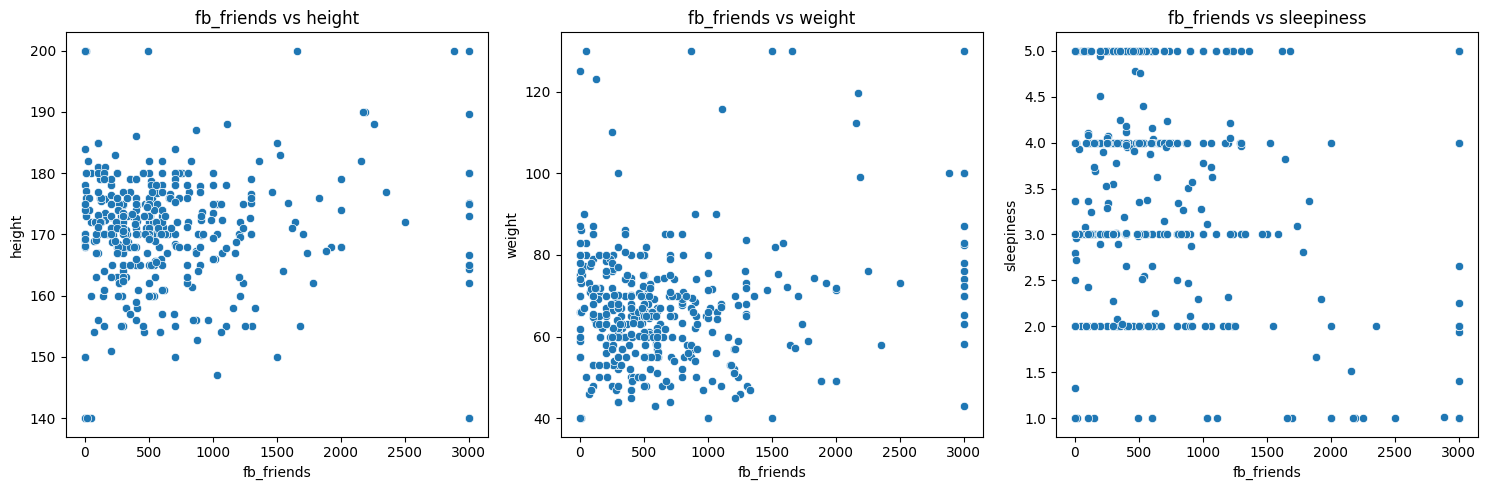

In [79]:
# 建立 1 行 3 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='fb_friends', y='height', data=train_df, ax=axes[0])
axes[0].set_title('fb_friends vs height')

# 第二張圖
sns.scatterplot(x='fb_friends', y='weight', data=train_df, ax=axes[1])
axes[1].set_title('fb_friends vs weight')

# 第三張圖
sns.scatterplot(x='fb_friends', y='sleepiness', data=train_df, ax=axes[2])
axes[2].set_title('fb_friends vs sleepiness')

plt.tight_layout()  # 自動調整間距
plt.show()

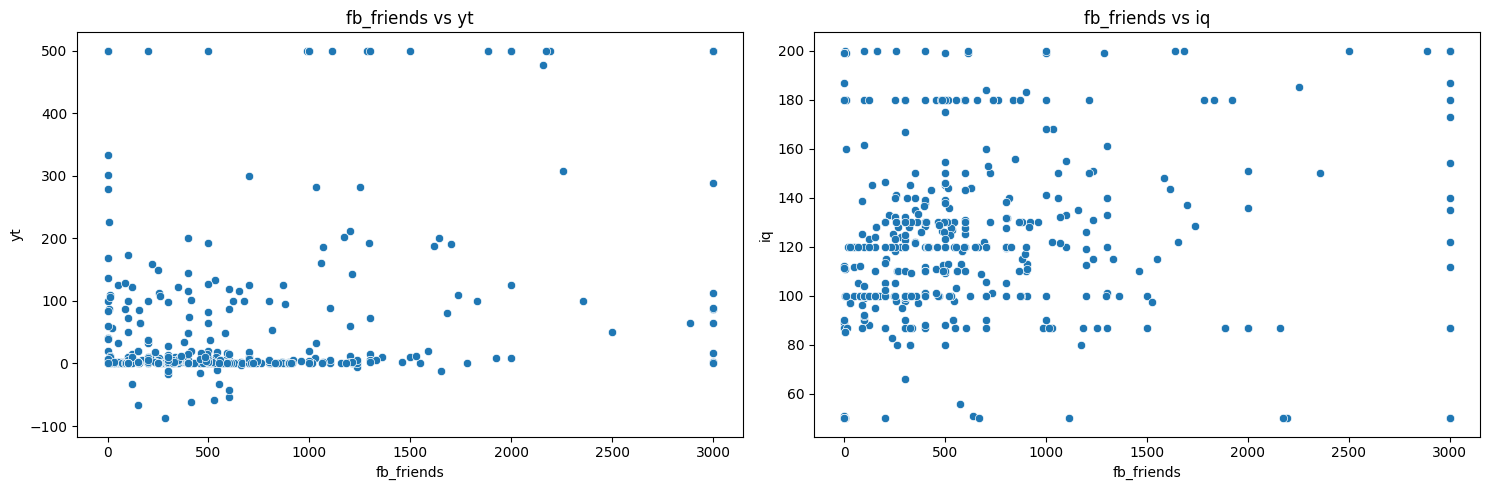

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# 建立 1 行 2 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='fb_friends', y='yt', data=train_df, ax=axes[0])
axes[0].set_title('fb_friends vs yt')

# 第二張圖
sns.scatterplot(x='fb_friends', y='iq', data=train_df, ax=axes[1])
axes[1].set_title('fb_friends vs iq')

plt.tight_layout()  # 自動調整間距
plt.show()

In [81]:
median_fb = train_df['fb_friends'].median()
train_df.loc[train_df['fb_friends'].isnull(), 'fb_friends'] = median_fb
test_df.loc[test_df['fb_friends'].isnull(), 'fb_friends'] = median_fb

yt

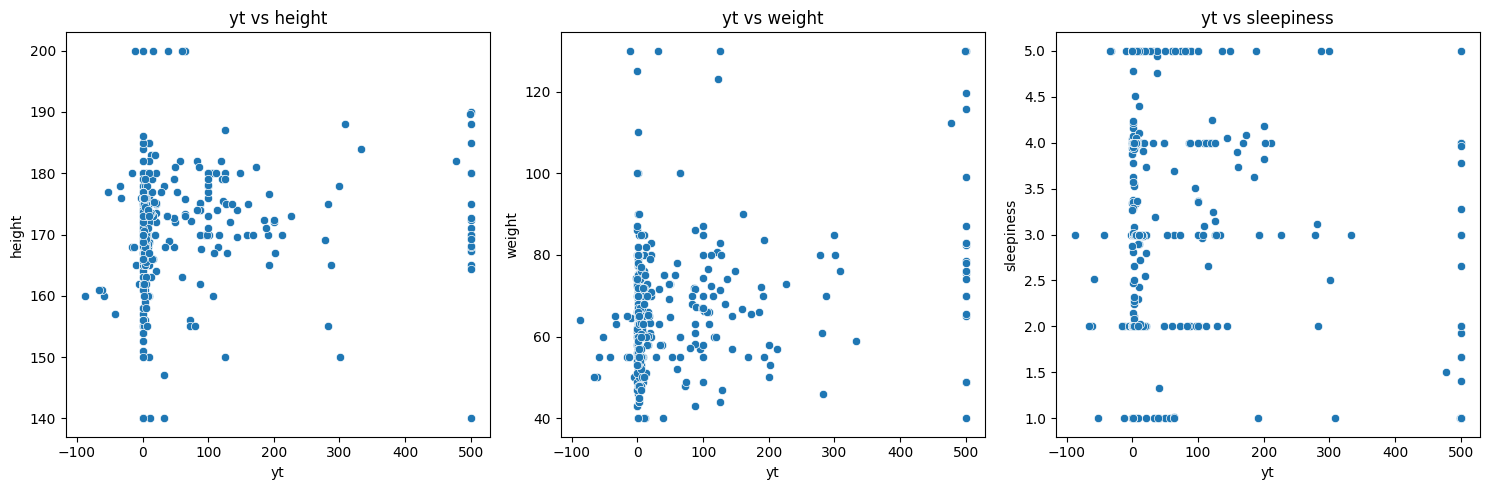

In [82]:
# 建立 1 行 3 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='yt', y='height', data=train_df, ax=axes[0])
axes[0].set_title('yt vs height')

# 第二張圖
sns.scatterplot(x='yt', y='weight', data=train_df, ax=axes[1])
axes[1].set_title('yt vs weight')

# 第三張圖
sns.scatterplot(x='yt', y='sleepiness', data=train_df, ax=axes[2])
axes[2].set_title('yt vs sleepiness')

plt.tight_layout()  # 自動調整間距
plt.show()

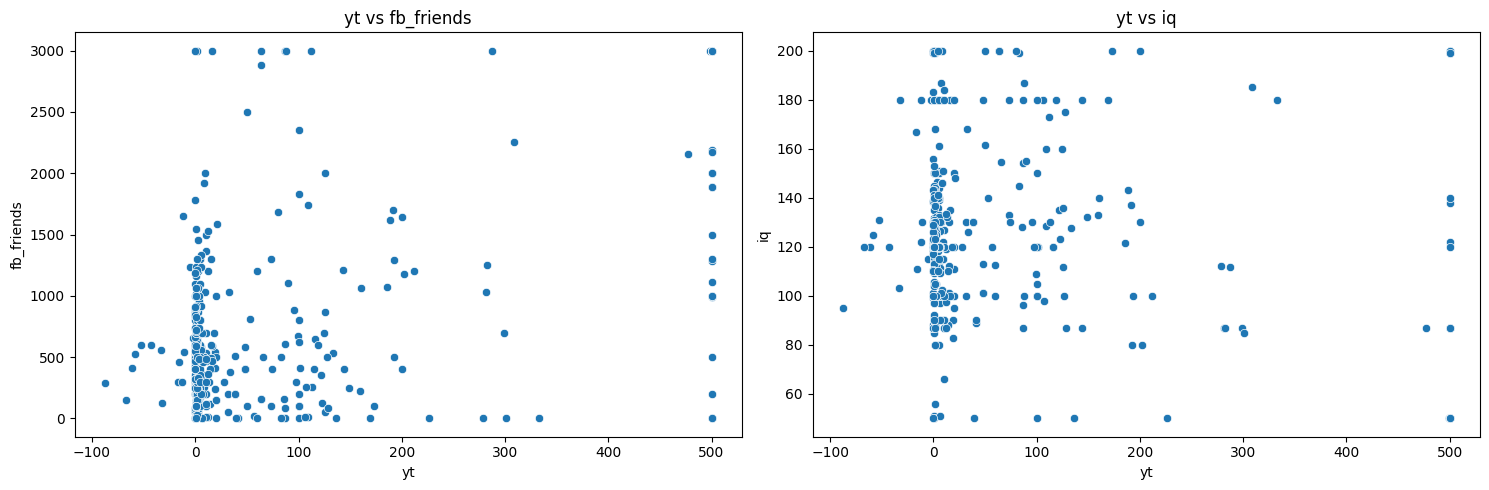

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# 建立 1 行 2 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='yt', y='fb_friends', data=train_df, ax=axes[0])
axes[0].set_title('yt vs fb_friends')

# 第二張圖
sns.scatterplot(x='yt', y='iq', data=train_df, ax=axes[1])
axes[1].set_title('yt vs iq')

plt.tight_layout()  # 自動調整間距
plt.show()

In [84]:
# 簡單 median 補值
median_yt = train_df['yt'].median()
train_df.loc[train_df['yt'].isnull(), 'yt'] = median_yt
test_df.loc[test_df['yt'].isnull(), 'yt'] = median_yt

iq

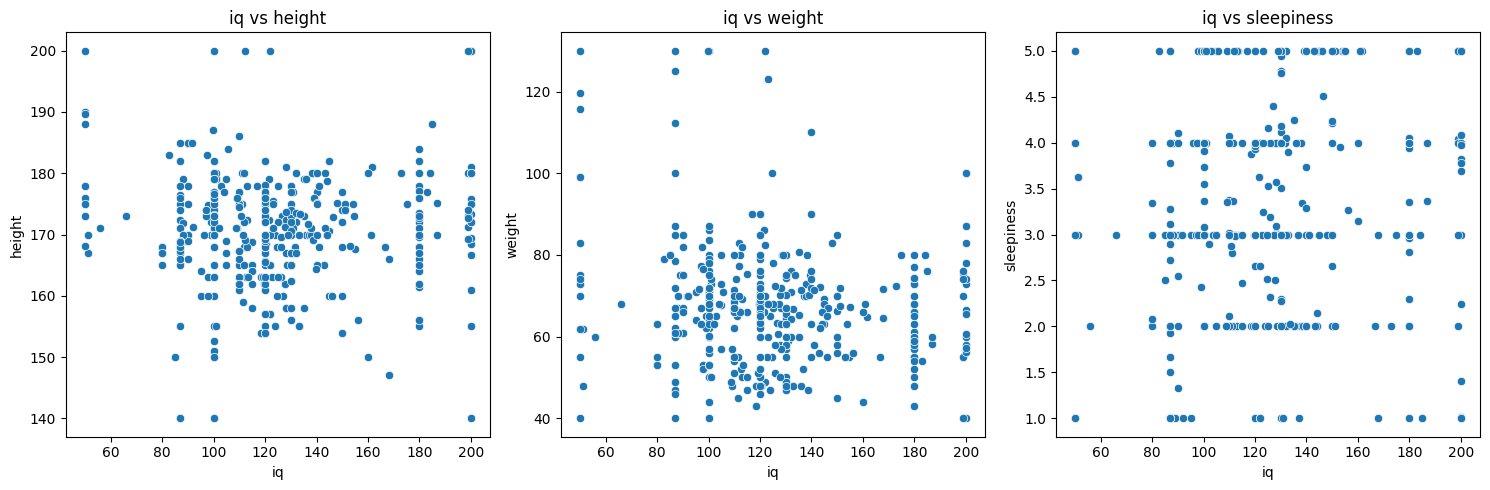

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# 建立 1 行 3 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='iq', y='height', data=train_df, ax=axes[0])
axes[0].set_title('iq vs height')

# 第二張圖
sns.scatterplot(x='iq', y='weight', data=train_df, ax=axes[1])
axes[1].set_title('iq vs weight')

# 第三張圖
sns.scatterplot(x='iq', y='sleepiness', data=train_df, ax=axes[2])
axes[2].set_title('iq vs sleepiness')

plt.tight_layout()  # 自動調整間距
plt.show()


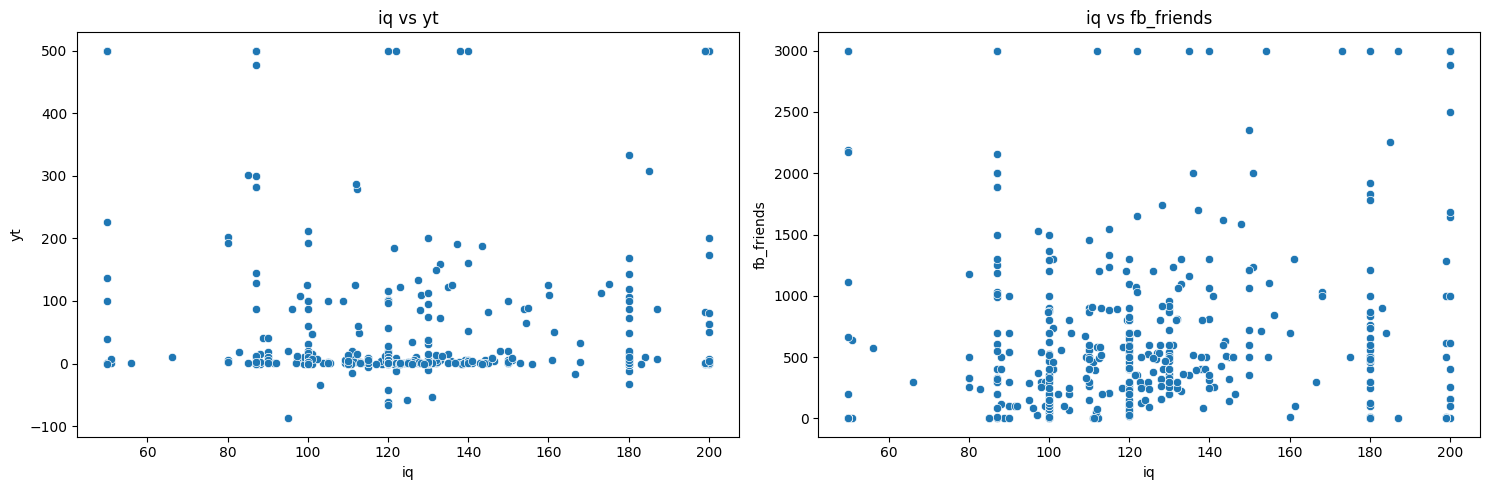

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# 建立 1 行 2 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='iq', y='yt', data=train_df, ax=axes[0])
axes[0].set_title('iq vs yt')

# 第二張圖
sns.scatterplot(x='iq', y='fb_friends', data=train_df, ax=axes[1])
axes[1].set_title('iq vs fb_friends')

plt.tight_layout()  # 自動調整間距
plt.show()

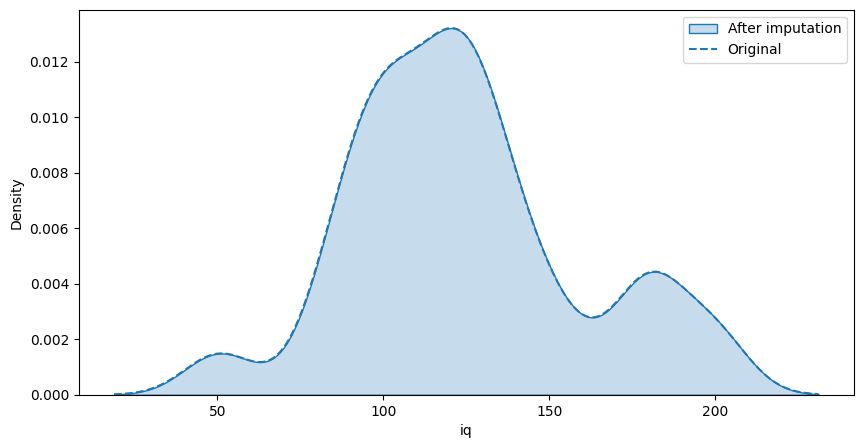

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- 基本設定 ----------
predictor_cols = ['height', 'weight', 'fb_friends', 'yt', 'sleepiness']
target_col = 'iq'

# ---------- Step 1. 複製資料 ----------
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

# ---------- Step 2. 補 predictor 缺失 (KNNImputer + StandardScaler) ----------
scaler = StandardScaler()
train_df_copy[predictor_cols] = scaler.fit_transform(train_df_copy[predictor_cols])
test_df_copy[predictor_cols] = scaler.transform(test_df_copy[predictor_cols])

imputer = KNNImputer(n_neighbors=5)
train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

# ---------- Step 3. KNN Regression 補 IQ ----------
model = KNeighborsRegressor(n_neighbors=5)

# 訓練模型時，僅使用有 'iq' 值的資料
model.fit(train_df_copy[train_df[target_col].notnull()][predictor_cols],
          train_df[train_df[target_col].notnull()][target_col])

# 檢查訓練集與測試集是否有缺失 'iq' 的資料
missing_train = train_df[target_col].isnull()
missing_test = test_df[target_col].isnull()

# 只有當 'iq' 欄位有缺失值時才進行預測
if missing_train.any():  # 只有在訓練資料有缺失值時才預測
    train_df.loc[missing_train, target_col] = model.predict(train_df_copy.loc[missing_train, predictor_cols])

if missing_test.any():  # 只有在測試資料有缺失值時才預測
    test_df.loc[missing_test, target_col] = model.predict(test_df_copy.loc[missing_test, predictor_cols])

# ---------- Step 4. 補值診斷 ----------
# 繪製 'iq' 欄位的分佈圖進行補值診斷
plt.figure(figsize=(10, 5))
sns.kdeplot(train_df[target_col], label='After imputation', fill=True)
sns.kdeplot(train_df_copy[train_df_copy[target_col].notnull()][target_col], label='Original', linestyle='--')
plt.legend()
plt.show()


# 3.3 DT填補類別欄位

In [88]:
for target, predictors in cat_predictor_dict.items():
    print(f'正在處理: {target}')

    train_df, test_df = dt_impute_classifier(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())


正在處理: phone_os
phone_os 缺失值統計 (train):
phone_os    0
dtype: int64
phone_os 缺失值統計 (test):
phone_os    0
dtype: int64
正在處理: sleepiness
sleepiness 缺失值統計 (train):
sleepiness    0
dtype: int64
sleepiness 缺失值統計 (test):
sleepiness    0
dtype: int64


# 3.5 XG*304男(0.877)

In [89]:
#XGBoost
import xgboost as xgb

def train_xgb_imputer(train_df):
    imputer_models = {}
    for col in train_df.columns:
        known = train_df[train_df[col].notnull()]
        if len(known) > 0:
            model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
            model.fit(known.drop(columns=[col]), known[col])
            imputer_models[col] = model
    return imputer_models

def impute_with_xgb(train_df, test_df, imputer_models):
    df_test_imputed = test_df.copy()
    for col, model in imputer_models.items():
        unknown = df_test_imputed[df_test_imputed[col].isnull()]
        if len(unknown) > 0:
            predictions = model.predict(unknown.drop(columns=[col]))

            # 根據原始資料型態來決定轉換方式
            if pd.api.types.is_integer_dtype(train_df[col]):
                predictions = pd.Series(predictions).round().astype(pd.Int64Dtype()).to_numpy()

            df_test_imputed.loc[df_test_imputed[col].isnull(), col] = predictions

    return df_test_imputed



# 訓練 XGBoost 插補模型
xgb_models = train_xgb_imputer(train_df)

# 使用 XGBoost 模型插補 test_df
# 訓練補值模型
models = train_xgb_imputer(train_df)

# 補 train 自己
train_df = impute_with_xgb(train_df, train_df, models)

# 補 test
test_df = impute_with_xgb(train_df, test_df, models)

In [90]:
train_df

phone_os  height  weight  sleepiness          iq   fb_friends         yt  \
0           0   154.0    43.0           3  118.434843   583.000000   0.000000   
1           0   156.0    47.0           2  130.000000   958.171445   3.500000   
2           1   170.0    61.0           2   90.000000   540.000000  18.837224   
3           0   170.0    62.0           4  100.000000   331.917017   5.000000   
4           1   158.0    67.0           3  128.000000   320.000000   1.200000   
..        ...     ...     ...         ...         ...          ...        ...   
418         1   166.0    66.0           4   90.000000  1000.000000   1.000000   
419         1   176.0    65.0           4   87.000000  1300.000000   2.000000   
420         0   174.0    72.0           2  150.950407  2000.000000   9.000000   
421         0   167.0    50.0           3  180.000000   483.000000  10.000000   
422         1   173.0    68.0           3   66.000000   300.000000  10.000000   

     is_outlier_fb_friends  is_outlier_yt  is_outlier_height  \
0                        0              0                  0   
1                        1              0                  0   
2                        0              1                  0   
3                        1              0                  0   
4                        0              0                  0   
..                     ...            ...                ...   
418                      0              0                  0   
419                      0              0                  0   
420                      1              0                  0   
421                      0              0                  0   
422                      0              0                  0   

     is_outlier_weight  is_outlier_iq  
0                    0              1  
1                    0              0  
2                    0              0  
3                    0              0  
4                    0              0  
..                 ...            ...  
418                  0              0  
419                  0              0  
420                  0              1  
421                  0              0  
422                  0              0  

[423 rows x 12 columns]

# XG(合併處理)*304男

In [67]:
import xgboost as xgb
import pandas as pd

# Assuming train_df and test_df are already defined
train_df['dataset'] = 'train'
test_df['dataset'] = 'test'
full_df = pd.concat([train_df, test_df], ignore_index=True)

def train_xgb_imputer(train_df):
    imputer_models = {}
    # Exclude the 'dataset' column from the feature set
    feature_cols = [c for c in train_df.columns if c != 'dataset']

    for col in feature_cols:
        known = train_df[train_df[col].notnull()]
        if len(known) > 0:
            # Drop both the target column and 'dataset' from features
            X = known.drop(columns=[col, 'dataset'])
            y = known[col]
            model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
            model.fit(X, y)
            imputer_models[col] = model
    return imputer_models

def impute_with_xgb(train_df, test_df, imputer_models):
    df_test_imputed = test_df.copy()
    for col, model in imputer_models.items():
        unknown = df_test_imputed[df_test_imputed[col].isnull()]
        if len(unknown) > 0:
            # Drop both the target column and 'dataset' from features
            X_unknown = unknown.drop(columns=[col, 'dataset'])
            predictions = model.predict(X_unknown)

            # Adjust predictions based on original data type
            if pd.api.types.is_integer_dtype(train_df[col]):
                predictions = pd.Series(predictions).round().astype(pd.Int64Dtype()).to_numpy()

            df_test_imputed.loc[df_test_imputed[col].isnull(), col] = predictions

    return df_test_imputed

# Train XGBoost imputer models
xgb_models = train_xgb_imputer(full_df)

# Impute the full_df
full_df = impute_with_xgb(full_df, full_df, xgb_models)

# Split back into train and test
train_df = full_df[full_df['dataset'] == 'train'].drop(columns=['dataset'])
test_df = full_df[full_df['dataset'] == 'test'].drop(columns=['dataset'])

# 3.4 XG分欄特徵選擇(擇一)

正在處理: fb_friends
fb_friends 缺失值統計 (train):
fb_friends    0
dtype: int64
fb_friends 缺失值統計 (test):
fb_friends    0
dtype: int64


<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

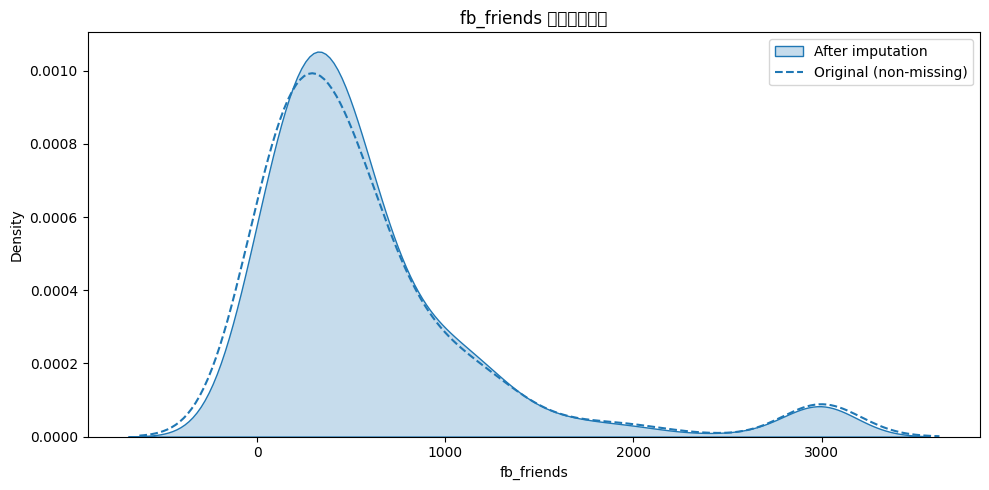

正在處理: iq
iq 缺失值統計 (train):
iq    0
dtype: int64
iq 缺失值統計 (test):
iq    0
dtype: int64


<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

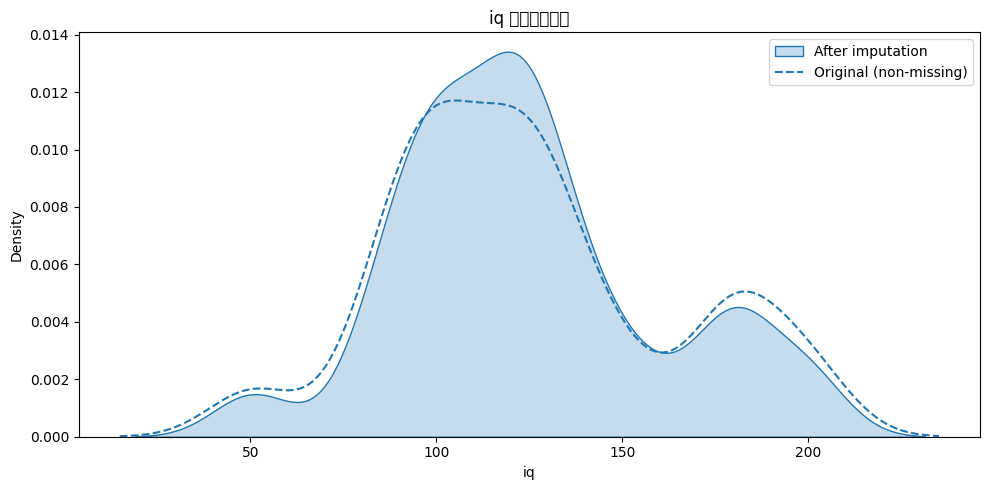

正在處理: yt
yt 缺失值統計 (train):
yt    0
dtype: int64
yt 缺失值統計 (test):
yt    0
dtype: int64


<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

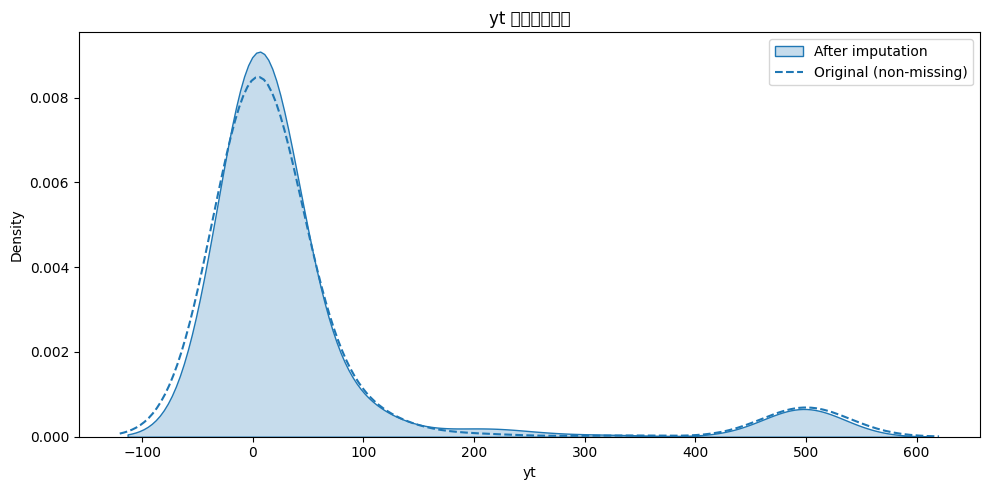

正在處理: weight
weight 缺失值統計 (train):
weight    0
dtype: int64
weight 缺失值統計 (test):
weight    0
dtype: int64


<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

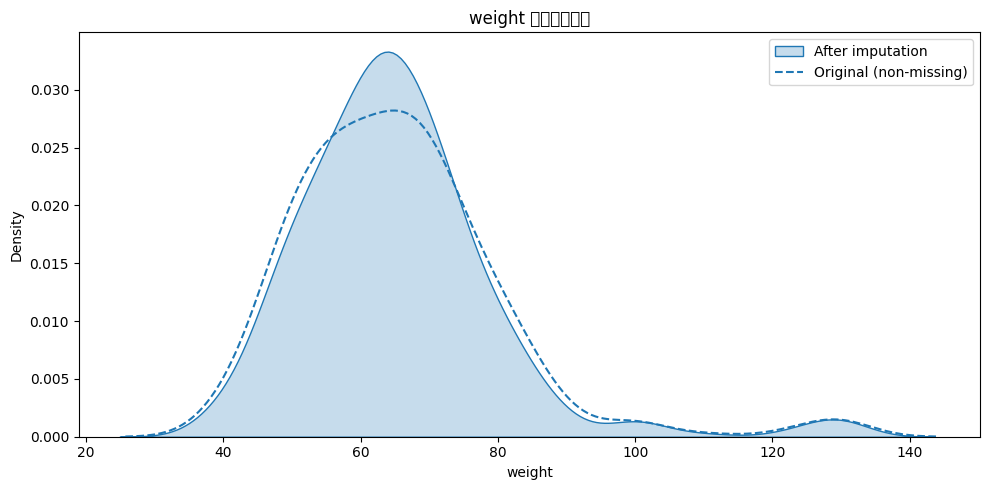

正在處理: height
height 缺失值統計 (train):
height    0
dtype: int64
height 缺失值統計 (test):
height    0
dtype: int64


<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

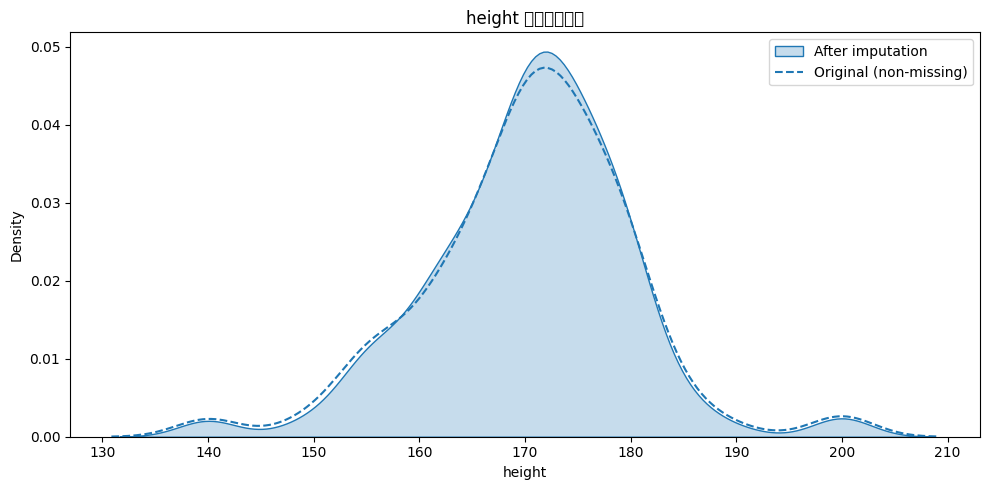

In [ ]:
for target, predictors in num_predictor_dict.items():
    train_df_before = train_df.copy()
    print(f'正在處理: {target}')

    train_df, test_df = xgboost_impute(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())

    plot_imputation_distribution(
        df_before=train_df_before,
        df_after=train_df,
        target_col=target,
        title=f'{target} 補值前後分佈'
    )

# 3.4 RF數值欄位填補(擇一)

正在處理: fb_friends
fb_friends 缺失值統計 (train):
fb_friends    0
dtype: int64
fb_friends 缺失值統計 (test):
fb_friends    0
dtype: int64


<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

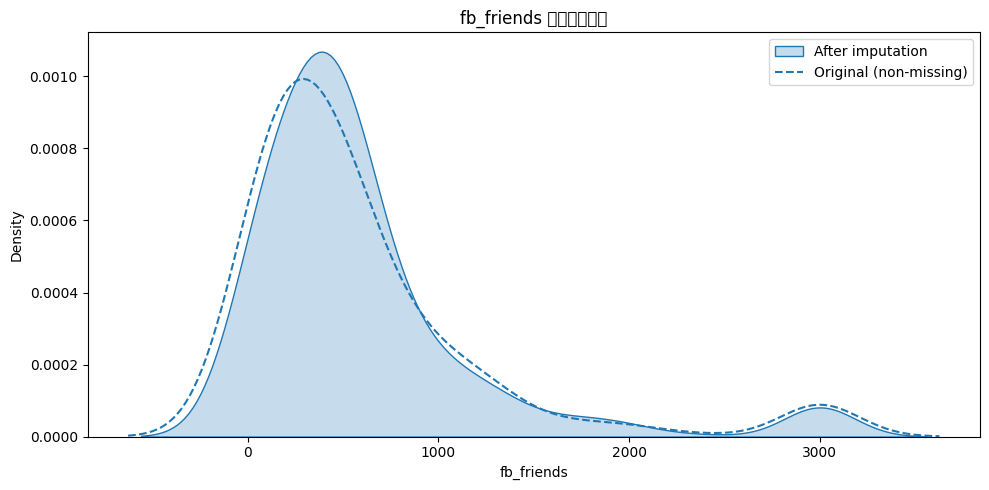

正在處理: iq
iq 缺失值統計 (train):
iq    0
dtype: int64
iq 缺失值統計 (test):
iq    0
dtype: int64


<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

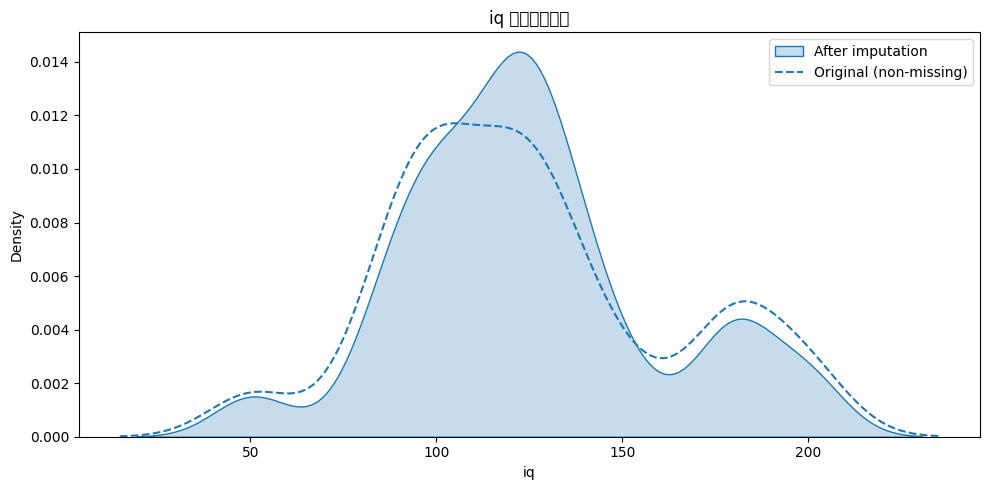

正在處理: yt
yt 缺失值統計 (train):
yt    0
dtype: int64
yt 缺失值統計 (test):
yt    0
dtype: int64


<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

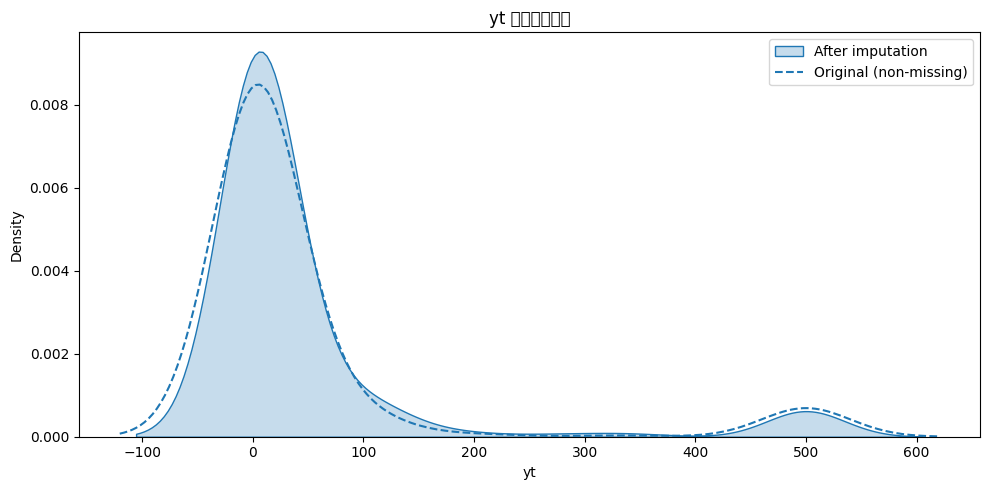

正在處理: weight
weight 缺失值統計 (train):
weight    0
dtype: int64
weight 缺失值統計 (test):
weight    0
dtype: int64


<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

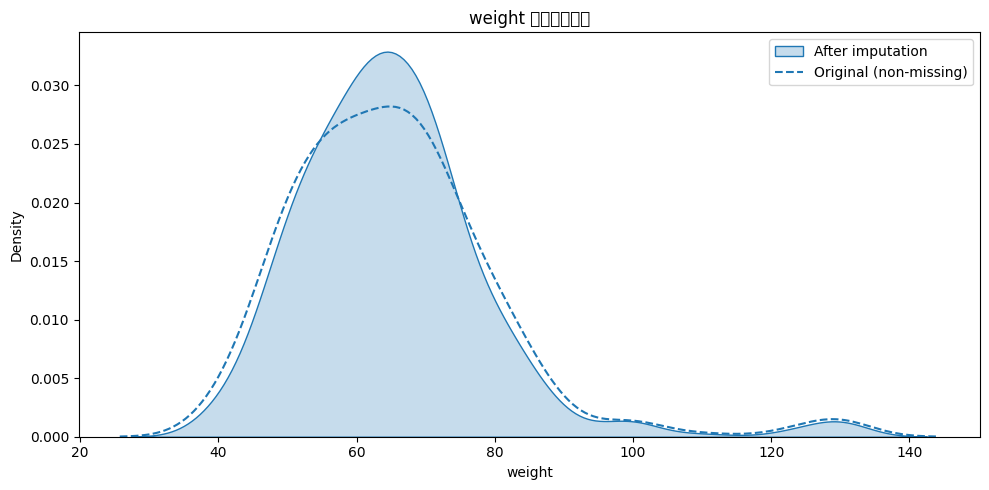

正在處理: height
height 缺失值統計 (train):
height    0
dtype: int64
height 缺失值統計 (test):
height    0
dtype: int64


<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

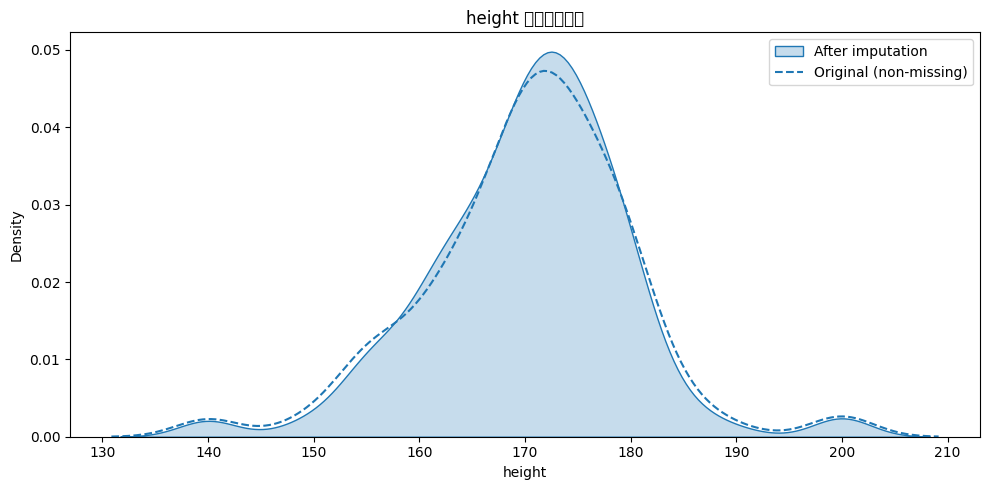

In [ ]:
for target, predictors in num_predictor_dict.items():
    train_df_before = train_df.copy()
    print(f'正在處理: {target}')

    train_df, test_df = rf_impute(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())

    plot_imputation_distribution(
        df_before=train_df_before,
        df_after=train_df,
        target_col=target,
        title=f'{target} 補值前後分佈'
    )

# 3.4 SVM(擇一)

正在處理: fb_friends
fb_friends 缺失值統計 (train):
fb_friends    0
dtype: int64
fb_friends 缺失值統計 (test):
fb_friends    0
dtype: int64


<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

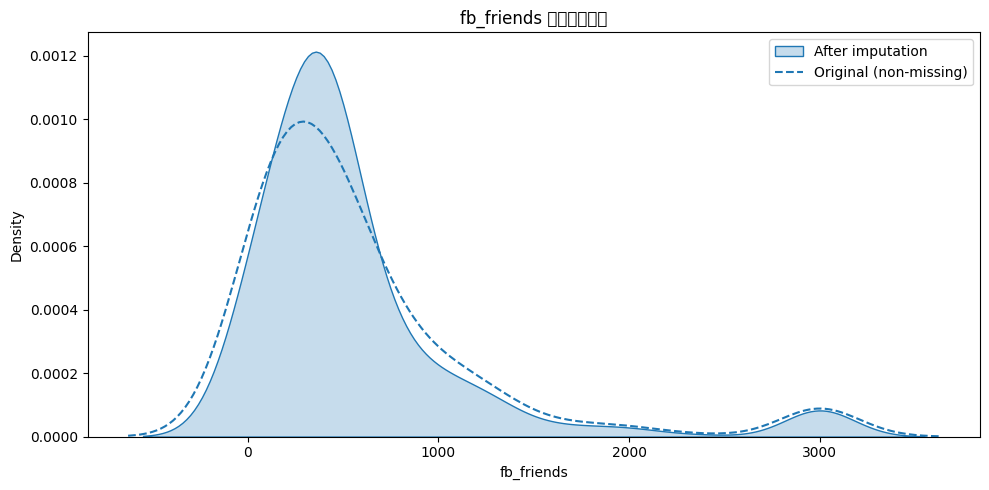

正在處理: iq
iq 缺失值統計 (train):
iq    0
dtype: int64
iq 缺失值統計 (test):
iq    0
dtype: int64


<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

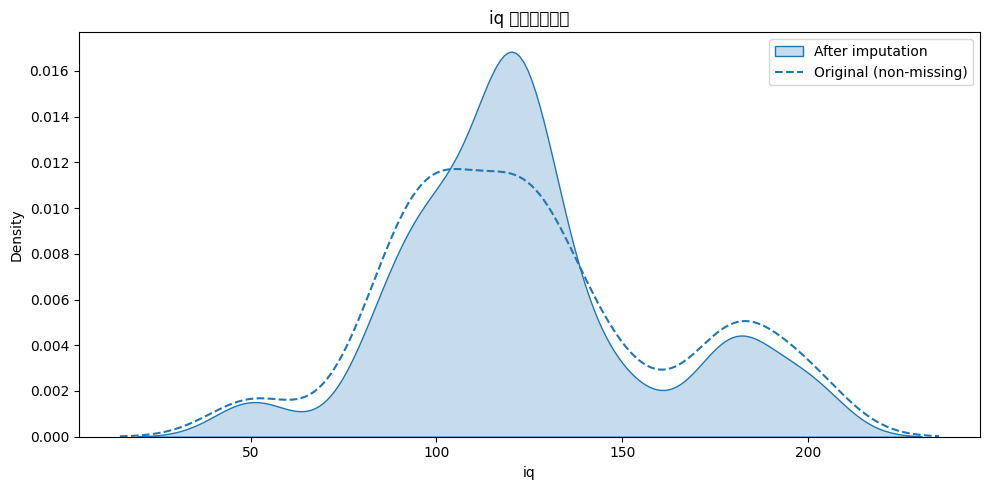

正在處理: yt
yt 缺失值統計 (train):
yt    0
dtype: int64
yt 缺失值統計 (test):
yt    0
dtype: int64


<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

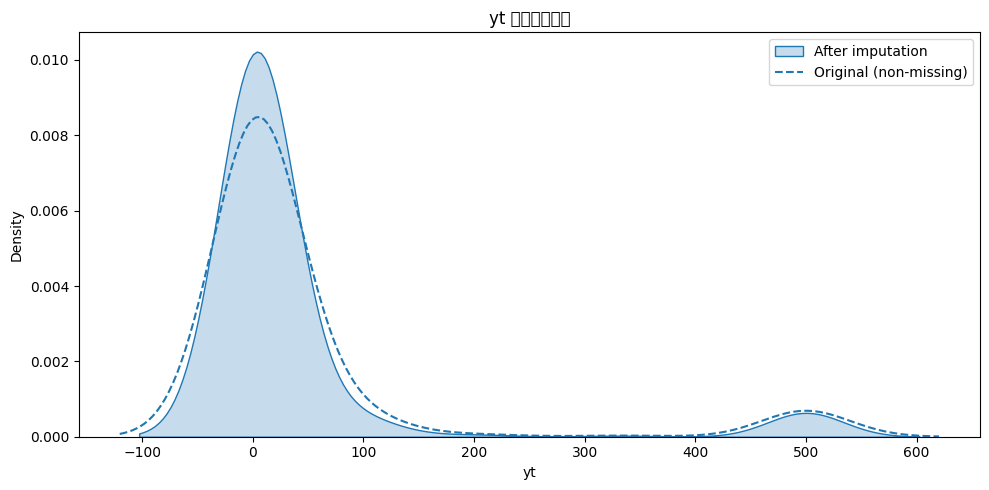

正在處理: weight
weight 缺失值統計 (train):
weight    0
dtype: int64
weight 缺失值統計 (test):
weight    0
dtype: int64


<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

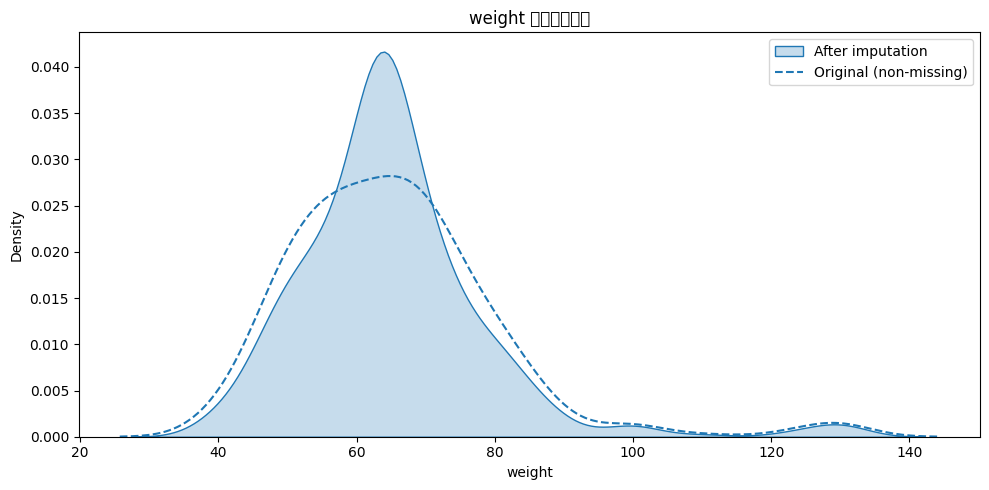

正在處理: height
height 缺失值統計 (train):
height    0
dtype: int64
height 缺失值統計 (test):
height    0
dtype: int64


<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

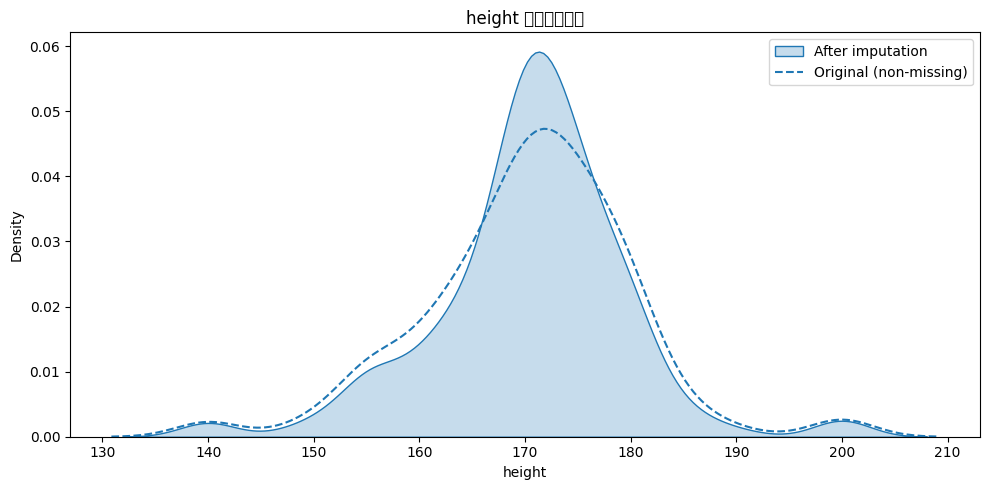

In [ ]:
for target, predictors in num_predictor_dict.items():
    train_df_before = train_df.copy()
    print(f'正在處理: {target}')

    train_df, test_df = svm_impute(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())

    plot_imputation_distribution(
        df_before=train_df_before,
        df_after=train_df,
        target_col=target,
        title=f'{target} 補值前後分佈'
    )

# 3.4 KNN(擇一)

正在處理: fb_friends
fb_friends 缺失值統計 (train):
fb_friends    0
dtype: int64
fb_friends 缺失值統計 (test):
fb_friends    0
dtype: int64


<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

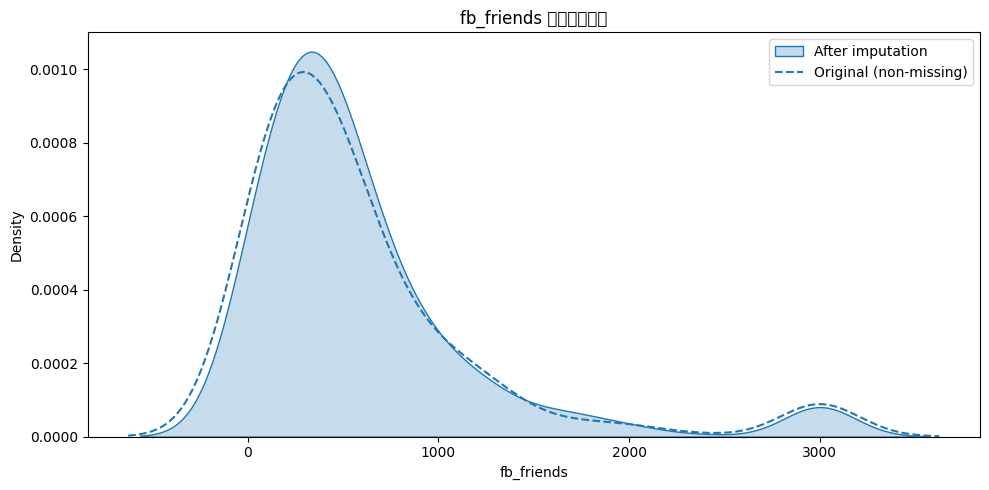

正在處理: iq
iq 缺失值統計 (train):
iq    0
dtype: int64
iq 缺失值統計 (test):
iq    0
dtype: int64


<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

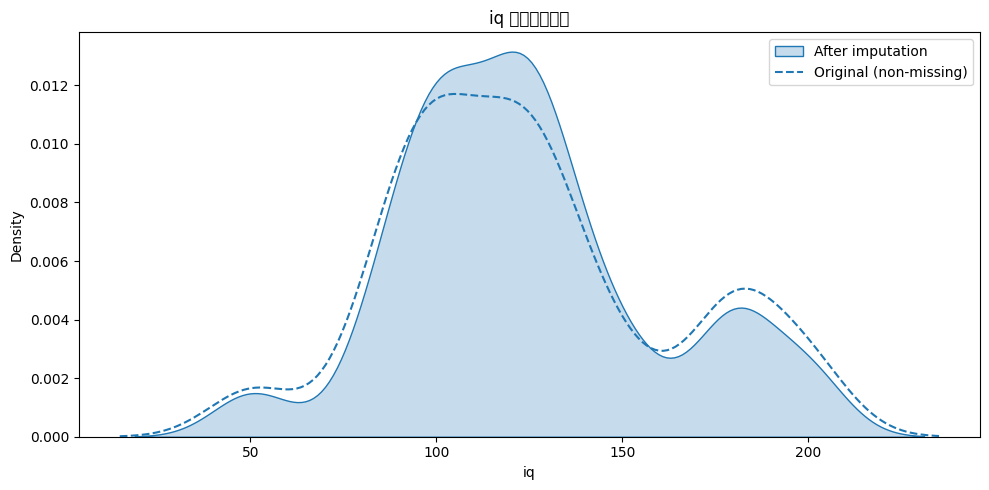

正在處理: yt
yt 缺失值統計 (train):
yt    0
dtype: int64
yt 缺失值統計 (test):
yt    0
dtype: int64


<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

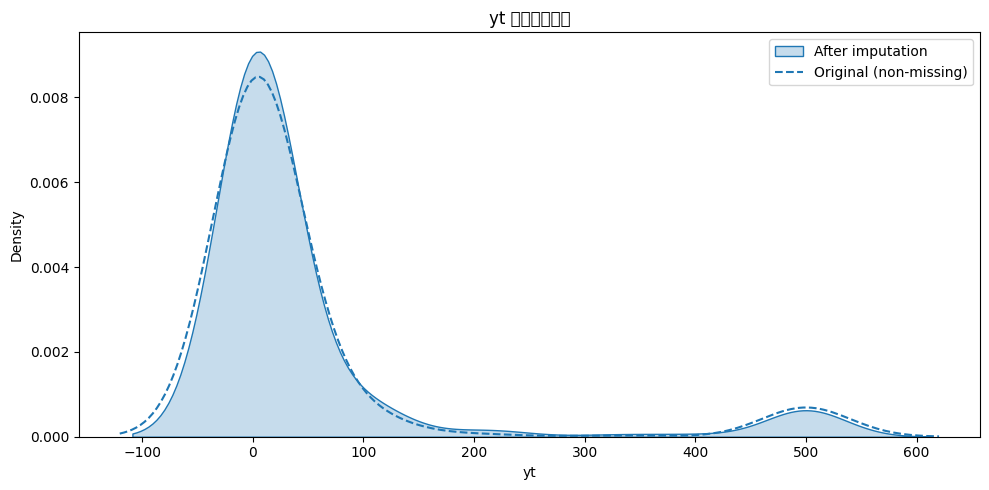

正在處理: weight
weight 缺失值統計 (train):
weight    0
dtype: int64
weight 缺失值統計 (test):
weight    0
dtype: int64


<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

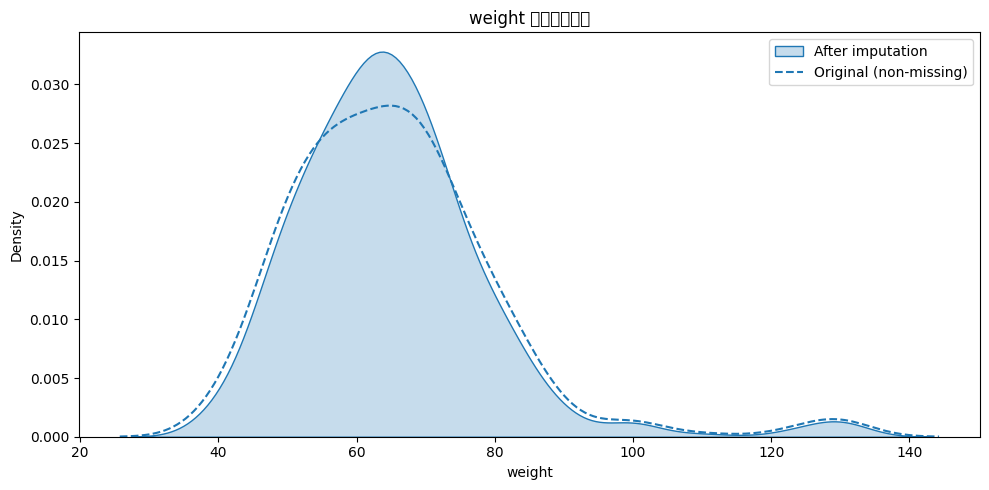

正在處理: height
height 缺失值統計 (train):
height    0
dtype: int64
height 缺失值統計 (test):
height    0
dtype: int64


<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

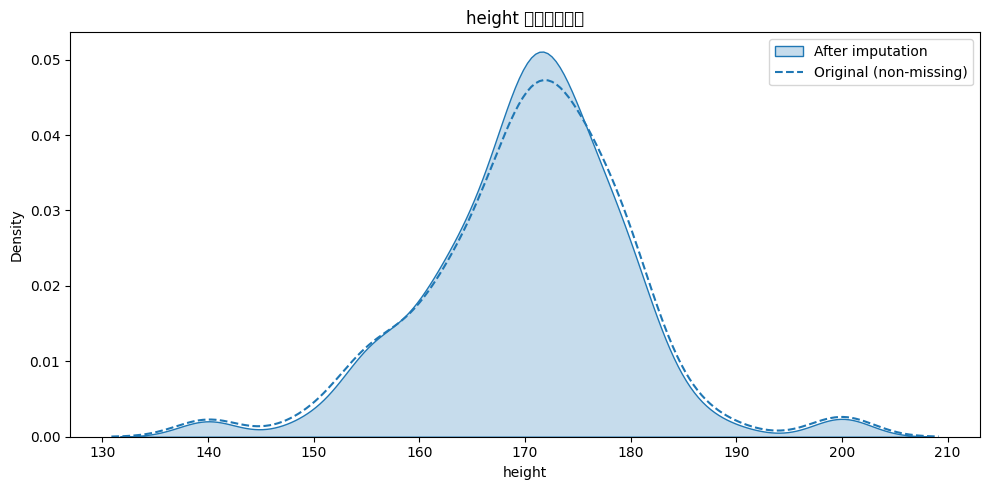

In [ ]:
for target, predictors in num_predictor_dict.items():
    train_df_before = train_df.copy()
    print(f'正在處理: {target}')

    train_df, test_df = knn_impute(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())

    plot_imputation_distribution(
        df_before=train_df_before,
        df_after=train_df,
        target_col=target,
        title=f'{target} 補值前後分佈'
    )

# 3.4 分欄MICE(擇一)*最後305男+DT

<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35036 (\N{CJK U

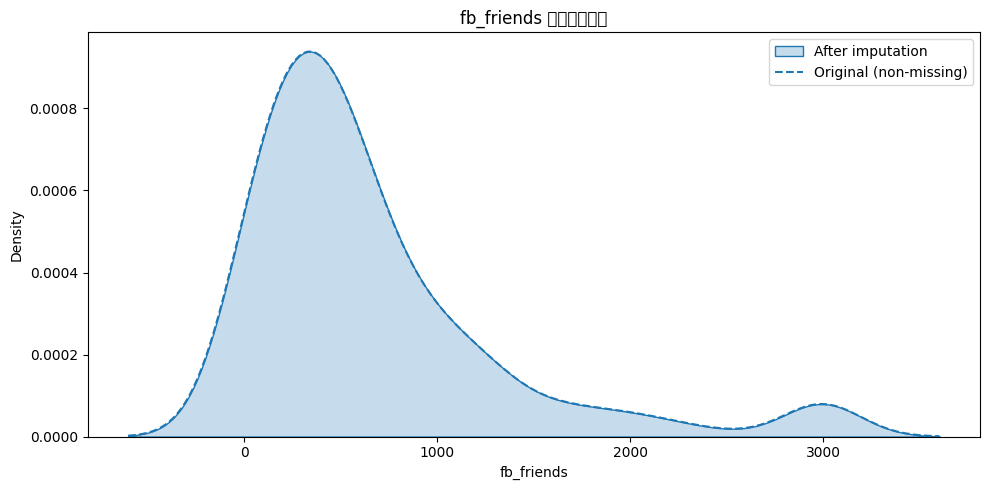

<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35036 (\N{CJK U

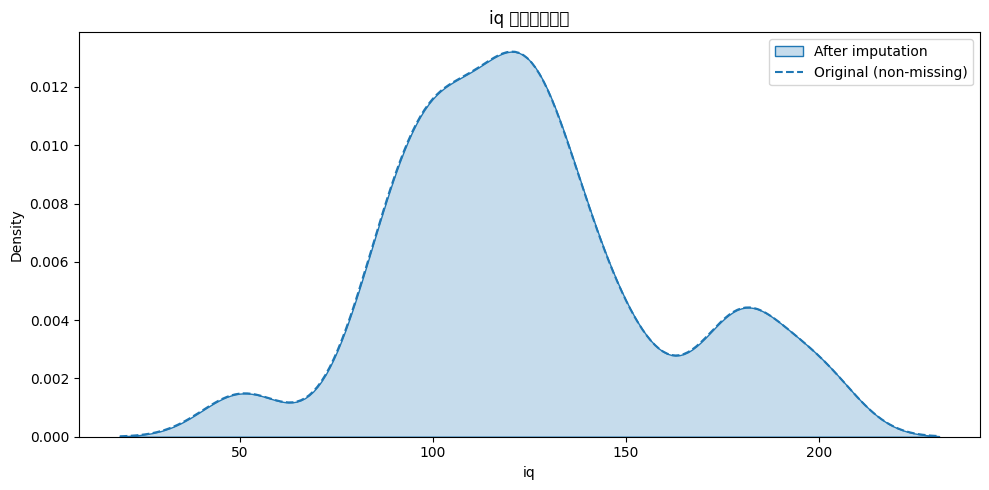

<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35036 (\N{CJK U

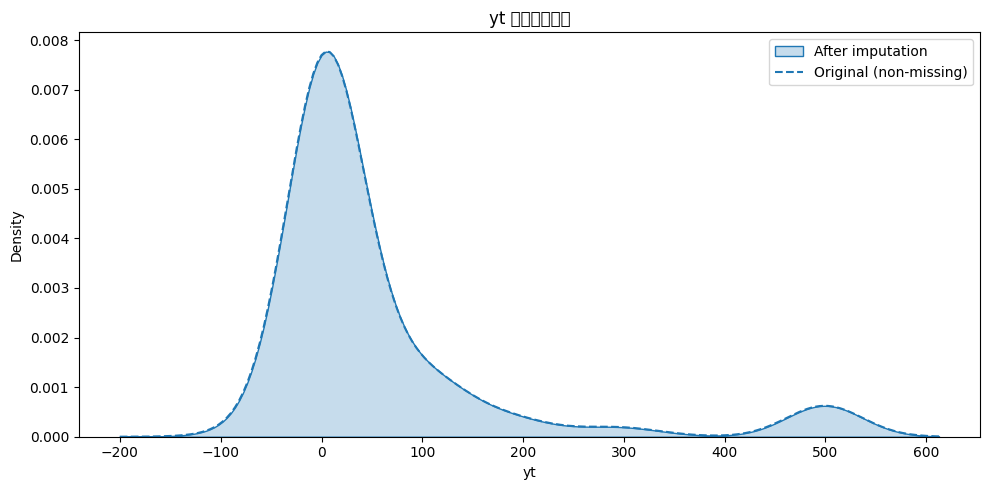

<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35036 (\N{CJK U

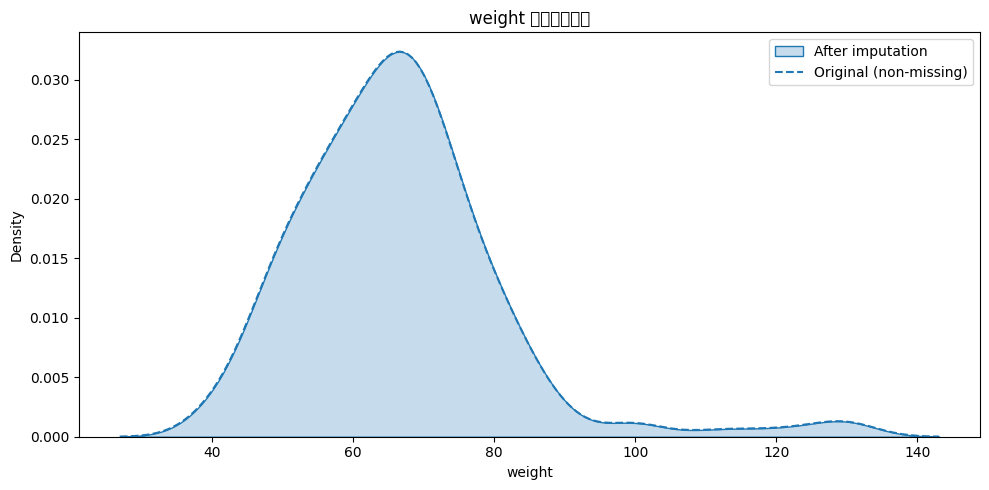

<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35036 (\N{CJK U

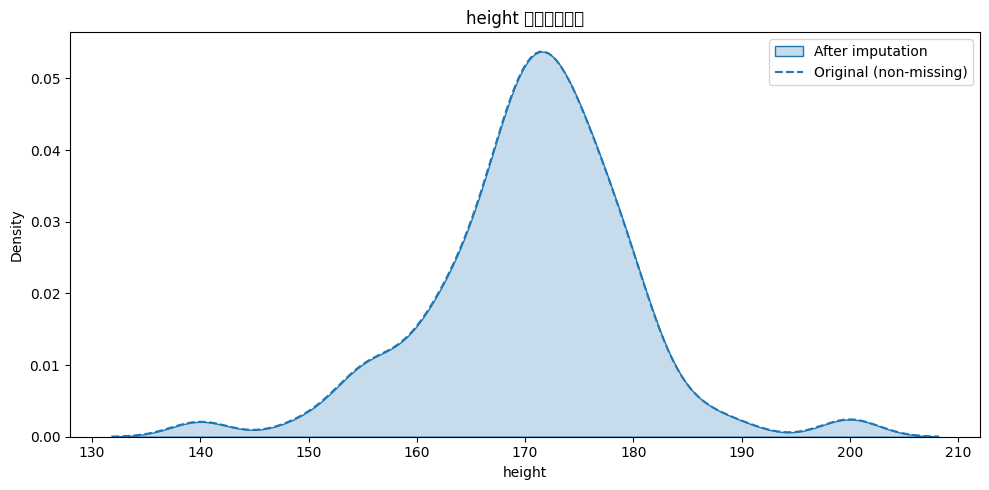

In [63]:
for target, predictors in num_predictor_dict.items():
    train_df_before = train_df.copy()
    train_df, imputer_mice = impute_mice_train(
        train_df=train_df,
        target_col=target,
        predictor_cols=predictors
    )
    test_df = impute_mice_test(
        test_df=test_df,                 # train_df 不用傳了
        target_col=target,
        predictor_cols=predictors,
        imputer_mice=imputer_mice
    )
    plot_imputation_distribution(
        df_before=train_df_before,
        df_after=train_df,
        target_col=target,
        title=f'{target} 補值前後分佈'
    )

# 3.4 MICE(擇一)

<ipython-input-2554-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2554-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2554-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2554-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2554-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2554-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

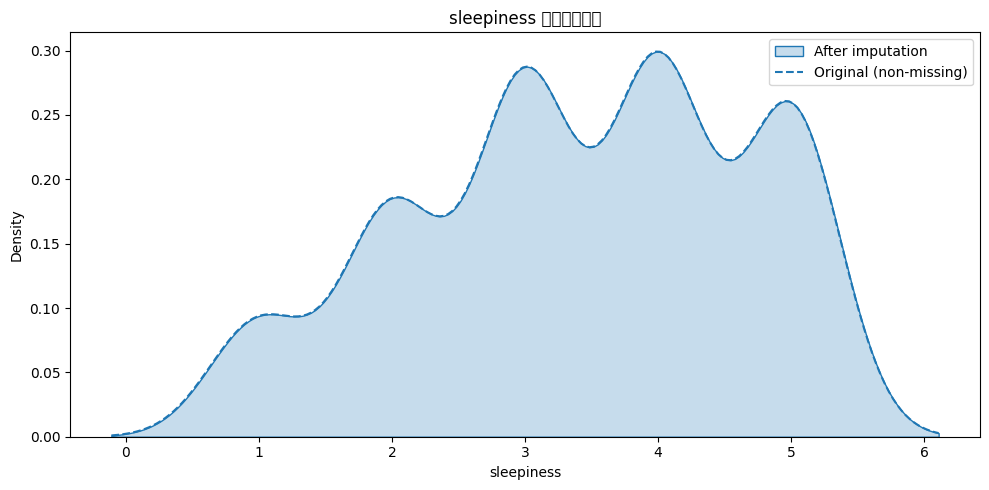

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.impute import IterativeImputer
train_df_before = train_df.copy()
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=50, random_state=42)

train_df[target_columns] = imputer.fit_transform(train_df[target_columns])
test_df[target_columns] = imputer.transform(test_df[target_columns])
plot_imputation_distribution(
        df_before=train_df_before,
        df_after=train_df,
        target_col=target,
        title=f'{target} 補值前後分佈'
    )

In [ ]:
test_df.isnull().sum()

gender                   426
phone_os                  96
height                     0
weight                     0
sleepiness                72
iq                         0
fb_friends                 0
yt                         0
is_outlier_fb_friends      0
is_outlier_yt              0
is_outlier_height          0
is_outlier_weight          0
is_outlier_iq              0
dtype: int64

In [ ]:
train_df.isnull().sum()

gender                    0
phone_os                 78
height                    0
weight                    0
sleepiness               91
iq                        0
fb_friends                0
yt                        0
is_outlier_fb_friends     0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
dtype: int64

# 3.4 MISSForest(擇一)

In [ ]:
pip install MissForest

In [ ]:
import pandas as pd
import numpy as np
from missforest import MissForest


categorical = [col for col in train_df.columns if col.startswith('is_outlier_')]
continuous = [col for col in train_df.columns if col not in categorical]

# 將類別型欄位轉為整數型（避免 float64 問題）
for col in categorical:
    train_df[col] = train_df[col].astype('Int64')  # 使用可空整數型
    test_df[col] = test_df[col].astype('Int64')

# 將連續型欄位統一為 float64
for col in continuous:
    train_df[col] = train_df[col].astype('float64')
    test_df[col] = test_df[col].astype('float64')

# 初始化 MissForest
mf = MissForest(max_iter=10, categorical=categorical)

# 訓練集填補
if train_df.isnull().sum().sum() > 0:
    train_imputed = mf.fit_transform(train_df)
    train_df = pd.DataFrame(train_imputed, columns=train_df.columns)
    print("訓練集填補完成")
else:
    print("訓練集無缺失值")

# 測試集填補
if test_df.isnull().sum().sum() > 0:
    test_imputed = mf.transform(test_df)
    test_df = pd.DataFrame(test_imputed, columns=test_df.columns)
    print("測試集填補完成")
else:
    print("測試集無缺失值")

# 確保類別型欄位保持整數型
for col in categorical:
    train_df[col] = train_df[col].round().astype('Int64')
    test_df[col] = test_df[col].round().astype('Int64')

# 檢查結果
print("\n最終訓練集缺失值數量:", train_df.isnull().sum().sum())
print("最終測試集缺失值數量:", test_df.isnull().sum().sum())

/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
100%|██████████| 10/10 [00:13<00:00,  1.39s/it]
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estimator fitting proces

訓練集填補完成


100%|██████████| 10/10 [00:00<00:00, 27.40it/s]

測試集填補完成

最終訓練集缺失值數量: 0
最終測試集缺失值數量: 0


# 3.4 RF-RFE(擇一)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

# 定義 RF-RFE 特徵選擇函數
def rf_rfe_feature_selection(X_obs, y_obs, n_features_to_select=None):
    rf = RandomForestRegressor(n_estimators=100, random_state=0)
    selector = RFE(estimator=rf, n_features_to_select=n_features_to_select, step=1)
    selector = selector.fit(X_obs, y_obs)
    return selector.support_

# 主函數 - RF-RFE 插補函數
def rf_rfe_imputation(X, gamma=1e-3, max_iter=10):
    X_imp = X.copy()
    missing_cols = X.isnull().sum().sort_values().index
    imp_mean = SimpleImputer(strategy='mean')
    X_imp.iloc[:, :] = imp_mean.fit_transform(X_imp)

    for iteration in range(max_iter):
        X_old = X_imp.copy()
        for col in missing_cols:
            obs_idx = X[col].notnull()
            mis_idx = X[col].isnull()
            if mis_idx.sum() == 0:
                continue
            X_obs = X_imp.loc[obs_idx].drop(columns=[col])
            y_obs = X_imp.loc[obs_idx, col]
            X_mis = X_imp.loc[mis_idx].drop(columns=[col])
            selected_features_mask = rf_rfe_feature_selection(X_obs, y_obs)
            X_obs_selected = X_obs.loc[:, selected_features_mask]
            X_mis_selected = X_mis.loc[:, selected_features_mask]
            rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
            rf_model.fit(X_obs_selected, y_obs)
            X_imp.loc[mis_idx, col] = rf_model.predict(X_mis_selected)
        diff = np.linalg.norm(X_imp - X_old) / np.linalg.norm(X_old)
        if diff < gamma:
            break
    return X_imp

# 先插補train再合併train和test插補test
def impute_train_then_combined(train_df, test_df, target_col, gamma=1e-4, max_iter=10):
    train_df_imputed = rf_rfe_imputation(train_df, gamma, max_iter)
    combined_df = pd.concat([train_df_imputed, test_df], keys=['train', 'test'])
    combined_df_imputed = rf_rfe_imputation(combined_df, gamma, max_iter)
    train_df_final = combined_df_imputed.loc['train']
    test_df_final = combined_df_imputed.loc['test']
    return train_df_final, test_df_final


In [ ]:
train_with_copy=train_df.copy()
train_df, test_df = impute_train_then_combined(train_df, test_df, target_col='gender', gamma=1e-4, max_iter=10)
plot_imputation_distribution(
        df_before=train_with_copy,
        df_after=train_df,
        target_col=target,
        title=f'{target} 補值前後分佈'
    )

# 3.5 查看分布

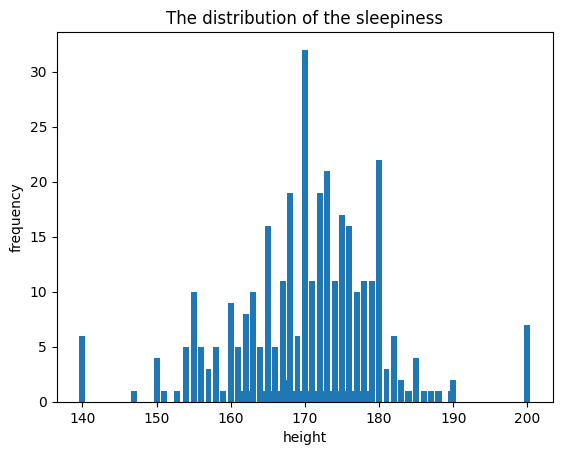

In [91]:
sleepiness_values = train_df['height'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = train_df['height'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('height')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the sleepiness')
plt.show()

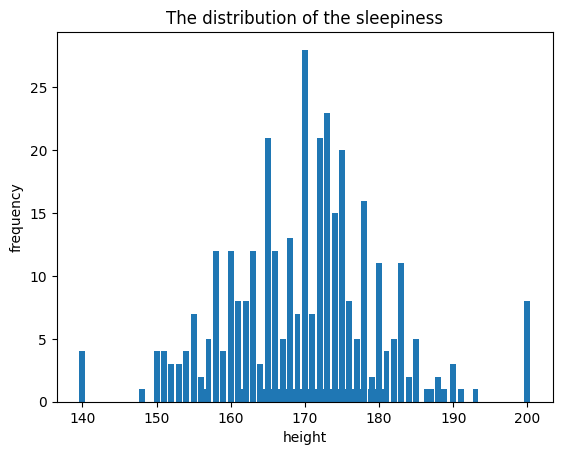

In [92]:
sleepiness_values = test_df['height'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = test_df['height'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('height')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the sleepiness')
plt.show()

<Axes: >

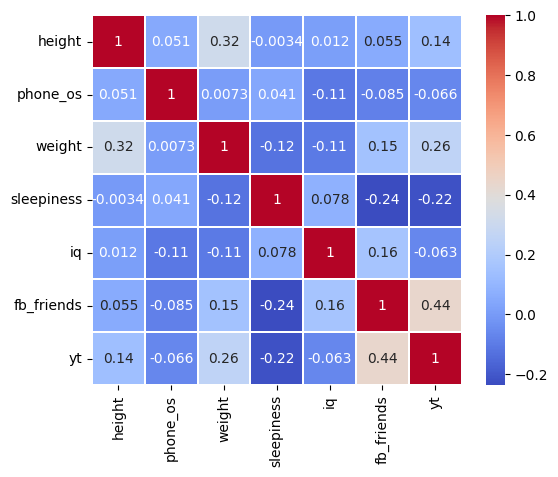

In [93]:
# 數值欄位相關性
#負擔（負擔相關）：表示兩個變數的逆轉變化（例如性別增加，身高減少）。
#正數（正相關）：表示兩個變化數同向變化（例如身高增加，體重增加）。
sns.heatmap(train_df[['height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0,cmap="coolwarm" , square=True,linecolor='white', annot=True)

<Axes: >

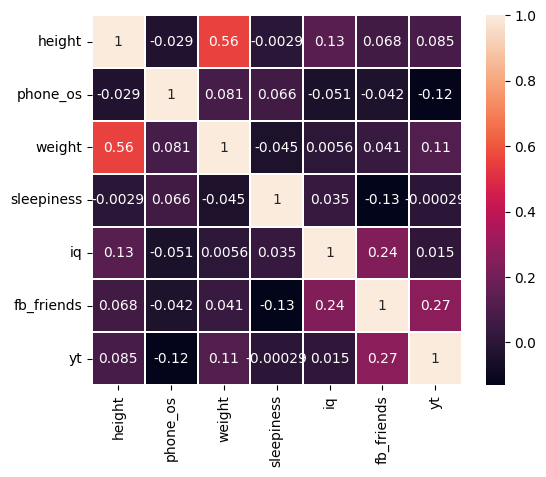

In [94]:
sns.heatmap(test_df[['height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)

# **4. 編碼文字欄位(self_intro)**


In [95]:
train_df['gender'] = geder_train_backup
test_df['gender'] = geder_test_backup

<h2>4.1 TF-IDF

In [96]:
# 保留備份
self_train_backup = self_train_backup.reset_index(drop=True)
self_test_backup = self_test_backup.reset_index(drop=True)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# 再做對應就不會出錯
train_df['self_intro'] = self_train_backup
test_df['self_intro'] = self_test_backup

In [97]:
train_df

phone_os  height  weight  sleepiness          iq   fb_friends         yt  \
0           0   154.0    43.0           3  118.434843   583.000000   0.000000   
1           0   156.0    47.0           2  130.000000   958.171445   3.500000   
2           1   170.0    61.0           2   90.000000   540.000000  18.837224   
3           0   170.0    62.0           4  100.000000   331.917017   5.000000   
4           1   158.0    67.0           3  128.000000   320.000000   1.200000   
..        ...     ...     ...         ...         ...          ...        ...   
418         1   166.0    66.0           4   90.000000  1000.000000   1.000000   
419         1   176.0    65.0           4   87.000000  1300.000000   2.000000   
420         0   174.0    72.0           2  150.950407  2000.000000   9.000000   
421         0   167.0    50.0           3  180.000000   483.000000  10.000000   
422         1   173.0    68.0           3   66.000000   300.000000  10.000000   

     is_outlier_fb_friends  is_outlier_yt  is_outlier_height  \
0                        0              0                  0   
1                        1              0                  0   
2                        0              1                  0   
3                        1              0                  0   
4                        0              0                  0   
..                     ...            ...                ...   
418                      0              0                  0   
419                      0              0                  0   
420                      1              0                  0   
421                      0              0                  0   
422                      0              0                  0   

     is_outlier_weight  is_outlier_iq  gender                     self_intro  
0                    0              1       2                      Beautiful  
1                    0              0       2  Enjoying being who I'm notsss  
2                    0              0       1         Practice Makes perfect  
3                    0              0       1                Straightforward  
4                    0              0       2                       Humorous  
..                 ...            ...     ...                            ...  
418                  0              0       1      I hope i am a super hero.  
419                  0              0       1                            NaN  
420                  0              1       1                            NaN  
421                  0              0       2                            NaN  
422                  0              0       1                   super 666666  

[423 rows x 14 columns]

In [98]:
test_df

phone_os  height     weight  sleepiness          iq   fb_friends  \
0           0   200.0  100.00000           1   87.000000    87.000000   
1           0   175.0   80.00000           3  155.145153  2000.000000   
2           0   155.0   45.00000           3  150.000000  1589.784091   
3           0   173.0   85.00000           4  123.475571  1394.482890   
4           1   164.0   57.00000           4  130.000000   505.000000   
..        ...     ...        ...         ...         ...          ...   
421         0   160.0   70.00000           4  137.246138   500.000000   
422         1   162.0   54.00000           3  180.000000   462.000000   
423         0   173.0   66.00000           2  135.000000   102.000000   
424         0   165.0   53.00000           3  110.000000   507.000000   
425         0   182.0   79.54411           4  100.000000    50.000000   

             yt  is_outlier_fb_friends  is_outlier_yt  is_outlier_height  \
0     87.000000                      0              1                  1   
1    273.531115                      1              1                  0   
2      9.000000                      1              0                  0   
3     15.000000                      1              0                  0   
4      2.000000                      0              0                  0   
..          ...                    ...            ...                ...   
421    5.000000                      0              0                  0   
422    5.000000                      0              0                  0   
423   11.100000                      0              0                  0   
424  416.000000                      0              1                  0   
425    1.000000                      0              0                  0   

     is_outlier_weight  is_outlier_iq  gender                  self_intro  
0                    1              0     NaN                        GOod  
1                    0              1     NaN                   Easygoing  
2                    0              0     NaN                         NaN  
3                    0              1     NaN                         NaN  
4                    0              0     NaN                   I'm smart  
..                 ...            ...     ...                         ...  
421                  0              1     NaN                I am a girl.  
422                  0              0     NaN                         NaN  
423                  0              0     NaN  I like to play basketball.  
424                  0              0     NaN                        Good  
425                  1              0     NaN          Long live Czechia!  

[426 rows x 14 columns]

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. 補空字串
train_df['self_intro'] = train_df['self_intro'].fillna("")

# 2. 向量轉換
vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = vectorizer.fit_transform(train_df['self_intro'])

# 3. 建立 DataFrame 並保留原 index
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=train_df.index
)

# 4. 合併
train_df = pd.concat([train_df.drop(columns=['self_intro']), tfidf_df], axis=1)


In [100]:
train_df

phone_os  height  weight  sleepiness          iq   fb_friends         yt  \
0           0   154.0    43.0           3  118.434843   583.000000   0.000000   
1           0   156.0    47.0           2  130.000000   958.171445   3.500000   
2           1   170.0    61.0           2   90.000000   540.000000  18.837224   
3           0   170.0    62.0           4  100.000000   331.917017   5.000000   
4           1   158.0    67.0           3  128.000000   320.000000   1.200000   
..        ...     ...     ...         ...         ...          ...        ...   
418         1   166.0    66.0           4   90.000000  1000.000000   1.000000   
419         1   176.0    65.0           4   87.000000  1300.000000   2.000000   
420         0   174.0    72.0           2  150.950407  2000.000000   9.000000   
421         0   167.0    50.0           3  180.000000   483.000000  10.000000   
422         1   173.0    68.0           3   66.000000   300.000000  10.000000   

     is_outlier_fb_friends  is_outlier_yt  is_outlier_height  ...  want  \
0                        0              0                  0  ...   0.0   
1                        1              0                  0  ...   0.0   
2                        0              1                  0  ...   0.0   
3                        1              0                  0  ...   0.0   
4                        0              0                  0  ...   0.0   
..                     ...            ...                ...  ...   ...   
418                      0              0                  0  ...   0.0   
419                      0              0                  0  ...   0.0   
420                      1              0                  0  ...   0.0   
421                      0              0                  0  ...   0.0   
422                      0              0                  0  ...   0.0   

          who  wise  with  without  work  world   xd  you  zzzz  
0    0.000000   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
1    0.527714   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
2    0.000000   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
3    0.000000   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
4    0.000000   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
..        ...   ...   ...      ...   ...    ...  ...  ...   ...  
418  0.000000   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
419  0.000000   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
420  0.000000   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
421  0.000000   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
422  0.000000   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  

[423 rows x 113 columns]

In [101]:
# 1. 填補空值（防止 NaN 導致 TF-IDF 出錯）
test_df['self_intro'] = test_df['self_intro'].fillna("")

# 2. 套用已訓練好的 vectorizer（⚠️ 不能再用 fit_transform）
X_test_tfidf = vectorizer.transform(test_df['self_intro'])

# 3. 轉成 DataFrame（⚠️ index 要對齊）
tfidf_test_df = pd.DataFrame(
    X_test_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=test_df.index
)

# 4. 合併進 test_df（移除原本的 self_intro）
test_df = pd.concat([test_df.drop(columns=['self_intro']), tfidf_test_df], axis=1)



In [102]:
test_df

phone_os  height     weight  sleepiness          iq   fb_friends  \
0           0   200.0  100.00000           1   87.000000    87.000000   
1           0   175.0   80.00000           3  155.145153  2000.000000   
2           0   155.0   45.00000           3  150.000000  1589.784091   
3           0   173.0   85.00000           4  123.475571  1394.482890   
4           1   164.0   57.00000           4  130.000000   505.000000   
..        ...     ...        ...         ...         ...          ...   
421         0   160.0   70.00000           4  137.246138   500.000000   
422         1   162.0   54.00000           3  180.000000   462.000000   
423         0   173.0   66.00000           2  135.000000   102.000000   
424         0   165.0   53.00000           3  110.000000   507.000000   
425         0   182.0   79.54411           4  100.000000    50.000000   

             yt  is_outlier_fb_friends  is_outlier_yt  is_outlier_height  ...  \
0     87.000000                      0              1                  1  ...   
1    273.531115                      1              1                  0  ...   
2      9.000000                      1              0                  0  ...   
3     15.000000                      1              0                  0  ...   
4      2.000000                      0              0                  0  ...   
..          ...                    ...            ...                ...  ...   
421    5.000000                      0              0                  0  ...   
422    5.000000                      0              0                  0  ...   
423   11.100000                      0              0                  0  ...   
424  416.000000                      0              1                  0  ...   
425    1.000000                      0              0                  0  ...   

     want  who  wise  with  without  work  world   xd  you  zzzz  
0     0.0  0.0   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
1     0.0  0.0   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
2     0.0  0.0   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
3     0.0  0.0   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
4     0.0  0.0   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
..    ...  ...   ...   ...      ...   ...    ...  ...  ...   ...  
421   0.0  0.0   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
422   0.0  0.0   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
423   0.0  0.0   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
424   0.0  0.0   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  
425   0.0  0.0   0.0   0.0      0.0   0.0    0.0  0.0  0.0   0.0  

[426 rows x 113 columns]

#  **5. 特徵選取**

## 5.1 特徵選擇

In [103]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

selected_cols = ['gender', 'phone_os', 'height', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']
train_df_fs = train_df[selected_cols]
test_df_fs = test_df[selected_cols]

print(f"資料集筆數: {train_df_fs.shape[0]}, 特徵數量: {train_df_fs.shape[1]-1}")

資料集筆數: 423, 特徵數量: 7


### 5.1.1 Embedded  method 嵌入式

#### 使用 RF 評估特徵

In [104]:
def remove_rows_with_extreme_values(X, threshold=1e10):
    X = X.copy()
    mask = (X > threshold) | (X < -threshold)
    rows_with_extreme = mask.any(axis=1)
    num_to_drop = rows_with_extreme.sum()
    print(f"將刪除 {num_to_drop} 筆含有極端值的資料列。")
    return X[~rows_with_extreme]

train_df_fs = remove_rows_with_extreme_values(train_df_fs)

將刪除 0 筆含有極端值的資料列。


In [105]:
# 將特徵與目標分開
X = train_df_fs.drop('gender', axis=1)   # 特徵矩陣
y = train_df_fs['gender']         # 目標變數

# 將資料集切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"訓練資料筆數: {X_train.shape[0]}, 測試資料筆數: {X_test.shape[0]}")

訓練資料筆數: 317, 測試資料筆數: 106


In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def evaluate_top_n_features(X_train, X_test, y_train, y_test, max_features=5):
    results = []

    # 訓練 baseline 模型並計算全特徵的重要性
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    importances = rf_model.feature_importances_
    feature_names = X_train.columns.tolist()
    feat_imp_pairs = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

    print("所有特徵的重要性排序：")
    for name, imp in feat_imp_pairs:
        print(f"{name}: {imp:.4f}")

    # 針對最重要特徵分別訓練模型
    for n in range(1, max_features + 1):
        selected_features = [f for f, imp in feat_imp_pairs[:n]]
        X_train_sel = X_train[selected_features]
        X_test_sel = X_test[selected_features]

        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train_sel, y_train)
        y_pred = model.predict(X_test_sel)
        acc = accuracy_score(y_test, y_pred)

        results.append({
            "num_features": n,
            "features": selected_features,
            "accuracy": acc
        })

    return results


In [107]:
results = evaluate_top_n_features(X_train, X_test, y_train, y_test, max_features=5)

print("\n各特徵數的準確率比較：")
for r in results:
    print(f"{r['num_features']} 個特徵 → Accuracy: {r['accuracy']:.3f}, 特徵: {r['features']}")


所有特徵的重要性排序：
height: 0.4036
weight: 0.1990
yt: 0.1109
fb_friends: 0.1102
iq: 0.1052
sleepiness: 0.0497
phone_os: 0.0214

各特徵數的準確率比較：
1 個特徵 → Accuracy: 0.821, 特徵: ['height']
2 個特徵 → Accuracy: 0.868, 特徵: ['height', 'weight']
3 個特徵 → Accuracy: 0.830, 特徵: ['height', 'weight', 'yt']
4 個特徵 → Accuracy: 0.802, 特徵: ['height', 'weight', 'yt', 'fb_friends']
5 個特徵 → Accuracy: 0.830, 特徵: ['height', 'weight', 'yt', 'fb_friends', 'iq']


#### XGBoost 進行特徵重要性分析

In [108]:
pip install xgboost shap matplotlib pandas scikit-learn

In [109]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


X = train_df_fs.drop('gender', axis=1).astype('float64')
y = train_df_fs['gender'].replace({1: 0, 2: 1})

X_encoded = X.copy()
for col in ['phone_os', 'sleepiness']:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X, y)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:15:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

<ipython-input-110-67a054050edf>:13: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-110-67a054050edf>:13: UserWarning: Glyph 35338 (\N{CJK UNIFIED IDEOGRAPH-8A0A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-110-67a054050edf>:13: UserWarning: Glyph 22686 (\N{CJK UNIFIED IDEOGRAPH-589E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-110-67a054050edf>:13: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-110-67a054050edf>:13: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-110-67a054050edf>:13: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-110-67a054050edf>:13: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) miss

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24501 (\N{CJK UNIFIED IDEOGRAPH-5FB5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas

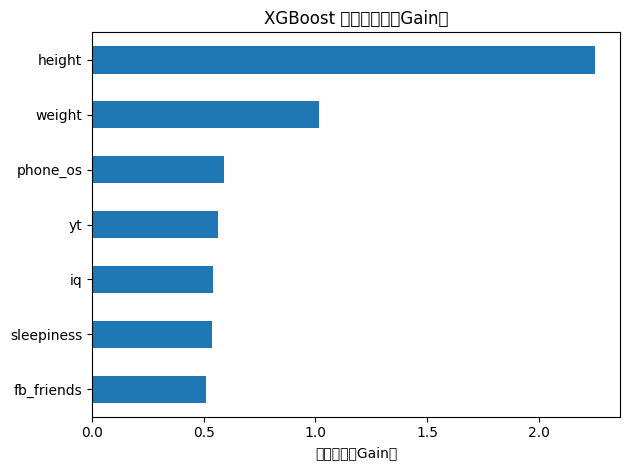

In [110]:
booster = model.get_booster()
importance_gain = booster.get_score(importance_type='gain')

# 轉成 DataFrame
importance_df = pd.DataFrame.from_dict(importance_gain, orient='index', columns=['Gain'])
importance_df = importance_df.sort_values(by='Gain', ascending=True)

# 視覺化
plt.figure(figsize=(8, 6))
importance_df.plot(kind='barh', legend=False)
plt.title('XGBoost 特徵重要性（Gain）')
plt.xlabel('資訊增益（Gain）')
plt.tight_layout()
plt.show()

### 5.1.2 Wrapper method 包裝式

#### 使用 RFE 進行特徵選取

In [111]:
pip install pandas scikit-learn matplotlib

In [112]:
train_df_fs

gender  phone_os  height  weight  sleepiness          iq   fb_friends  \
0         2         0   154.0    43.0           3  118.434843   583.000000   
1         2         0   156.0    47.0           2  130.000000   958.171445   
2         1         1   170.0    61.0           2   90.000000   540.000000   
3         1         0   170.0    62.0           4  100.000000   331.917017   
4         2         1   158.0    67.0           3  128.000000   320.000000   
..      ...       ...     ...     ...         ...         ...          ...   
418       1         1   166.0    66.0           4   90.000000  1000.000000   
419       1         1   176.0    65.0           4   87.000000  1300.000000   
420       1         0   174.0    72.0           2  150.950407  2000.000000   
421       2         0   167.0    50.0           3  180.000000   483.000000   
422       1         1   173.0    68.0           3   66.000000   300.000000   

            yt  
0     0.000000  
1     3.500000  
2    18.837224  
3     5.000000  
4     1.200000  
..         ...  
418   1.000000  
419   2.000000  
420   9.000000  
421  10.000000  
422  10.000000  

[423 rows x 8 columns]

In [113]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# 分離特徵與標籤
X = train_df_fs.drop('gender', axis=1)
y = train_df_fs['gender']

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [114]:
# 建立模型
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 設定要選幾個特徵（例如 5 個）
rfe = RFE(estimator=model, n_features_to_select=5)

# 套用 RFE
X_rfe = rfe.fit_transform(X_scaled, y)

# 顯示被選中的特徵
selected_features = pd.DataFrame({
    'Feature': X.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
})

print(selected_features.sort_values(by='Ranking'))

      Feature  Selected  Ranking
1      height      True        1
2      weight      True        1
5  fb_friends      True        1
4          iq      True        1
6          yt      True        1
3  sleepiness     False        2
0    phone_os     False        3


In [115]:
from sklearn.model_selection import cross_val_score

# 切分資料
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# 再次訓練模型（用選出來的特徵）
model.fit(X_train, y_train)

scores = cross_val_score(model, X_rfe, y, cv=10, scoring='accuracy')
print(f'平均準確率：{scores.mean():.4f}')
print(f'標準差：{scores.std():.4f}')


平均準確率：0.8702
標準差：0.0445


### 5.1.3 Filter method

#### 卡方檢定

In [116]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [117]:
# 目標變數為性別
y = train_df_fs['gender'].map({1: 0, 2: 1})

# 特徵資料：排除 gender 欄
X = train_df_fs.drop(columns=['gender'])

# 特徵縮放（卡方檢定需要非負）
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 計算卡方統計量與 p 值
chi2_scores, p_values = chi2(X_scaled, y)

# 整理成 DataFrame
chi2_result = pd.DataFrame({
    'Feature': X.columns,
    'Chi2_Score': chi2_scores,
    'p_value': p_values
})

# 根據分數排序
chi2_result = chi2_result.sort_values(by='Chi2_Score', ascending=False)
print(chi2_result)


      Feature  Chi2_Score   p_value
1      height    3.819971  0.050645
2      weight    3.618038  0.057156
4          iq    0.427623  0.513158
0    phone_os    0.223486  0.636397
5  fb_friends    0.131871  0.716500
3  sleepiness    0.074148  0.785391
6          yt    0.002309  0.961677


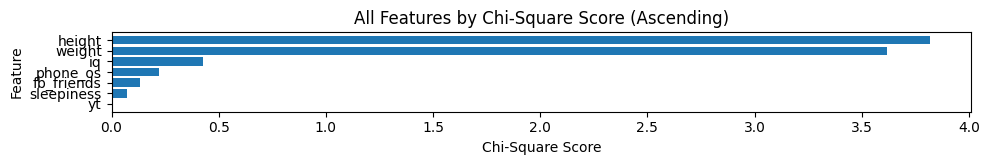

In [118]:
# 依照 Chi2 分數由小排到大
chi2_result_sorted = chi2_result.sort_values(by='Chi2_Score', ascending=True)

# 繪圖：畫出所有特徵
plt.figure(figsize=(10, len(chi2_result_sorted) * 0.25))  # 動態調整高度
plt.barh(chi2_result_sorted['Feature'], chi2_result_sorted['Chi2_Score'])
plt.xlabel('Chi-Square Score')
plt.ylabel('Feature')
plt.title('All Features by Chi-Square Score (Ascending)')
plt.tight_layout()
plt.show()


#### ANOVA

In [119]:
from sklearn.feature_selection import f_classif

# 假設你的資料如下：
X = train_df_fs.drop(columns=['gender'])
y = train_df_fs['gender']

# 計算 F 值與 p-value
f_values, p_values = f_classif(X, y)

# 建立結果表格
anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F_value': f_values,
    'p_value': p_values
}).sort_values(by='F_value', ascending=False)

print(anova_df)


      Feature     F_value       p_value
1      height  103.639211  6.581549e-22
2      weight   44.361729  8.553164e-11
4          iq    3.975012  4.682485e-02
0    phone_os    1.212694  2.714284e-01
5  fb_friends    0.575272  4.485958e-01
3  sleepiness    0.480074  4.887708e-01
6          yt    0.012408  9.113603e-01


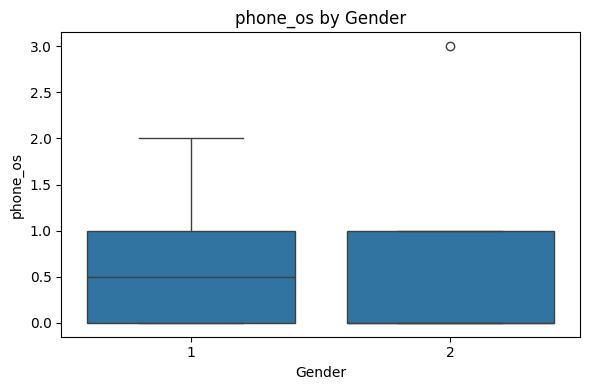

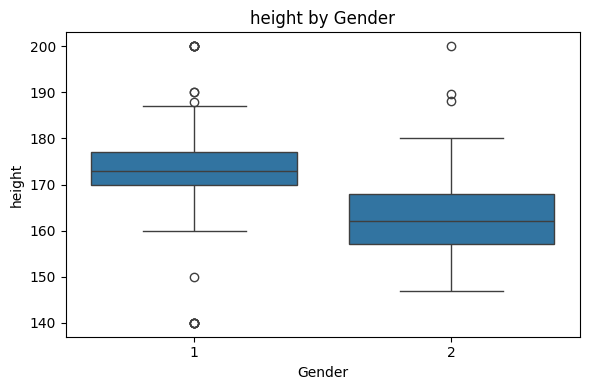

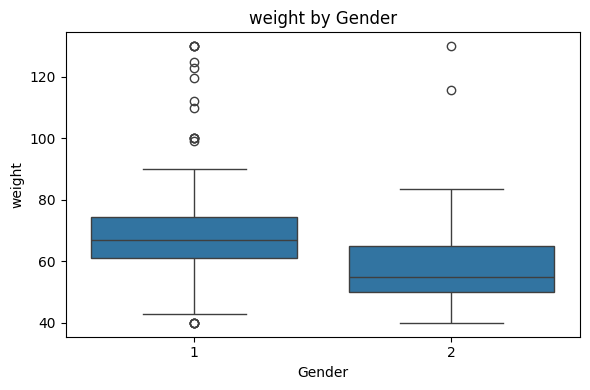

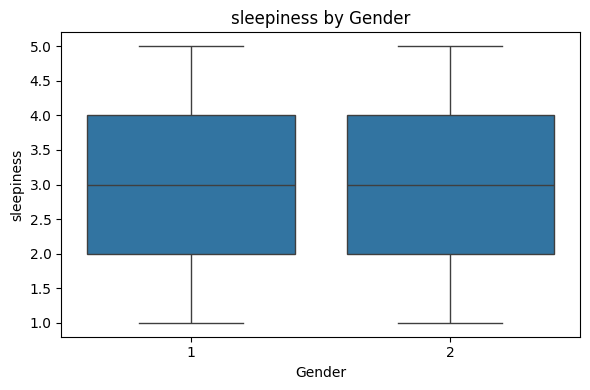

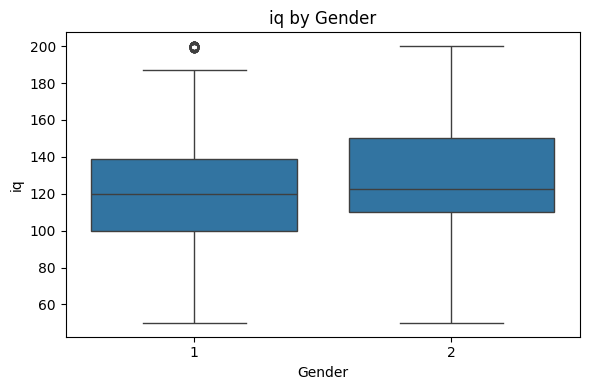

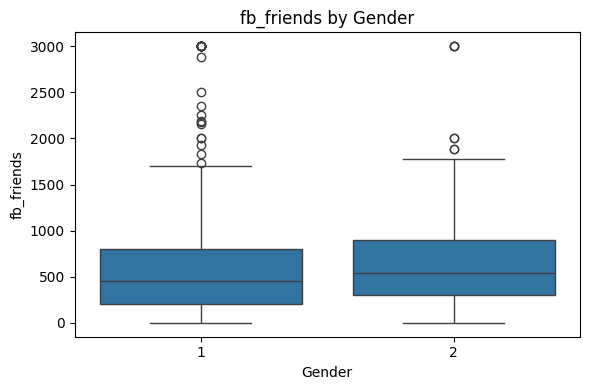

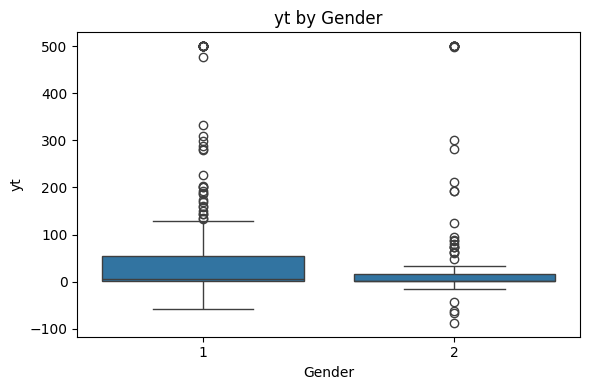

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y, y=train_df_fs[col])
    plt.title(f'{col} by Gender')
    plt.xlabel("Gender")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


### 5.1.4 SHAP（SHapley Additive exPlanations）

In [121]:
# import shap
# explainer = shap.Explainer(model, X)
# shap_values = explainer(X)

# # SHAP Summary Bar Plot（平均貢獻值）
# shap.plots.bar(shap_values, max_display=10)

# # SHAP Summary Dot Plot（貢獻值分布圖）
# shap.summary_plot(shap_values.values, X, feature_names=X.columns)

## 5.2 特徵萃取

### 5.2.1 數值型欄位萃取

In [122]:
pip install featuretools

In [123]:
import featuretools as ft
from xgboost import XGBClassifier

In [124]:
def generate_feature_matrix(df, drop_cols, feature_defs=None, is_train=True):
  df_ft = df.drop(columns=drop_cols)

  # 建立 EntitySet
  es = ft.EntitySet(id='data_set')
  es.add_dataframe(dataframe_name='users', dataframe=df_ft, index='id')

  if is_train:
      # 訓練資料，使用 dfs 產生特徵與定義
      feature_matrix, feature_defs_out = ft.dfs(
          entityset=es,
          target_dataframe_name='users',
          trans_primitives=[
              'add_numeric',
              'subtract_numeric',
              'multiply_numeric',
              'divide_numeric',
              'percentile',
          ],
          max_depth=1
      )
  else:
      # 測試資料，使用訓練階段的特徵定義
      feature_matrix = ft.calculate_feature_matrix(
          entityset=es,
          features=feature_defs
      )
      feature_defs_out = None  # 測試階段不需要產出新的定義

  # 合併回原始資料
  df_combined = pd.merge(df, feature_matrix, on='id', how='left')

  return df_combined, feature_defs_out

In [125]:
exclude_cols = ['phone_os','gender','sleepiness']

train_df_fs['id'] = id_train_backup
test_df_fs['id'] = id_test_backup

# 做特徵工程
train_df_combined, feature_defs = generate_feature_matrix(train_df_fs, drop_cols=exclude_cols, is_train=True)
test_df_combined, _ = generate_feature_matrix(test_df_fs, drop_cols=exclude_cols, feature_defs=feature_defs, is_train=False)
train_df_combined

gender  phone_os  height_x  weight_x  sleepiness        iq_x  \
0         2         0     154.0      43.0           3  118.434843   
1         2         0     156.0      47.0           2  130.000000   
2         1         1     170.0      61.0           2   90.000000   
3         1         0     170.0      62.0           4  100.000000   
4         2         1     158.0      67.0           3  128.000000   
..      ...       ...       ...       ...         ...         ...   
418       1         1     166.0      66.0           4   90.000000   
419       1         1     176.0      65.0           4   87.000000   
420       1         0     174.0      72.0           2  150.950407   
421       2         0     167.0      50.0           3  180.000000   
422       1         1     173.0      68.0           3   66.000000   

     fb_friends_x       yt_x   id  height_y  ...  fb_friends - height  \
0      583.000000   0.000000    1     154.0  ...           429.000000   
1      958.171445   3.500000    2     156.0  ...           802.171445   
2      540.000000  18.837224    3     170.0  ...           370.000000   
3      331.917017   5.000000    4     170.0  ...           161.917017   
4      320.000000   1.200000    5     158.0  ...           162.000000   
..            ...        ...  ...       ...  ...                  ...   
418   1000.000000   1.000000  419     166.0  ...           834.000000   
419   1300.000000   2.000000  420     176.0  ...          1124.000000   
420   2000.000000   9.000000  421     174.0  ...          1826.000000   
421    483.000000  10.000000  422     167.0  ...           316.000000   
422    300.000000  10.000000  423     173.0  ...           127.000000   

     fb_friends - iq  fb_friends - weight  fb_friends - yt  height - iq  \
0         464.565157           540.000000       583.000000    35.565157   
1         828.171445           911.171445       954.671445    26.000000   
2         450.000000           479.000000       521.162776    80.000000   
3         231.917017           269.917017       326.917017    70.000000   
4         192.000000           253.000000       318.800000    30.000000   
..               ...                  ...              ...          ...   
418       910.000000           934.000000       999.000000    76.000000   
419      1213.000000          1235.000000      1298.000000    89.000000   
420      1849.049593          1928.000000      1991.000000    23.049593   
421       303.000000           433.000000       473.000000   -13.000000   
422       234.000000           232.000000       290.000000   107.000000   

     height - weight  height - yt  iq - weight     iq - yt  weight - yt  
0              111.0   154.000000    75.434843  118.434843    43.000000  
1              109.0   152.500000    83.000000  126.500000    43.500000  
2              109.0   151.162776    29.000000   71.162776    42.162776  
3              108.0   165.000000    38.000000   95.000000    57.000000  
4               91.0   156.800000    61.000000  126.800000    65.800000  
..               ...          ...          ...         ...          ...  
418            100.0   165.000000    24.000000   89.000000    65.000000  
419            111.0   174.000000    22.000000   85.000000    63.000000  
420            102.0   165.000000    78.950407  141.950407    63.000000  
421            117.0   157.000000   130.000000  170.000000    40.000000  
422            105.0   163.000000    -2.000000   56.000000    58.000000  

[423 rows x 69 columns]

In [126]:
def clean_features(df, numeric_only=True):
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.fillna(df.median(numeric_only=numeric_only))
    df = df.clip(lower=-1e6, upper=1e6)
    return df

# 訓練集
X_train = train_df_combined.drop(columns=['id','gender'])
X_train = clean_features(X_train)

# 測試集
X_test = test_df_combined.drop(columns=['id','gender'])  # 假設測試集也有 'id' 和 'gender'
X_test = clean_features(X_test)
y = train_df_fs['gender'].map({1: 0, 2: 1})
# 建立並訓練模型
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y)

# 特徵重要性
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("Top 10 重要特徵：")
print(feature_importances.head(10))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:16:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Top 10 重要特徵：
height + weight        0.195894
yt / weight            0.047401
height_x               0.042069
fb_friends / iq        0.039950
height / weight        0.035680
fb_friends + height    0.034772
height + yt            0.033880
fb_friends / height    0.033209
fb_friends * iq        0.031921
height + iq            0.026621
dtype: float32


In [127]:
top_10_features = feature_importances.head(10).index.tolist()

# 將 top_10 特徵從 feature_matrix 擷取出來（包含 id 方便 merge）
train_top_features = pd.concat([train_df_combined['id'], X_train[top_10_features]], axis=1)
test_top_features = pd.concat([test_df_combined['id'], X_test[top_10_features]], axis=1)

In [128]:
train_df['id'] = id_train_backup
test_df['id'] = id_test_backup

# 加回到原始 train/test 資料表中
train_df = pd.merge(train_df, train_top_features, on='id', how='left')
test_df = pd.merge(test_df, test_top_features, on='id', how='left')

train_df_fs = pd.merge(train_df_fs, train_top_features, on='id', how='left')
test_df_fs = pd.merge(test_df_fs, test_top_features, on='id', how='left')

train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)

In [129]:
train_df

phone_os  height  weight  sleepiness          iq   fb_friends         yt  \
0           0   154.0    43.0           3  118.434843   583.000000   0.000000   
1           0   156.0    47.0           2  130.000000   958.171445   3.500000   
2           1   170.0    61.0           2   90.000000   540.000000  18.837224   
3           0   170.0    62.0           4  100.000000   331.917017   5.000000   
4           1   158.0    67.0           3  128.000000   320.000000   1.200000   
..        ...     ...     ...         ...         ...          ...        ...   
418         1   166.0    66.0           4   90.000000  1000.000000   1.000000   
419         1   176.0    65.0           4   87.000000  1300.000000   2.000000   
420         0   174.0    72.0           2  150.950407  2000.000000   9.000000   
421         0   167.0    50.0           3  180.000000   483.000000  10.000000   
422         1   173.0    68.0           3   66.000000   300.000000  10.000000   

     is_outlier_fb_friends  is_outlier_yt  is_outlier_height  ...  \
0                        0              0                  0  ...   
1                        1              0                  0  ...   
2                        0              1                  0  ...   
3                        1              0                  0  ...   
4                        0              0                  0  ...   
..                     ...            ...                ...  ...   
418                      0              0                  0  ...   
419                      0              0                  0  ...   
420                      1              0                  0  ...   
421                      0              0                  0  ...   
422                      0              0                  0  ...   

     height + weight  yt / weight  height_x  fb_friends / iq  height / weight  \
0              197.0     0.000000     154.0         4.922538         3.581395   
1              203.0     0.074468     156.0         7.370550         3.319149   
2              231.0     0.308807     170.0         6.000000         2.786885   
3              232.0     0.080645     170.0         3.319170         2.741935   
4              225.0     0.017910     158.0         2.500000         2.358209   
..               ...          ...       ...              ...              ...   
418            232.0     0.015152     166.0        11.111111         2.515152   
419            241.0     0.030769     176.0        14.942529         2.707692   
420            246.0     0.125000     174.0        13.249385         2.416667   
421            217.0     0.200000     167.0         2.683333         3.340000   
422            241.0     0.147059     173.0         4.545455         2.544118   

     fb_friends + height  height + yt  fb_friends / height  fb_friends * iq  \
0             737.000000   154.000000             3.785714     69047.513496   
1            1114.171445   159.500000             6.142125    124562.287827   
2             710.000000   188.837224             3.176471     48600.000000   
3             501.917017   175.000000             1.952453     33191.701745   
4             478.000000   159.200000             2.025316     40960.000000   
..                   ...          ...                  ...              ...   
418          1166.000000   167.000000             6.024096     90000.000000   
419          1476.000000   178.000000             7.386364    113100.000000   
420          2174.000000   183.000000            11.494253    301900.813331   
421           650.000000   177.000000             2.892216     86940.000000   
422           473.000000   183.000000             1.734104     19800.000000   

     height + iq  
0     272.434843  
1     286.000000  
2     260.000000  
3     270.000000  
4     286.000000  
..           ...  
418   256.000000  
419   263.000000  
420   324.950407  
421   347.000000  
422   239.000000  

[423 rows x 123 columns]

### 5.2.2 類別型欄位萃取

In [130]:
X_fe = train_df_fs[['phone_os', 'sleepiness']]

In [131]:
X_fe

phone_os  sleepiness
0           0           3
1           0           2
2           1           2
3           0           4
4           1           3
..        ...         ...
418         1           4
419         1           4
420         0           2
421         0           3
422         1           3

[423 rows x 2 columns]

In [132]:
print(train_df_fs['phone_os'].unique())

[0 1 2 3]


In [133]:
# 將兩個類別型欄位組合為一個新的交互特徵
train_fe = train_df_fs.copy()
train_fe['os_sleepiness'] = train_fe['phone_os'].astype(str) + "_" + train_fe['sleepiness'].astype(str)

# 如果 gender 是 1 = 女，2 = 男，你可以先二元化成 0/1 更直覺
train_fe['gender_binary'] =train_fe['gender'].replace({1: 0, 2: 1})

# 建立 target encoding 欄位：每種組合對應的性別平均值
train_fe['os_sleepiness_mean_gender'] = train_fe['os_sleepiness'].map(
    train_fe.groupby('os_sleepiness')['gender_binary'].mean()
)


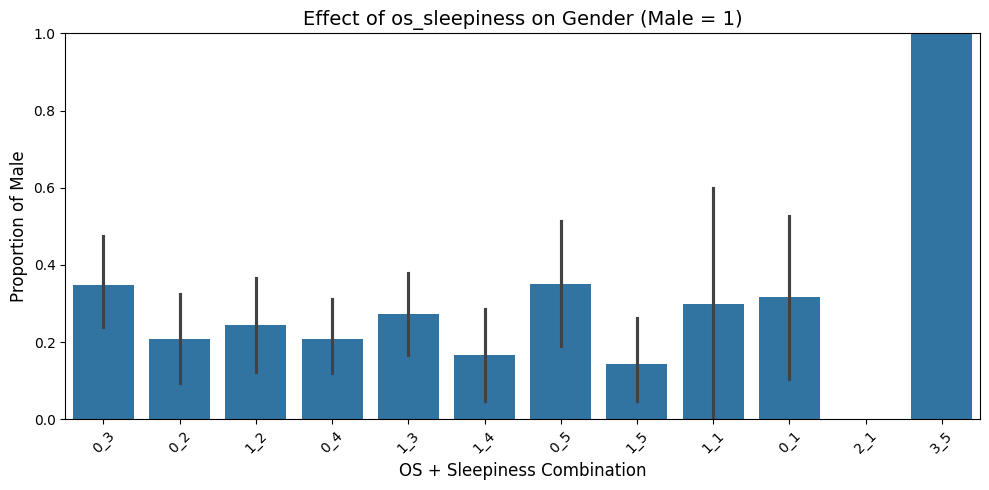

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x='os_sleepiness', y='gender_binary', data=train_fe, estimator='mean')
plt.title('Effect of os_sleepiness on Gender (Male = 1)', fontsize=14)
plt.ylabel('Proportion of Male', fontsize=12)
plt.xlabel('OS + Sleepiness Combination', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


### 5.2.3 TF-IDF型欄位萃取

In [135]:
drop_cols = ['phone_os', 'height', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt', 'is_outlier_fb_friends',	'is_outlier_yt', 'is_outlier_height',	'is_outlier_weight',	'is_outlier_iq']

train_df_fe = train_df.drop(columns=drop_cols)
test_df_fe = test_df.drop(columns=drop_cols)

print(f"資料集筆數: {train_df_fs.shape[0]}, 特徵數量: {train_df_fs.shape[1]-1}")


資料集筆數: 423, 特徵數量: 18


In [136]:
train_df_fe

gender  123  always        am  amazing   an  and  awesome   be  \
0         2  0.0     0.0  0.000000      0.0  0.0  0.0      0.0  0.0   
1         2  0.0     0.0  0.000000      0.0  0.0  0.0      0.0  0.0   
2         1  0.0     0.0  0.000000      0.0  0.0  0.0      0.0  0.0   
3         1  0.0     0.0  0.000000      0.0  0.0  0.0      0.0  0.0   
4         2  0.0     0.0  0.000000      0.0  0.0  0.0      0.0  0.0   
..      ...  ...     ...       ...      ...  ...  ...      ...  ...   
418       1  0.0     0.0  0.531458      0.0  0.0  0.0      0.0  0.0   
419       1  0.0     0.0  0.000000      0.0  0.0  0.0      0.0  0.0   
420       1  0.0     0.0  0.000000      0.0  0.0  0.0      0.0  0.0   
421       2  0.0     0.0  0.000000      0.0  0.0  0.0      0.0  0.0   
422       1  0.0     0.0  0.000000      0.0  0.0  0.0      0.0  0.0   

     beautiful  ...  height + weight  yt / weight  height_x  fb_friends / iq  \
0          1.0  ...            197.0     0.000000     154.0         4.922538   
1          0.0  ...            203.0     0.074468     156.0         7.370550   
2          0.0  ...            231.0     0.308807     170.0         6.000000   
3          0.0  ...            232.0     0.080645     170.0         3.319170   
4          0.0  ...            225.0     0.017910     158.0         2.500000   
..         ...  ...              ...          ...       ...              ...   
418        0.0  ...            232.0     0.015152     166.0        11.111111   
419        0.0  ...            241.0     0.030769     176.0        14.942529   
420        0.0  ...            246.0     0.125000     174.0        13.249385   
421        0.0  ...            217.0     0.200000     167.0         2.683333   
422        0.0  ...            241.0     0.147059     173.0         4.545455   

     height / weight  fb_friends + height  height + yt  fb_friends / height  \
0           3.581395           737.000000   154.000000             3.785714   
1           3.319149          1114.171445   159.500000             6.142125   
2           2.786885           710.000000   188.837224             3.176471   
3           2.741935           501.917017   175.000000             1.952453   
4           2.358209           478.000000   159.200000             2.025316   
..               ...                  ...          ...                  ...   
418         2.515152          1166.000000   167.000000             6.024096   
419         2.707692          1476.000000   178.000000             7.386364   
420         2.416667          2174.000000   183.000000            11.494253   
421         3.340000           650.000000   177.000000             2.892216   
422         2.544118           473.000000   183.000000             1.734104   

     fb_friends * iq  height + iq  
0       69047.513496   272.434843  
1      124562.287827   286.000000  
2       48600.000000   260.000000  
3       33191.701745   270.000000  
4       40960.000000   286.000000  
..               ...          ...  
418     90000.000000   256.000000  
419    113100.000000   263.000000  
420    301900.813331   324.950407  
421     86940.000000   347.000000  
422     19800.000000   239.000000  

[423 rows x 111 columns]

In [137]:
"""
import pandas as pd
from gensim.models import Word2Vec

X_tfidf = train_df_fe.drop(columns=['gender'])

# 將欄位名稱視為語料中的詞彙（視為「文件」的詞彙集合）
sentences = [[word for word in X_tfidf.columns]]

# 訓練 Word2Vec（語意關係來源）
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
"""

"\nimport pandas as pd\nfrom gensim.models import Word2Vec\n\nX_tfidf = train_df_fe.drop(columns=['gender'])\n\n# 將欄位名稱視為語料中的詞彙（視為「文件」的詞彙集合）\nsentences = [[word for word in X_tfidf.columns]]\n\n# 訓練 Word2Vec（語意關係來源）\nw2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)\n"

## 5.3 K-Mean 分群

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def visualize_kmeans_with_pca(df, target_col='gender', n_clusters=2):
    """
    對指定資料集進行 K-Means 分群與 PCA 視覺化。
    - 不會修改原始 df。
    - 傳入的 df 應包含 target_col（如 'gender'）。

    參數：
    - df: 原始資料集（Pandas DataFrame）
    - target_col: 目標變數欄位名稱（如 'gender'）
    - n_clusters: 要分幾群（預設 2）
    """

    # 1. 複製資料集，避免改到原始 df
    df_copy = df.copy()

    # 2. 分離特徵與目標欄位
    X = df_copy.drop(columns=[target_col])
    y = df_copy[target_col]

    # 3. 標準化特徵
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 4. 建立 KMeans 模型並進行分群
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # 5. 降維：用 PCA 將資料壓到 2 維
    X_pca = PCA(n_components=2).fit_transform(X_scaled)

    # 6. 畫圖：KMeans 分群結果
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', s=50)
    plt.title(f"K-Means 分群結果（K={n_clusters}）")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")

    # 7. 畫圖：真實性別結果
    plt.subplot(1, 2, 2)
    gender_numeric = y.astype('category').cat.codes
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gender_numeric, cmap='coolwarm', s=50)
    plt.title("實際性別分布")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")

    plt.tight_layout()
    plt.show()

    result_df = X.copy()
    result_df['cluster'] = clusters
    result_df['pca1'] = X_pca[:, 0]
    result_df['pca2'] = X_pca[:, 1]

    # 8. 回傳分群結果與 PCA 結果（如要進一步分析）
    return clusters, X_pca, result_df


<ipython-input-138-7f04bd8348a9>:54: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-138-7f04bd8348a9>:54: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-138-7f04bd8348a9>:54: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-138-7f04bd8348a9>:54: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-138-7f04bd8348a9>:54: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-138-7f04bd8348a9>:54: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-138-7f04bd8348a9>:54: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) miss

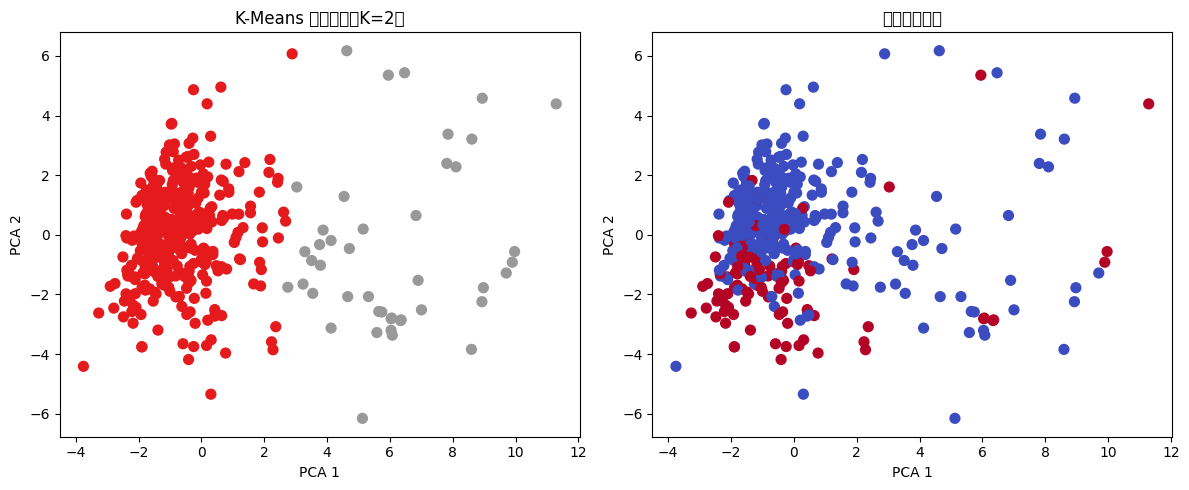

In [139]:
clusters, pca_result, result_df = visualize_kmeans_with_pca(train_df_fs)

In [140]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris

X = train_df_fs.drop(columns=['gender'])
y = train_df_fs['gender']

# LDA降維到2個線性判別組
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

print("降維後的數據形狀:", X_lda.shape)
print(result_df['cluster'].value_counts())

降維後的數據形狀: (423, 1)
cluster
0    379
1     44
Name: count, dtype: int64


In [141]:
test_df_fs

gender  phone_os  height     weight  sleepiness          iq   fb_friends  \
0       NaN         0   200.0  100.00000           1   87.000000    87.000000   
1       NaN         0   175.0   80.00000           3  155.145153  2000.000000   
2       NaN         0   155.0   45.00000           3  150.000000  1589.784091   
3       NaN         0   173.0   85.00000           4  123.475571  1394.482890   
4       NaN         1   164.0   57.00000           4  130.000000   505.000000   
..      ...       ...     ...        ...         ...         ...          ...   
421     NaN         0   160.0   70.00000           4  137.246138   500.000000   
422     NaN         1   162.0   54.00000           3  180.000000   462.000000   
423     NaN         0   173.0   66.00000           2  135.000000   102.000000   
424     NaN         0   165.0   53.00000           3  110.000000   507.000000   
425     NaN         0   182.0   79.54411           4  100.000000    50.000000   

             yt   id  height + weight  yt / weight  height_x  fb_friends / iq  \
0     87.000000    1        300.00000     0.870000     200.0         1.000000   
1    273.531115    2        255.00000     3.419139     175.0        12.891154   
2      9.000000    3        200.00000     0.200000     155.0        10.598561   
3     15.000000    4        258.00000     0.176471     173.0        11.293593   
4      2.000000    5        221.00000     0.035088     164.0         3.884615   
..          ...  ...              ...          ...       ...              ...   
421    5.000000  422        230.00000     0.071429     160.0         3.643090   
422    5.000000  423        216.00000     0.092593     162.0         2.566667   
423   11.100000  424        239.00000     0.168182     173.0         0.755556   
424  416.000000  425        218.00000     7.849057     165.0         4.609091   
425    1.000000  426        261.54411     0.012572     182.0         0.500000   

     height / weight  fb_friends + height  height + yt  fb_friends / height  \
0           2.000000           287.000000   287.000000             0.435000   
1           2.187500          2175.000000   448.531115            11.428571   
2           3.444444          1744.784091   164.000000            10.256672   
3           2.035294          1567.482890   188.000000             8.060595   
4           2.877193           669.000000   166.000000             3.079268   
..               ...                  ...          ...                  ...   
421         2.285714           660.000000   165.000000             3.125000   
422         3.000000           624.000000   167.000000             2.851852   
423         2.621212           275.000000   184.100000             0.589595   
424         3.113208           672.000000   581.000000             3.072727   
425         2.288039           232.000000   183.000000             0.274725   

     fb_friends * iq  height + iq  
0        7569.000000   287.000000  
1      310290.305659   330.145153  
2      238467.613584   305.000000  
3      172184.571202   296.475571  
4       65650.000000   294.000000  
..               ...          ...  
421     68623.068821   297.246138  
422     83160.000000   342.000000  
423     13770.000000   308.000000  
424     55770.000000   275.000000  
425      5000.000000   282.000000  

[426 rows x 19 columns]

In [142]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def kmeans_all_features_plot(df, n_clusters=2):
    """
    對傳入資料集的所有數值特徵欄位進行 KMeans 分群並用 PCA 視覺化。
    """
    df = df.drop(columns=['gender'])
    # 1. 只取數值欄位（避免有非數值特徵造成錯誤）
    X = df.select_dtypes(include=['float64', 'int64']).dropna()

    # 2. 標準化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 3. 執行 KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # 4. PCA 降維（轉換成 2 維供視覺化）
    X_pca = PCA(n_components=2).fit_transform(X_scaled)


    # 5. 畫圖
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', s=60)
    plt.title(f"K-Means 分群結果（使用所有特徵, K={n_clusters}）")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()

    result_df = X.copy()
    result_df['cluster'] = clusters
    result_df['pca1'] = X_pca[:, 0]
    result_df['pca2'] = X_pca[:, 1]

    return clusters, result_df


In [143]:
test_df_fs

gender  phone_os  height     weight  sleepiness          iq   fb_friends  \
0       NaN         0   200.0  100.00000           1   87.000000    87.000000   
1       NaN         0   175.0   80.00000           3  155.145153  2000.000000   
2       NaN         0   155.0   45.00000           3  150.000000  1589.784091   
3       NaN         0   173.0   85.00000           4  123.475571  1394.482890   
4       NaN         1   164.0   57.00000           4  130.000000   505.000000   
..      ...       ...     ...        ...         ...         ...          ...   
421     NaN         0   160.0   70.00000           4  137.246138   500.000000   
422     NaN         1   162.0   54.00000           3  180.000000   462.000000   
423     NaN         0   173.0   66.00000           2  135.000000   102.000000   
424     NaN         0   165.0   53.00000           3  110.000000   507.000000   
425     NaN         0   182.0   79.54411           4  100.000000    50.000000   

             yt   id  height + weight  yt / weight  height_x  fb_friends / iq  \
0     87.000000    1        300.00000     0.870000     200.0         1.000000   
1    273.531115    2        255.00000     3.419139     175.0        12.891154   
2      9.000000    3        200.00000     0.200000     155.0        10.598561   
3     15.000000    4        258.00000     0.176471     173.0        11.293593   
4      2.000000    5        221.00000     0.035088     164.0         3.884615   
..          ...  ...              ...          ...       ...              ...   
421    5.000000  422        230.00000     0.071429     160.0         3.643090   
422    5.000000  423        216.00000     0.092593     162.0         2.566667   
423   11.100000  424        239.00000     0.168182     173.0         0.755556   
424  416.000000  425        218.00000     7.849057     165.0         4.609091   
425    1.000000  426        261.54411     0.012572     182.0         0.500000   

     height / weight  fb_friends + height  height + yt  fb_friends / height  \
0           2.000000           287.000000   287.000000             0.435000   
1           2.187500          2175.000000   448.531115            11.428571   
2           3.444444          1744.784091   164.000000            10.256672   
3           2.035294          1567.482890   188.000000             8.060595   
4           2.877193           669.000000   166.000000             3.079268   
..               ...                  ...          ...                  ...   
421         2.285714           660.000000   165.000000             3.125000   
422         3.000000           624.000000   167.000000             2.851852   
423         2.621212           275.000000   184.100000             0.589595   
424         3.113208           672.000000   581.000000             3.072727   
425         2.288039           232.000000   183.000000             0.274725   

     fb_friends * iq  height + iq  
0        7569.000000   287.000000  
1      310290.305659   330.145153  
2      238467.613584   305.000000  
3      172184.571202   296.475571  
4       65650.000000   294.000000  
..               ...          ...  
421     68623.068821   297.246138  
422     83160.000000   342.000000  
423     13770.000000   308.000000  
424     55770.000000   275.000000  
425      5000.000000   282.000000  

[426 rows x 19 columns]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas

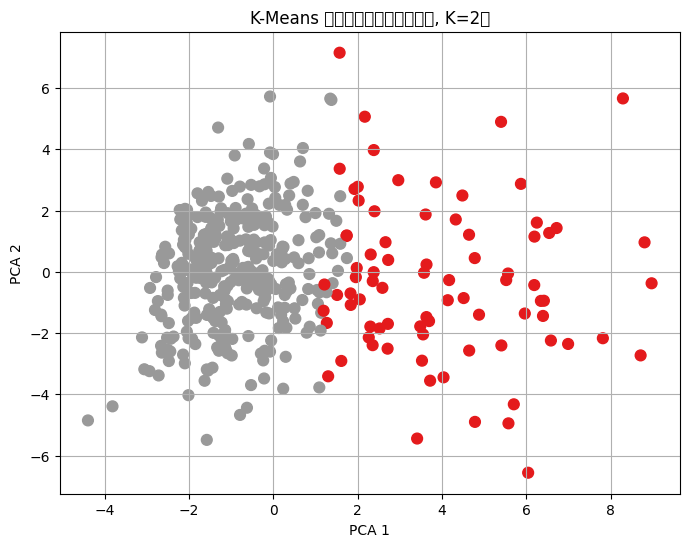

cluster
1    346
0     80
Name: count, dtype: int64


In [144]:
clusters, result_df = kmeans_all_features_plot(test_df_fs, n_clusters=2)
print(result_df['cluster'].value_counts())

In [145]:
test_df

phone_os  height     weight  sleepiness          iq   fb_friends  \
0           0   200.0  100.00000           1   87.000000    87.000000   
1           0   175.0   80.00000           3  155.145153  2000.000000   
2           0   155.0   45.00000           3  150.000000  1589.784091   
3           0   173.0   85.00000           4  123.475571  1394.482890   
4           1   164.0   57.00000           4  130.000000   505.000000   
..        ...     ...        ...         ...         ...          ...   
421         0   160.0   70.00000           4  137.246138   500.000000   
422         1   162.0   54.00000           3  180.000000   462.000000   
423         0   173.0   66.00000           2  135.000000   102.000000   
424         0   165.0   53.00000           3  110.000000   507.000000   
425         0   182.0   79.54411           4  100.000000    50.000000   

             yt  is_outlier_fb_friends  is_outlier_yt  is_outlier_height  ...  \
0     87.000000                      0              1                  1  ...   
1    273.531115                      1              1                  0  ...   
2      9.000000                      1              0                  0  ...   
3     15.000000                      1              0                  0  ...   
4      2.000000                      0              0                  0  ...   
..          ...                    ...            ...                ...  ...   
421    5.000000                      0              0                  0  ...   
422    5.000000                      0              0                  0  ...   
423   11.100000                      0              0                  0  ...   
424  416.000000                      0              1                  0  ...   
425    1.000000                      0              0                  0  ...   

     height + weight  yt / weight  height_x  fb_friends / iq  height / weight  \
0          300.00000     0.870000     200.0         1.000000         2.000000   
1          255.00000     3.419139     175.0        12.891154         2.187500   
2          200.00000     0.200000     155.0        10.598561         3.444444   
3          258.00000     0.176471     173.0        11.293593         2.035294   
4          221.00000     0.035088     164.0         3.884615         2.877193   
..               ...          ...       ...              ...              ...   
421        230.00000     0.071429     160.0         3.643090         2.285714   
422        216.00000     0.092593     162.0         2.566667         3.000000   
423        239.00000     0.168182     173.0         0.755556         2.621212   
424        218.00000     7.849057     165.0         4.609091         3.113208   
425        261.54411     0.012572     182.0         0.500000         2.288039   

     fb_friends + height  height + yt  fb_friends / height  fb_friends * iq  \
0             287.000000   287.000000             0.435000      7569.000000   
1            2175.000000   448.531115            11.428571    310290.305659   
2            1744.784091   164.000000            10.256672    238467.613584   
3            1567.482890   188.000000             8.060595    172184.571202   
4             669.000000   166.000000             3.079268     65650.000000   
..                   ...          ...                  ...              ...   
421           660.000000   165.000000             3.125000     68623.068821   
422           624.000000   167.000000             2.851852     83160.000000   
423           275.000000   184.100000             0.589595     13770.000000   
424           672.000000   581.000000             3.072727     55770.000000   
425           232.000000   183.000000             0.274725      5000.000000   

     height + iq  
0     287.000000  
1     330.145153  
2     305.000000  
3     296.475571  
4     294.000000  
..           ...  
421   297.246138  
422   342.000000  
423   308.000000  
424   275.000000  
425   282.000000  

[426

In [146]:
train_df.drop(columns=['yt', 'fb_friends'], inplace=True)
test_df.drop(columns=['yt', 'fb_friends'], inplace=True)

#train_df_fs.drop(columns=['yt', 'fb_friends', 'sleepiness', 'iq', 'phone_os'], inplace=True)
#test_df_fs.drop(columns=['yt', 'fb_friends', 'sleepiness', 'iq', 'phone_os'], inplace=True)

In [147]:
test_df

phone_os  height     weight  sleepiness          iq  \
0           0   200.0  100.00000           1   87.000000   
1           0   175.0   80.00000           3  155.145153   
2           0   155.0   45.00000           3  150.000000   
3           0   173.0   85.00000           4  123.475571   
4           1   164.0   57.00000           4  130.000000   
..        ...     ...        ...         ...         ...   
421         0   160.0   70.00000           4  137.246138   
422         1   162.0   54.00000           3  180.000000   
423         0   173.0   66.00000           2  135.000000   
424         0   165.0   53.00000           3  110.000000   
425         0   182.0   79.54411           4  100.000000   

     is_outlier_fb_friends  is_outlier_yt  is_outlier_height  \
0                        0              1                  1   
1                        1              1                  0   
2                        1              0                  0   
3                        1              0                  0   
4                        0              0                  0   
..                     ...            ...                ...   
421                      0              0                  0   
422                      0              0                  0   
423                      0              0                  0   
424                      0              1                  0   
425                      0              0                  0   

     is_outlier_weight  is_outlier_iq  ...  height + weight  yt / weight  \
0                    1              0  ...        300.00000     0.870000   
1                    0              1  ...        255.00000     3.419139   
2                    0              0  ...        200.00000     0.200000   
3                    0              1  ...        258.00000     0.176471   
4                    0              0  ...        221.00000     0.035088   
..                 ...            ...  ...              ...          ...   
421                  0              1  ...        230.00000     0.071429   
422                  0              0  ...        216.00000     0.092593   
423                  0              0  ...        239.00000     0.168182   
424                  0              0  ...        218.00000     7.849057   
425                  1              0  ...        261.54411     0.012572   

     height_x  fb_friends / iq  height / weight  fb_friends + height  \
0       200.0         1.000000         2.000000           287.000000   
1       175.0        12.891154         2.187500          2175.000000   
2       155.0        10.598561         3.444444          1744.784091   
3       173.0        11.293593         2.035294          1567.482890   
4       164.0         3.884615         2.877193           669.000000   
..        ...              ...              ...                  ...   
421     160.0         3.643090         2.285714           660.000000   
422     162.0         2.566667         3.000000           624.000000   
423     173.0         0.755556         2.621212           275.000000   
424     165.0         4.609091         3.113208           672.000000   
425     182.0         0.500000         2.288039           232.000000   

     height + yt  fb_friends / height  fb_friends * iq  height + iq  
0     287.000000             0.435000      7569.000000   287.000000  
1     448.531115            11.428571    310290.305659   330.145153  
2     164.000000            10.256672    238467.613584   305.000000  
3     188.000000             8.060595    172184.571202   296.475571  
4     166.000000             3.079268     65650.000000   294.000000  
..           ...                  ...              ...          ...  
421   165.000000             3.125000     68623.068821   297.246138  
422   167.000000             2.851852     83160.000000   342.000000  
423   184.100000             0.589595     13770.000000   308.000000  
424   581.000000             3.072727

#  **5. 特徵選取(上)**

## 5.1 特徵選擇

### 5.1.1 使用 RF 評估特徵

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

selected_cols = ['gender', 'phone_os', 'height', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']
train_df_fs = train_df[selected_cols]
test_df_fs = test_df[selected_cols]

print(f"資料集筆數: {train_df_fs.shape[0]}, 特徵數量: {train_df_fs.shape[1]-1}")

In [ ]:
def remove_rows_with_extreme_values(X, threshold=1e10):
    X = X.copy()
    mask = (X > threshold) | (X < -threshold)
    rows_with_extreme = mask.any(axis=1)
    num_to_drop = rows_with_extreme.sum()
    print(f"將刪除 {num_to_drop} 筆含有極端值的資料列。")
    return X[~rows_with_extreme]

train_df_fs = remove_rows_with_extreme_values(train_df_fs)

In [ ]:
# 將特徵與目標分開
X = train_df_fs.drop('gender', axis=1)   # 特徵矩陣
y = train_df_fs['gender']         # 目標變數

# 將資料集切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"訓練資料筆數: {X_train.shape[0]}, 測試資料筆數: {X_test.shape[0]}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def evaluate_top_n_features(X_train, X_test, y_train, y_test, max_features=5):
    results = []

    # 訓練 baseline 模型並計算全特徵的重要性
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    importances = rf_model.feature_importances_
    feature_names = X_train.columns.tolist()
    feat_imp_pairs = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

    print("所有特徵的重要性排序：")
    for name, imp in feat_imp_pairs:
        print(f"{name}: {imp:.4f}")

    # 針對最重要特徵分別訓練模型
    for n in range(1, max_features + 1):
        selected_features = [f for f, imp in feat_imp_pairs[:n]]
        X_train_sel = X_train[selected_features]
        X_test_sel = X_test[selected_features]

        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train_sel, y_train)
        y_pred = model.predict(X_test_sel)
        acc = accuracy_score(y_test, y_pred)

        results.append({
            "num_features": n,
            "features": selected_features,
            "accuracy": acc
        })

    return results


In [ ]:
results = evaluate_top_n_features(X_train, X_test, y_train, y_test, max_features=5)

print("\n各特徵數的準確率比較：")
for r in results:
    print(f"{r['num_features']} 個特徵 → Accuracy: {r['accuracy']:.3f}, 特徵: {r['features']}")


### 5.1.2 使用包裝法進行特徵選取

## 5.2 特徵萃取

### 5.2.1 數值型欄位萃取

In [ ]:
pip install featuretools

In [ ]:
import featuretools as ft
from xgboost import XGBClassifier

In [ ]:
def generate_feature_matrix(df, drop_cols, feature_defs=None, is_train=True):
  df_ft = df.drop(columns=drop_cols)

  # 建立 EntitySet
  es = ft.EntitySet(id='data_set')
  es.add_dataframe(dataframe_name='users', dataframe=df_ft, index='id')

  if is_train:
      # 訓練資料，使用 dfs 產生特徵與定義
      feature_matrix, feature_defs_out = ft.dfs(
          entityset=es,
          target_dataframe_name='users',
          trans_primitives=[
              'add_numeric',
              'subtract_numeric',
              'multiply_numeric',
              'divide_numeric',
              'percentile',
          ],
          max_depth=1
      )
  else:
      # 測試資料，使用訓練階段的特徵定義
      feature_matrix = ft.calculate_feature_matrix(
          entityset=es,
          features=feature_defs
      )
      feature_defs_out = None  # 測試階段不需要產出新的定義

  # 合併回原始資料
  df_combined = pd.merge(df, feature_matrix, on='id', how='left')

  return df_combined, feature_defs_out

In [ ]:
exclude_cols = ['phone_os','gender','sleepiness']

train_df_fs['id'] = id_train_backup
test_df_fs['id'] = id_test_backup

# 做特徵工程
train_df_combined, feature_defs = generate_feature_matrix(train_df_fs, drop_cols=exclude_cols, is_train=True)
test_df_combined, _ = generate_feature_matrix(test_df_fs, drop_cols=exclude_cols, feature_defs=feature_defs, is_train=False)
train_df_combined

In [ ]:
def clean_features(df, numeric_only=True):
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.fillna(df.median(numeric_only=numeric_only))
    df = df.clip(lower=-1e6, upper=1e6)
    return df

# 訓練集
X_train = train_df_combined.drop(columns=['id','gender'])
X_train = clean_features(X_train)

# 測試集
X_test = test_df_combined.drop(columns=['id','gender'])  # 假設測試集也有 'id' 和 'gender'
X_test = clean_features(X_test)
y = train_df_fs['gender'].map({1: 0, 2: 1})
# 建立並訓練模型
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y)

# 特徵重要性
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("Top 10 重要特徵：")
print(feature_importances.head(10))

In [ ]:
top_10_features = feature_importances.head(10).index.tolist()

# 將 top_10 特徵從 feature_matrix 擷取出來（包含 id 方便 merge）
train_top_features = pd.concat([train_df_combined['id'], X_train[top_10_features]], axis=1)
test_top_features = pd.concat([test_df_combined['id'], X_test[top_10_features]], axis=1)

In [ ]:
train_df['id'] = id_train_backup
test_df['id'] = id_test_backup

# 加回到原始 train/test 資料表中
train_df = pd.merge(train_df, train_top_features, on='id', how='left')
test_df = pd.merge(test_df, test_top_features, on='id', how='left')

train_df_fs = pd.merge(train_df_fs, train_top_features, on='id', how='left')
test_df_fs = pd.merge(test_df_fs, test_top_features, on='id', how='left')

train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)

In [ ]:
train_df_fs

### 5.2.2 類別型欄位萃取

## 5.3 K-Mean 分群

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def visualize_kmeans_with_pca(df, target_col='gender', n_clusters=2):
    """
    對指定資料集進行 K-Means 分群與 PCA 視覺化。
    - 不會修改原始 df。
    - 傳入的 df 應包含 target_col（如 'gender'）。

    參數：
    - df: 原始資料集（Pandas DataFrame）
    - target_col: 目標變數欄位名稱（如 'gender'）
    - n_clusters: 要分幾群（預設 2）
    """

    # 1. 複製資料集，避免改到原始 df
    df_copy = df.copy()

    # 2. 分離特徵與目標欄位
    X = df_copy.drop(columns=[target_col])
    y = df_copy[target_col]

    # 3. 標準化特徵
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 4. 建立 KMeans 模型並進行分群
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # 5. 降維：用 PCA 將資料壓到 2 維
    X_pca = PCA(n_components=2).fit_transform(X_scaled)

    # 6. 畫圖：KMeans 分群結果
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', s=50)
    plt.title(f"K-Means 分群結果（K={n_clusters}）")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")

    # 7. 畫圖：真實性別結果
    plt.subplot(1, 2, 2)
    gender_numeric = y.astype('category').cat.codes
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gender_numeric, cmap='coolwarm', s=50)
    plt.title("實際性別分布")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")

    plt.tight_layout()
    plt.show()

    result_df = X.copy()
    result_df['cluster'] = clusters
    result_df['pca1'] = X_pca[:, 0]
    result_df['pca2'] = X_pca[:, 1]

    # 8. 回傳分群結果與 PCA 結果（如要進一步分析）
    return clusters, X_pca, result_df


In [ ]:
clusters, pca_result, result_df = visualize_kmeans_with_pca(train_df_fs)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris

X = train_df_fs.drop(columns=['gender'])
y = train_df_fs['gender']

# LDA降維到2個線性判別組
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

print("降維後的數據形狀:", X_lda.shape)
print(result_df['cluster'].value_counts())

In [ ]:
test_df_fs

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def kmeans_all_features_plot(df, n_clusters=2):
    """
    對傳入資料集的所有數值特徵欄位進行 KMeans 分群並用 PCA 視覺化。
    """
    df = df.drop(columns=['gender'])
    # 1. 只取數值欄位（避免有非數值特徵造成錯誤）
    X = df.select_dtypes(include=['float64', 'int64']).dropna()

    # 2. 標準化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 3. 執行 KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # 4. PCA 降維（轉換成 2 維供視覺化）
    X_pca = PCA(n_components=2).fit_transform(X_scaled)


    # 5. 畫圖
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', s=60)
    plt.title(f"K-Means 分群結果（使用所有特徵, K={n_clusters}）")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()

    result_df = X.copy()
    result_df['cluster'] = clusters
    result_df['pca1'] = X_pca[:, 0]
    result_df['pca2'] = X_pca[:, 1]

    return clusters, result_df


In [ ]:
test_df_fs

In [ ]:
clusters, result_df = kmeans_all_features_plot(test_df_fs, n_clusters=2)
print(result_df['cluster'].value_counts())

In [ ]:
train_df.drop(columns=['yt', 'fb_friends', 'sleepiness', 'iq', 'phone_os'], inplace=True)
test_df.drop(columns=['yt', 'fb_friends', 'sleepiness', 'iq', 'phone_os'], inplace=True)

train_df_fs.drop(columns=['yt', 'fb_friends', 'sleepiness', 'iq', 'phone_os'], inplace=True)
test_df_fs.drop(columns=['yt', 'fb_friends', 'sleepiness', 'iq', 'phone_os'], inplace=True)

In [ ]:
test_df

#  **5. 特徵選取(舊)**

In [ ]:
pip install featuretools

In [ ]:
import featuretools as ft
from xgboost import XGBClassifier

train_df['id'] = id_train_backup
test_df['id'] = id_test_backup
def generate_feature_matrix(df, drop_cols, feature_defs=None, is_train=True):
  df_ft = df.drop(columns=drop_cols)

  # 建立 EntitySet
  es = ft.EntitySet(id='data_set')
  es.add_dataframe(dataframe_name='users', dataframe=df_ft, index='id')

  if is_train:
      # 訓練資料，使用 dfs 產生特徵與定義
      feature_matrix, feature_defs_out = ft.dfs(
          entityset=es,
          target_dataframe_name='users',
          trans_primitives=[
              'add_numeric',
              'subtract_numeric',
              'multiply_numeric',
              'divide_numeric',
              'percentile',
              'absolute',
              'negate'
          ],
          max_depth=1
      )
  else:
      # 測試資料，使用訓練階段的特徵定義
      feature_matrix = ft.calculate_feature_matrix(
          entityset=es,
          features=feature_defs
      )
      feature_defs_out = None  # 測試階段不需要產出新的定義

  # 合併回原始資料
  df_combined = pd.merge(df, feature_matrix, on='id', how='left')

  return df_combined, feature_defs_out

In [ ]:
exclude_cols = ['gender', 'phone_os']

# 做特徵工程
train_df_combined, feature_defs = generate_feature_matrix(train_df, drop_cols=exclude_cols, is_train=True)
test_df_combined, _ = generate_feature_matrix(test_df, drop_cols=exclude_cols, feature_defs=feature_defs, is_train=False)
train_df_combined

In [ ]:
# 目標欄位
target_col = 'gender'

# 特徵與標籤
X = train_df_combined.drop(columns=['id', 'gender'])
y = train_df_combined['gender'].map({1: 0, 2: 1})  # 不動原始欄位

# ✅ 清理 inf / NaN
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median(numeric_only=True))
X = X.clip(lower=-1e6, upper=1e6)  # 可選：限制極端值

# 建立模型
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X, y)


# 特徵重要性對應每個欄位
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# 排序（由高到低）
feature_importances = feature_importances.sort_values(ascending=False)

# 顯示前 20 名最重要的特徵
print("Top 10 重要特徵：")
print(feature_importances.head(10))

In [ ]:
import matplotlib.pyplot as plt

feature_importances.head(10).plot(kind='barh', figsize=(10, 8))
plt.title("XGBoost 特徵重要性（前 10 名）")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.show()


In [ ]:
top_10_features = feature_importances.head(10).index.tolist()

# 將 top_10 特徵從 feature_matrix 擷取出來（包含 id 方便 merge）
train_top_features = train_df_combined[['id'] + top_10_features]
test_top_features = test_df_combined[['id'] + top_10_features]

# 加回到原始 train/test 資料表中
train_df = pd.merge(train_df, train_top_features, on='id', how='left')
test_df = pd.merge(test_df, test_top_features, on='id', how='left')
train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)

# **6.資料不平衡處理**


In [148]:
print(train_df['gender'].value_counts(normalize=True))

gender
1    0.747045
2    0.252955
Name: proportion, dtype: float64


In [149]:
pip install imbalanced-learn

# 6.1 SMOTE

In [150]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# 定義 SMOTE 處理函數
def apply_smote(X, y, random_state=42):
    # 處理無窮大和 NaN
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.median(numeric_only=True))
    # 標籤轉為 0 和 1
    y_encoded = y - 1 # gender: 1/2 → 0/1
    # SMOTE 重抽樣
    smote = SMOTE(random_state=random_state)
    X_smote, y_smote = smote.fit_resample(X, y_encoded)
    print("SMOTE 後分佈：", Counter(y_smote))
    return X_smote, y_smote


# 特徵與標籤切分
X = train_df.drop(columns=['gender']).astype(float)
y = train_df['gender']
X_smote, y_smote = apply_smote(X, y, random_state=42)

SMOTE 後分佈： Counter({1: 316, 0: 316})


# 6.1SMOTENN

In [ ]:
from imblearn.combine import SMOTEENN
from collections import Counter

X = train_df.drop(columns=['gender']).astype(float)
y = train_df['gender']

# 初始化 SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# 重取樣
X_smote, y_smote = smote_enn.fit_resample(X, y)

# 查看前後類別分佈
print("原始分佈：", Counter(y))
print("SMOTEENN 後：", Counter(y_resampled))

# **7. 預測分類模型**


In [151]:
# 定義數據清理函數
def clean_data(X, reference_df=None):
    """
    清理數據中的無窮大和 NaN 值。

    參數:
    - X: 要清理的數據
    - reference_df: 用於填充 NaN 的參考數據（可選）
    """
    X_clean = X.copy()
    for col in X_clean.columns:
        X_clean[col] = pd.to_numeric(X_clean[col], errors='coerce')  # 轉為數值，無效值變 NaN
        # 如果有參考數據，使用其中位數填充；否則用自身中位數
        fill_value = reference_df[col].median() if reference_df is not None else X_clean[col].median()
        X_clean[col] = X_clean[col].replace([np.inf, -np.inf], np.nan).fillna(fill_value)
        X_clean[col] = X_clean[col].clip(lower=-1e38, upper=1e38)  # 限制值範圍
    return X_clean

<h2> 7.1 XGBOOST

(討論)ValueError: Invalid classes inferred from unique values of y.  Expected: [0 1], got [1 2]

In [152]:
from xgboost import XGBClassifier
#  建立模型
xg_clf = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
#    scale_pos_weight=2.04,  # 調整少數類權重
    eval_metric='logloss',
    random_state=42
)


In [153]:
print("Train 欄位缺失情況：")
print(train_df.isna().sum())

print("\nTest 欄位缺失情況：")
print(test_df.isna().sum())

Train 欄位缺失情況：
phone_os               0
height                 0
weight                 0
sleepiness             0
iq                     0
                      ..
fb_friends + height    0
height + yt            0
fb_friends / height    0
fb_friends * iq        0
height + iq            0
Length: 121, dtype: int64

Test 欄位缺失情況：
phone_os               0
height                 0
weight                 0
sleepiness             0
iq                     0
                      ..
fb_friends + height    0
height + yt            0
fb_friends / height    0
fb_friends * iq        0
height + iq            0
Length: 121, dtype: int64


<h2>7.2 Random forest

In [154]:
from sklearn.ensemble import RandomForestClassifier

# 建立模型
rf_clf = RandomForestClassifier(
    n_estimators=200,      # 增加樹的數量以提升穩定性，RF 通常受益於更多樹
    max_depth=10,          # 稍微增加深度，RF 不易過擬合，可適當放寬
#    class_weight='balanced',
    min_samples_split=5,   # 控制每個節點分裂的最小樣本數，減少過擬合
    min_samples_leaf=2,    # 葉節點最小樣本數，提升模型泛化能力
    max_features='sqrt',   # 特徵子集選擇，RF 常用 sqrt 提升多樣性
    criterion='gini',      # 使用基尼係數，RF 中常見且計算效率高
    random_state=42,       # 保持隨機種子一致性
    n_jobs=-1              # 使用所有可用 CPU 核心加速訓練
)

# 模型訓練
rf_clf.fit(X_smote, y_smote)


# # 預測：X_test 的準備記得也要和 train_df 的欄位一致
# X_test = test_df.drop(columns=['gender']).astype(float)
# X_test = clean_data(X_test)

# # 預測結果：轉回原本的 1/2 標籤
# y_test_pred = rf_clf.predict(X_test)+1

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [155]:
# test_df['gender'] = y_test_pred

In [156]:
test_df

phone_os  height     weight  sleepiness          iq  \
0           0   200.0  100.00000           1   87.000000   
1           0   175.0   80.00000           3  155.145153   
2           0   155.0   45.00000           3  150.000000   
3           0   173.0   85.00000           4  123.475571   
4           1   164.0   57.00000           4  130.000000   
..        ...     ...        ...         ...         ...   
421         0   160.0   70.00000           4  137.246138   
422         1   162.0   54.00000           3  180.000000   
423         0   173.0   66.00000           2  135.000000   
424         0   165.0   53.00000           3  110.000000   
425         0   182.0   79.54411           4  100.000000   

     is_outlier_fb_friends  is_outlier_yt  is_outlier_height  \
0                        0              1                  1   
1                        1              1                  0   
2                        1              0                  0   
3                        1              0                  0   
4                        0              0                  0   
..                     ...            ...                ...   
421                      0              0                  0   
422                      0              0                  0   
423                      0              0                  0   
424                      0              1                  0   
425                      0              0                  0   

     is_outlier_weight  is_outlier_iq  ...  height + weight  yt / weight  \
0                    1              0  ...        300.00000     0.870000   
1                    0              1  ...        255.00000     3.419139   
2                    0              0  ...        200.00000     0.200000   
3                    0              1  ...        258.00000     0.176471   
4                    0              0  ...        221.00000     0.035088   
..                 ...            ...  ...              ...          ...   
421                  0              1  ...        230.00000     0.071429   
422                  0              0  ...        216.00000     0.092593   
423                  0              0  ...        239.00000     0.168182   
424                  0              0  ...        218.00000     7.849057   
425                  1              0  ...        261.54411     0.012572   

     height_x  fb_friends / iq  height / weight  fb_friends + height  \
0       200.0         1.000000         2.000000           287.000000   
1       175.0        12.891154         2.187500          2175.000000   
2       155.0        10.598561         3.444444          1744.784091   
3       173.0        11.293593         2.035294          1567.482890   
4       164.0         3.884615         2.877193           669.000000   
..        ...              ...              ...                  ...   
421     160.0         3.643090         2.285714           660.000000   
422     162.0         2.566667         3.000000           624.000000   
423     173.0         0.755556         2.621212           275.000000   
424     165.0         4.609091         3.113208           672.000000   
425     182.0         0.500000         2.288039           232.000000   

     height + yt  fb_friends / height  fb_friends * iq  height + iq  
0     287.000000             0.435000      7569.000000   287.000000  
1     448.531115            11.428571    310290.305659   330.145153  
2     164.000000            10.256672    238467.613584   305.000000  
3     188.000000             8.060595    172184.571202   296.475571  
4     166.000000             3.079268     65650.000000   294.000000  
..           ...                  ...              ...          ...  
421   165.000000             3.125000     68623.068821   297.246138  
422   167.000000             2.851852     83160.000000   342.000000  
423   184.100000             0.589595     13770.000000   308.000000  
424   581.000000             3.072727

In [157]:
gender_counts = test_df['gender'].value_counts(dropna=False)
gender_counts

gender
NaN    426
Name: count, dtype: int64

<h2> 7.3 Light GBM

In [158]:
# from lightgbm import LGBMClassifier
# import warnings
# lgb_base = LGBMClassifier(
#     n_estimators=100,      # 比 RF 少一點，避免過擬合
#     max_depth=7,           # 稍淺，控制模型複雜度
#     min_child_samples=5,   # 類似 min_samples_leaf，增強泛化
#     learning_rate=0.1,     # 適中的學習率
#     num_leaves=20,         # 控制每棵樹的葉子數，小數據集不宜過多
#     random_state=42,
#     n_jobs=-1
# )
# with warnings.catch_warnings():
#   warnings.filterwarnings("ignore", category=UserWarning)  # 忽略特定警告
#   lgb_base.fit(X_smote, y_smote)

<h2> 7.4 Stack

In [159]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [
    ('rf', rf_clf),
    ('xgb', xg_clf)
]
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)
# 模型訓練
stack_clf.fit(X_smote, y_smote)

# 預測：X_test 的準備記得也要和 train_df 的欄位一致
X_test = test_df.drop(columns=['gender']).astype(float)
X_test = clean_data(X_test)

# 預測結果：轉回原本的 1/2 標籤
y_test_pred = stack_clf.predict(X_test) + 1

In [160]:
test_df['gender'] = y_test_pred
test_df

phone_os  height     weight  sleepiness          iq  \
0           0   200.0  100.00000           1   87.000000   
1           0   175.0   80.00000           3  155.145153   
2           0   155.0   45.00000           3  150.000000   
3           0   173.0   85.00000           4  123.475571   
4           1   164.0   57.00000           4  130.000000   
..        ...     ...        ...         ...         ...   
421         0   160.0   70.00000           4  137.246138   
422         1   162.0   54.00000           3  180.000000   
423         0   173.0   66.00000           2  135.000000   
424         0   165.0   53.00000           3  110.000000   
425         0   182.0   79.54411           4  100.000000   

     is_outlier_fb_friends  is_outlier_yt  is_outlier_height  \
0                        0              1                  1   
1                        1              1                  0   
2                        1              0                  0   
3                        1              0                  0   
4                        0              0                  0   
..                     ...            ...                ...   
421                      0              0                  0   
422                      0              0                  0   
423                      0              0                  0   
424                      0              1                  0   
425                      0              0                  0   

     is_outlier_weight  is_outlier_iq  ...  height + weight  yt / weight  \
0                    1              0  ...        300.00000     0.870000   
1                    0              1  ...        255.00000     3.419139   
2                    0              0  ...        200.00000     0.200000   
3                    0              1  ...        258.00000     0.176471   
4                    0              0  ...        221.00000     0.035088   
..                 ...            ...  ...              ...          ...   
421                  0              1  ...        230.00000     0.071429   
422                  0              0  ...        216.00000     0.092593   
423                  0              0  ...        239.00000     0.168182   
424                  0              0  ...        218.00000     7.849057   
425                  1              0  ...        261.54411     0.012572   

     height_x  fb_friends / iq  height / weight  fb_friends + height  \
0       200.0         1.000000         2.000000           287.000000   
1       175.0        12.891154         2.187500          2175.000000   
2       155.0        10.598561         3.444444          1744.784091   
3       173.0        11.293593         2.035294          1567.482890   
4       164.0         3.884615         2.877193           669.000000   
..        ...              ...              ...                  ...   
421     160.0         3.643090         2.285714           660.000000   
422     162.0         2.566667         3.000000           624.000000   
423     173.0         0.755556         2.621212           275.000000   
424     165.0         4.609091         3.113208           672.000000   
425     182.0         0.500000         2.288039           232.000000   

     height + yt  fb_friends / height  fb_friends * iq  height + iq  
0     287.000000             0.435000      7569.000000   287.000000  
1     448.531115            11.428571    310290.305659   330.145153  
2     164.000000            10.256672    238467.613584   305.000000  
3     188.000000             8.060595    172184.571202   296.475571  
4     166.000000             3.079268     65650.000000   294.000000  
..           ...                  ...              ...          ...  
421   165.000000             3.125000     68623.068821   297.246138  
422   167.000000             2.851852     83160.000000   342.000000  
423   184.100000             0.589595     13770.000000   308.000000  
424   581.000000             3.072727

In [161]:
gender_counts = test_df['gender'].value_counts(dropna=False)
gender_counts

gender
1    305
2    121
Name: count, dtype: int64

In [167]:
import datetime
today_str = (datetime.datetime.utcnow() + datetime.timedelta(hours=8)).strftime('%m%d')
filename = f'{today_str}_singlecolumngroup.csv'

submit_df = pd.DataFrame({
    "id": range(1, len(test_df)+1),
    "gender": test_df["gender"]
})

# 直接儲存到 Google 雲端硬碟的路徑
submit_df.to_csv(f'drive/My Drive/Colab Notebooks/datasets/{filename}', index=False)

print("檔案已成功儲存到 Google 雲端硬碟！")

檔案已成功儲存到 Google 雲端硬碟！


<h2> 7.5 模型交叉驗證

In [163]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# 定義交叉驗證函數
def run_cross_validation(X, y, model, use_smote=True, cv=5, random_state=42):
    """
    執行交叉驗證並返回多個評估指標。

    參數:
    - X: 特徵數據
    - y: 標籤數據 (假設為 1/2)
    - model: 要評估的模型
    - use_smote: 是否在交叉驗證中使用 SMOTE (True: 用 Pipeline; False: 直接用原始數據)
    - cv: 交叉驗證折數，預設為 5
    - random_state: 隨機種子

    返回:
    - metrics: 包含各指標的字典
    """
    # 清理數據
    X_clean = clean_data(X)
    # 調整標籤為 0/1
    y_adjusted = y - 1

    # 定義 StratifiedKFold
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)

    # 根據 use_smote 選擇是否使用 Pipeline
    if use_smote:
        pipeline = Pipeline([
            ('smote', SMOTE(random_state=random_state)),
            ('classifier', model)
        ])
        estimator = pipeline
    else:
        estimator = model


    # 計算各評估指標
    metrics = {
        'accuracy': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='accuracy'),
        'precision': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='precision'),
        'recall': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='recall'),
        'f1': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='f1'),
        'roc_auc': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='roc_auc')
    }

    # 輸出結果
    print(f"\n{model}\n五折交叉驗證評估指標（use_smote={use_smote}）：")
    for metric, scores in metrics.items():
        print(f"{metric}: 平均 = {np.mean(scores):.4f}, 每折 = {scores}")

    return metrics


In [164]:
# 測試 1: 使用 Pipeline(有對訓練集做smote)
metrics_smote = run_cross_validation(X, y, rf_clf, use_smote=True)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)
五折交叉驗證評估指標（use_smote=True）：
accuracy: 平均 = 0.8604, 每折 = [0.85882353 0.94117647 0.81176471 0.82142857 0.86904762]
precision: 平均 = 0.7324, 每折 = [0.67857143 0.86956522 0.63157895 0.625      0.85714286]
recall: 平均 = 0.7260, 每折 = [0.86363636 0.90909091 0.57142857 0.71428571 0.57142857]
f1: 平均 = 0.7203, 每折 = [0.76       0.88888889 0.6        0.66666667 0.68571429]
roc_auc: 平均 = 0.9086, 每折 = [0.92568543 0.98340548 0.82142857 0.88662132 0.92592593]


In [165]:
metrics_smote = run_cross_validation(X, y, xg_clf, use_smote=True)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
五折交叉驗證評估指標（use_smote=True）：
accuracy: 平均 = 0.8581, 每折 = [0.87058824 0.89411765 0.82352941 0.82142857 0.88095238]
precision: 平均 = 0.7272, 每折 = [0.7037037  0.80952381 0.66666667 0.66666667 0.78947368]
recall: 平均 = 0.6987, 每折 = [0.86363636 0.7727

In [166]:
metrics_smote = run_cross_validation(X, y, stack_clf, use_smote=True)


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=2,
                                                       min_samples_split=5,
                                                       n_estimators=200,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stoppi